# read in microarray data 
rma-processed data readin

In [3]:
#################################################
##load in RData
library(affy)
name<-load(file = "data/NPC0501_batch1_rma.RData")
name

###############################################
##read from RData
#library(affy)
#dir_cels <- "data/batch1/"
#affyData <- ReadAffy(celfile.path = dir_cels)
#CLLrma <- rma(affyData)
##remove .CEL in sample names
#sampleNames(CLLrma) <- gsub(".CEL$", "", sampleNames(CLLrma))
#eset_f <- as.data.frame(exprs(CLLrma))
#head(eset_f)
#save(eset_f,file="data/NPC0501_batch1_rma.RData")

Loading required package: BiocGenerics




Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.




[1] "eset_f"

In [4]:
##match probe ID to gene ID
library(hgu133plus2.db)
ids=toTable(hgu133plus2SYMBOL)
#head(ids)

eset_f$probe_id=rownames(eset_f)
exprSet_symbol=merge(ids,eset_f,by="probe_id",y.all=TRUE)
dim(exprSet_symbol)
exprSet_symbol$probe_id <- NULL
exprSet_symbol <- aggregate(x = exprSet_symbol[,-1],by = list(exprSet_symbol$symbol), FUN = max)
rownames(exprSet_symbol)<-exprSet_symbol[,1]
exprSet_symbol<-as.data.frame(exprSet_symbol[,-1])

dim(exprSet_symbol)
head(exprSet_symbol)
#write.table(exprSet_symbol, file = "output/NPC0501_batch1_rma.txt", append = FALSE, quote = FALSE, sep = "\t",row.names = TRUE,col.names = TRUE)


Loading required package: AnnotationDbi

Loading required package: stats4



Loading required package: IRanges

Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: org.Hs.eg.db







[1] 43101   101

[1] 20824    99

,EXP1140RNA1,EXP1140RNA10,EXP1140RNA101,EXP1140RNA102,EXP1140RNA103,EXP1140RNA104,EXP1140RNA105,EXP1140RNA106,EXP1140RNA107,EXP1140RNA108,⋯,EXP1140RNA9,EXP1140RNA90,EXP1140RNA91,EXP1140RNA92,EXP1140RNA93,EXP1140RNA95,EXP1140RNA96,EXP1140RNA97,EXP1140RNA98,EXP1140RNA99
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,4.410223,5.270692,3.970873,4.323557,4.816397,4.294037,5.383739,3.999219,5.068336,5.511701,⋯,4.736124,4.416311,4.595333,4.527250,4.144704,4.569080,4.329436,4.194533,4.815869,4.370555
A1BG-AS1,7.576798,7.765700,7.344074,7.317455,7.930916,7.689605,8.186891,8.572660,8.031617,8.209435,⋯,7.781769,7.571116,7.648214,7.489067,7.603186,7.790289,7.998436,7.843516,7.846256,7.592424
A1CF,5.636979,6.130557,5.618492,5.651065,6.173462,5.652183,6.032841,5.979892,6.384957,6.400043,⋯,5.875332,5.909883,5.802019,5.694826,5.931726,5.456137,5.783476,5.627240,6.370134,5.649144
A2M,8.470620,8.389077,8.990718,8.056544,8.932853,7.513113,8.073177,8.011677,8.386958,8.163079,⋯,8.552741,9.138055,8.671577,8.989035,8.703944,8.356387,8.488737,8.998453,9.075167,8.349569
A2M-AS1,7.519952,7.210645,8.036036,7.185243,7.586418,6.730888,7.187173,7.433789,7.340197,6.764778,⋯,7.622248,7.829559,7.011402,7.789104,7.468863,7.668342,8.646668,7.333569,7.255105,7.806794
A2ML1,5.175307,5.875909,5.258858,5.447091,5.159425,5.195320,5.410614,5.433633,5.568312,5.323668,⋯,5.490373,5.446732,5.431859,5.037251,5.187109,5.121358,5.072978,5.190928,5.236488,4.993958



T1-2 T3-4 
  19   80 


N0-1 N2-3 
  16   83 


III  IV 
 70  29 

[1] 16  9

,OS_5Y,OST_5Y,PFS_3Y,PFS_T_3Y,T_stage,N_stage,AJCC_UICC_stage_group,SOCS6,SPP1
,<int>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
EXP1140RNA11,0,5.000,0,3.00,T3-4,N0-1,III,6.111002,9.025226
EXP1140RNA12,0,5.000,0,3.00,T3-4,N0-1,III,5.910244,5.052287
EXP1140RNA2,1,4.290,1,2.48,T3-4,N0-1,IV,5.880426,8.795899
EXP1140RNA33,0,5.000,0,3.00,T3-4,N0-1,IV,6.088579,6.500872
EXP1140RNA39,0,5.000,0,3.00,T3-4,N0-1,IV,5.546032,7.248754
EXP1140RNA40,0,5.000,0,3.00,T3-4,N0-1,III,5.171978,6.298605
EXP1140RNA42,0,5.000,0,3.00,T3-4,N0-1,III,5.090137,5.737190
EXP1140RNA45,0,5.000,0,3.00,T3-4,N0-1,III,5.486805,6.206775
EXP1140RNA53,0,5.000,0,3.00,T3-4,N0-1,III,5.076309,6.491791


.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
PFS_3Y,6.11100226980419,5.88042609205946,1,1,1,ns,Wilcoxon
PFS_3Y,6.11100226980419,6.64712119560439,1,1,1,ns,Wilcoxon
PFS_3Y,6.11100226980419,5.39991329507787,1,1,1,ns,Wilcoxon
PFS_3Y,6.11100226980419,5.93749505668508,1,1,1,ns,Wilcoxon
PFS_3Y,6.11100226980419,5.49250854695843,1,1,1,ns,Wilcoxon
PFS_3Y,5.91024350155011,5.88042609205946,1,1,1,ns,Wilcoxon
PFS_3Y,5.91024350155011,6.64712119560439,1,1,1,ns,Wilcoxon
PFS_3Y,5.91024350155011,5.39991329507787,1,1,1,ns,Wilcoxon
PFS_3Y,5.91024350155011,5.93749505668508,1,1,1,ns,Wilcoxon


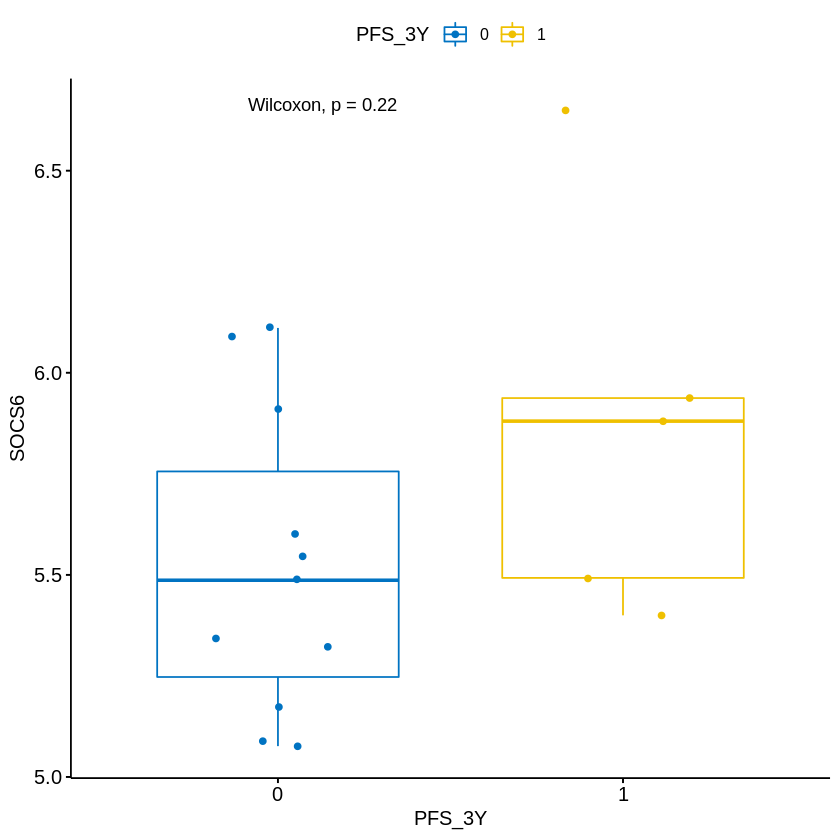

In [22]:
tmp=t(exprSet_symbol)
tmp = tmp[,c("SOCS6","SPP1")]
#head(tmp)
##get survival info
info<-as.data.frame(read.table("data/NPC0501_batch1_99_anno.csv",header = TRUE,sep = ",", dec = ".",na.strings = "NA",stringsAsFactors=FALSE,check.names = FALSE))
rownames(info)=info[,1]
info=info[,-1]
info=info[,c("OS_5Y","OST_5Y","PFS_3Y","PFS_T_3Y","T_stage","N_stage","AJCC_UICC_stage_group")]
#head(info)

gdat_mm=merge(info,tmp,by="row.names")
row.names(gdat_mm)=gdat_mm[,1]
gdat_mm=as.data.frame(gdat_mm[,-1])
#colnames(dat_coxsvl)=c("OS_5Y","OST_5Y","PFS_3Y","PFS_T_3Y","CSratio","group")
#head(gdat_mm)

table(gdat_mm[5])
table(gdat_mm[6])
table(gdat_mm[7])

#gdat_mm$group = gdat_mm$N_stage
#gdat_mm$group=gsub("N2-3","2",gdat_mm$group)
#gdat_mm$group=gsub("N0-1","1",gdat_mm$group)
#gdat_mm$group=as.numeric(gdat_mm$group)
#head(gdat_mm)

gdat_mm = gdat_mm[gdat_mm[, "N_stage"]=="N0-1",]
dim(gdat_mm)
gdat_mm

library(ggplot2)
library(ggpubr)

compare_means(PFS_3Y~SOCS6, gdat_mm, method="wilcox.test", paired=FALSE)
p <- ggboxplot(gdat_mm, x="PFS_3Y",
               y = "SOCS6", color = "PFS_3Y",
               palette = "jco", add = "jitter")
# 添加p值
p + stat_compare_means()

,SPP1,CXCL9
,<dbl>,<dbl>
EXP1140RNA12,5.052287,10.346943
EXP1140RNA8,5.199726,9.107232
EXP1140RNA56,5.260627,10.426023
EXP1140RNA72,5.287439,9.979830
EXP1140RNA34,5.324761,10.498512
EXP1140RNA67,5.345912,10.914245


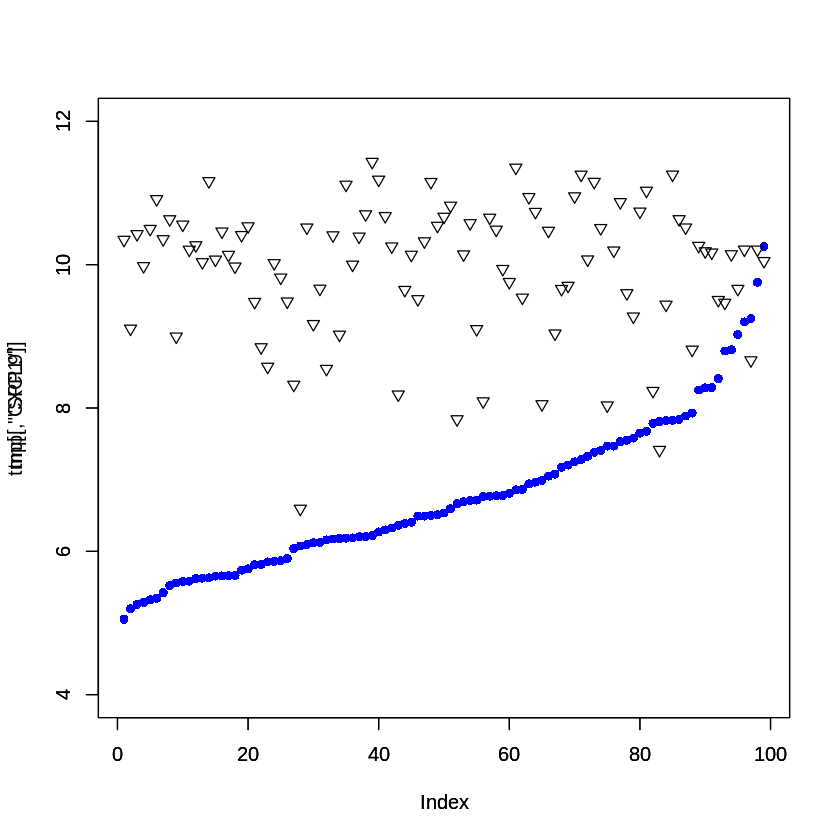

In [173]:
library(ggplot2)
library(ggpubr)

tmp=data[,c("SPP1","CXCL9")]
tmp=tmp[order(tmp[,"SPP1"]),]
head(tmp)

plot(tmp[,"SPP1"],pch=16,col="blue",ylim=c(4,12))
par(new=TRUE)
plot(tmp[,"CXCL9"],pch=6,ylim=c(4,12))

#library(ggplot2)
#ggplot(tmp, aes(CXCL9, SPP1)) + geom_point() + geom_smooth(method = "lm", se = FALSE)

In [20]:
#calculate CS ratio
tmp$CSratio = log(tmp[,"CXCL9"]/tmp[,"SPP1"],2)
cutoff=median(tmp$CSratio)
#cutoff
a=tmp[tmp[, "CSratio"]>cutoff,]
b=tmp[tmp[, "CSratio"]<=cutoff,]
a$group="High risk score"
b$group="Low risk score"
S_score=rbind(a,b)
#head(S_score)

library(survival)
library(ggplot2)
library(ggpubr)
library(magrittr)
#install.packages("survminer")
library(survminer)
library(dplyr)

##get survival info
info<-as.data.frame(read.table("data/NPC0501_batch1_99_anno.csv",header = TRUE,sep = ",", dec = ".",na.strings = "NA",stringsAsFactors=FALSE,check.names = FALSE))
rownames(info)=info[,1]
info=info[,-1]
info=info[,c("OS_5Y","OST_5Y","PFS_3Y","PFS_T_3Y")]
dat_coxsvl=merge(info,S_score[,c("CSratio","group")],by="row.names")
row.names(dat_coxsvl)=dat_coxsvl[,1]
dat_coxsvl=as.data.frame(dat_coxsvl[,-1])
colnames(dat_coxsvl)=c("OS_5Y","OST_5Y","PFS_3Y","PFS_T_3Y","CSratio","group")
#head(dat_coxsvl)
# How many samples of each type?
#table(dat_coxsvl$group)


# Tabulate by outcome
xtabs(~group+PFS_3Y, data=dat_coxsvl) %>% addmargins()
coxph(Surv(PFS_T_3Y, PFS_3Y)~group, data=dat_coxsvl)
sfit <- survfit(Surv(PFS_T_3Y, PFS_3Y)~group, data=dat_coxsvl)
#summary(sfit, times=seq(0,365*5,365))
ggsurvplot(sfit, conf.int=TRUE, pval=TRUE,risk.table = TRUE,legend.labs = c("High CSratio", "Low CSratio"))
#ggsurvplot(sfit, conf.int=TRUE, pval=TRUE,risk.table=True,data=groupedclin)
#summary(sfit)
#pdf("output/CSratio_PFS.pdf")
#ggsurvplot(sfit, conf.int=TRUE, pval=TRUE,risk.table = TRUE,legend.labs = c("High CSratio", "Low CSratio"))
#dev.off()


#OS
xtabs(~group+OS_5Y, data=dat_coxsvl) %>% addmargins()
coxph(Surv(OST_5Y, OS_5Y)~group, data=dat_coxsvl)
sfit <- survfit(Surv(OST_5Y, OS_5Y)~group, data=dat_coxsvl)
#summary(sfit, times=seq(0,365*5,365))
ggsurvplot(sfit, conf.int=TRUE, pval=TRUE,risk.table = TRUE,legend.labs = c("High CSratio", "Low CSratio"))
#sfit$upper
#sfit$surv
#sfit$lower
#summary(sfit)
#pdf("output/CSratio_OS.pdf")
#ggsurvplot(sfit, conf.int=TRUE, pval=TRUE,risk.table = TRUE,legend.labs = c("High CSratio", "Low CSratio"))
#dev.off()

ERROR: Error in eval(expr, envir, enclos): object 'tmp' not found


,SPP1,CXCL9,CSratio,group
,<dbl>,<dbl>,<dbl>,<chr>
10AH-007841,5.800641,13.34816,1.2023566,High CSratio
08AH-005322,5.927422,12.50494,1.0770209,High CSratio
09AH-013058,5.950235,12.80348,1.1055176,High CSratio
07AH-018141,5.973611,11.34965,0.9259728,High CSratio
07AH-009139,6.322469,12.56546,0.9909040,High CSratio
09AH-001505,6.426097,12.54309,0.9648778,High CSratio


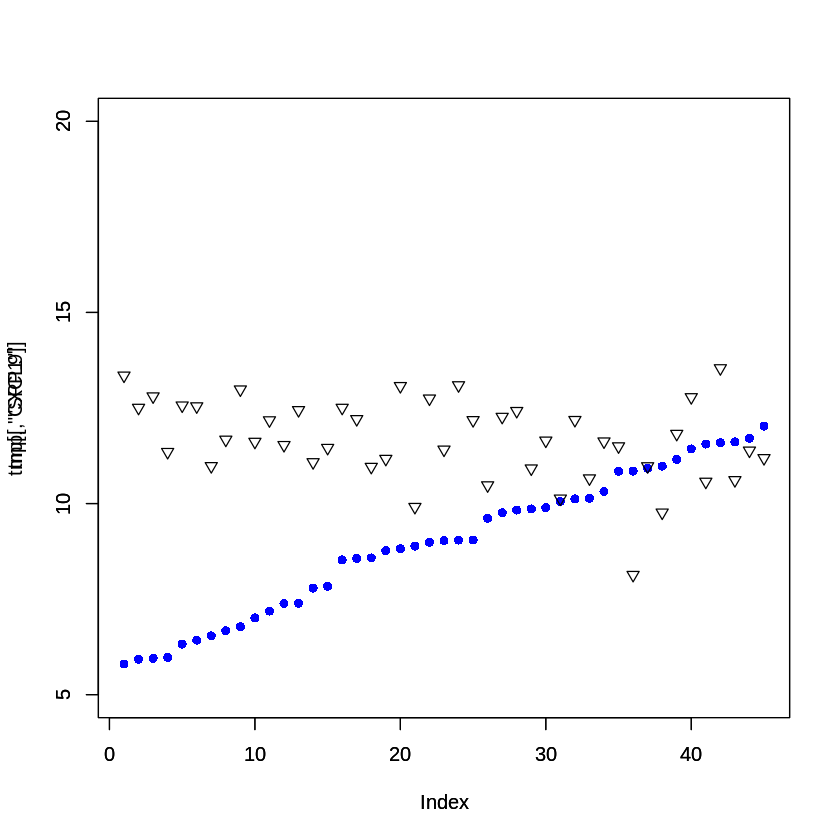

In [167]:
#QEH cohort

dat_nanos<-as.data.frame(read.table("data/nanostring_NormedGeneEXP.csv",header = TRUE,sep = ",",row.names=2,dec = ".",na.strings = "NA",stringsAsFactors=FALSE,check.names = FALSE))
#rownames(info)=info[,1]
dat_nanos=t(dat_nanos[,-1])
#head(dat_nanos)
tmp=dat_nanos[,c("SPP1","CXCL9")]
tmp=as.data.frame(tmp[order(tmp[,"SPP1"]),])
tmp=log(tmp,2)

#calculate CS ratio
tmp$CSratio = log(tmp[,"CXCL9"]/tmp[,"SPP1"],2)
cutoff=median(tmp$CSratio)
#cutoff
a=tmp[tmp[, "CSratio"]>cutoff,]
b=tmp[tmp[, "CSratio"]<=cutoff,]
a$group="High CSratio"
b$group="Low CSratio"
S_score=rbind(a,b)
head(S_score)

plot(tmp[,"SPP1"],pch=16,col="blue",ylim=c(5,20))
par(new=TRUE)
plot(tmp[,"CXCL9"],pch=6,ylim=c(5,20))

In [4]:
library(survival)
library(ggplot2)
library(ggpubr)
library(magrittr)
#install.packages("survminer")
library(survminer)
library(dplyr)

#head(S_score)
info<-as.data.frame(read.table("data/HKU_QEH_Nanostring_anno.csv",header = TRUE,sep = ",", dec = ".",na.strings = "NA",stringsAsFactors=FALSE,check.names = FALSE))
row.names(info)=info[,1]
dat_coxsvl=merge(info,S_score,by="row.names")
dat_coxsvl=as.data.frame(dat_coxsvl[,-1])
colnames(dat_coxsvl)
#head(dat_coxsvl)                   

# How many samples of each type?
#table(dat_coxsvl$group)
                       
                       
# Tabulate by outcome
#head(dat_coxsvl)
xtabs(~group+PFS, data=dat_coxsvl) %>% addmargins()
coxph(Surv(PFS_T, PFS)~group, data=dat_coxsvl)
sfit <- survfit(Surv(PFS_T, PFS)~group, data=dat_coxsvl)
#summary(sfit, times=seq(0,365*5,365))
ggsurvplot(sfit, conf.int=TRUE, pval=TRUE,risk.table = TRUE,legend.labs = c("High risk score", "Low risk score"))


# Tabulate by outcome - OS
xtabs(~group+OS, data=dat_coxsvl) %>% addmargins()
coxph(Surv(OST, OS)~group, data=dat_coxsvl)
sfit <- survfit(Surv(OST, OS)~group, data=dat_coxsvl)
#summary(sfit, times=seq(0,365*5,365))
ggsurvplot(sfit, conf.int=TRUE, pval=TRUE,risk.table = TRUE,legend.labs = c("High risk score", "Low risk score"))


ERROR: Error in merge(info, S_score, by = "row.names"): object 'S_score' not found


Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'survival' was built under R version 3.6.3"


,PFS,PFS_T,SPP1,CXCL9
,<int>,<dbl>,<dbl>,<dbl>
NPC0001PT00437T00437,0,1.8444444,0.502,113.279
NPC0002PT00034T00034,0,1.7722222,0.578,996.132
NPC0001PT00357T00357,0,2.0777778,1.357,140.961
NPC0002PT00039T00039,0,1.0250000,1.433,138.038
NPC0001PT00029T00029,0,3.2750000,2.419,125.648
NPC0002PT00041T00041,1,0.2658333,2.459,318.155


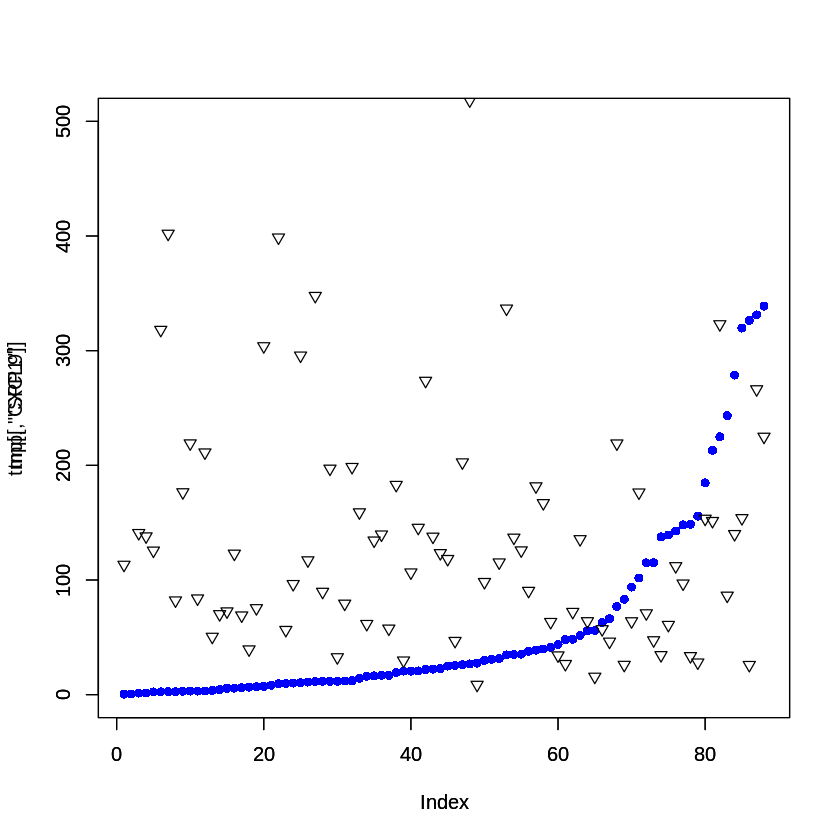

In [1]:
#SYS cohort

library(ggplot2)
library(ggpubr)

info<-as.data.frame(read.table("data/113ClinicalInfo.txt",header = TRUE,sep = "\t", dec = ".",na.strings = "NA",stringsAsFactors=FALSE,check.names = FALSE))
row.names(info)=info[,1]
#head(info)

library(survival)
eset_f=as.data.frame(read.table("data/GSE102349_NPC_mRNA_processed.txt",header = TRUE,sep = "\t", dec = ".",na.strings = "NA",stringsAsFactors=FALSE,check.names = FALSE))
row.names(eset_f)=eset_f[,1]
eset_f=as.data.frame(t(eset_f[,-1]))
#head(eset_f)

selected_gene=c("SPP1","CXCL9") 
tmp=as.data.frame(eset_f[,selected_gene])
tmp=merge(info[,c("PFS","PFS_T")],tmp,by="row.names")
row.names(tmp)=tmp[,1]
tmp=tmp[,-1]
tmp=tmp[order(tmp[,"SPP1"]),]
head(tmp)


plot(tmp[,"SPP1"],pch=16,col="blue",ylim=c(0,500)) #,ylim=c(0,10000)
par(new=TRUE)
plot(tmp[,"CXCL9"],pch=6,ylim=c(0,500))

#library(ggplot2)
#ggplot(tmp, aes(CXCL9, SPP1)) + geom_point() + geom_smooth(method = "lm", se = FALSE)

,PFS,PFS_T,SPP1,CXCL9,CSratio,group
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
NPC0001PT00437T00437,0,1.8444444,0.502,113.279,7.817977,High CSratio
NPC0002PT00034T00034,0,1.7722222,0.578,996.132,10.751052,High CSratio
NPC0001PT00357T00357,0,2.0777778,1.357,140.961,6.698732,High CSratio
NPC0002PT00039T00039,0,1.0250000,1.433,138.038,6.589883,High CSratio
NPC0001PT00029T00029,0,3.2750000,2.419,125.648,5.698833,High CSratio
NPC0002PT00041T00041,1,0.2658333,2.459,318.155,7.015514,High CSratio


,0,1,Sum
High CSratio,39,5,44
Low CSratio,33,11,44
Sum,72,16,88


Call:
coxph(formula = Surv(PFS_T, PFS) ~ group, data = dat_coxsvl)

                   coef exp(coef) se(coef)     z     p
groupLow CSratio 0.8462    2.3308   0.5398 1.568 0.117

Likelihood ratio test=2.66  on 1 df, p=0.1028
n= 88, number of events= 16 

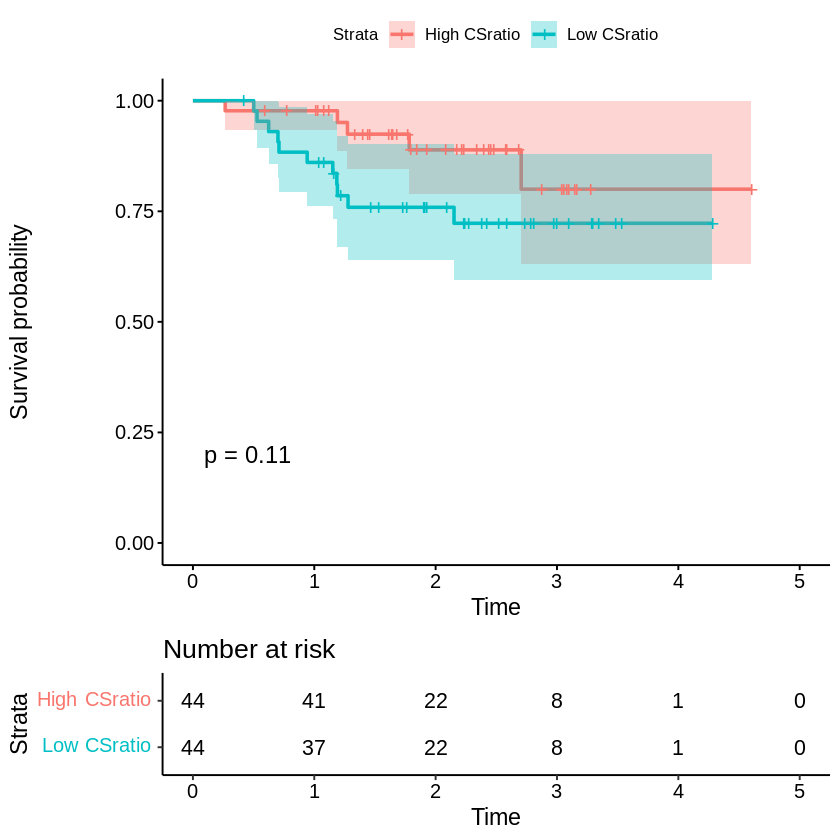

In [130]:
#calculate CS ratio

tmp$CSratio = log(tmp[,"CXCL9"]/tmp[,"SPP1"],2)
cutoff=median(tmp$CSratio)
#cutoff
a=tmp[tmp[, "CSratio"]>cutoff,]
b=tmp[tmp[, "CSratio"]<=cutoff,]
a$group="High CSratio"
b$group="Low CSratio"
S_score=rbind(a,b)
head(S_score)

library(survival)
library(ggplot2)
library(ggpubr)
library(magrittr)
#install.packages("survminer")
library(survminer)
library(dplyr)

dat_coxsvl =S_score
# Tabulate by outcome
xtabs(~group+PFS, data=dat_coxsvl) %>% addmargins()
coxph(Surv(PFS_T, PFS)~group, data=dat_coxsvl)
sfit <- survfit(Surv(PFS_T, PFS)~group, data=dat_coxsvl)
#summary(sfit, times=seq(0,365*5,365))
ggsurvplot(sfit, conf.int=TRUE, pval=TRUE,risk.table = TRUE,legend.labs = c("High CSratio", "Low CSratio"))
#ggsurvplot(sfit, conf.int=TRUE, pval=TRUE,risk.table=True,data=groupedclin)
#summary(sfit)
#pdf("output/CSratio_PFS.pdf")
#ggsurvplot(sfit, conf.int=TRUE, pval=TRUE,risk.table = TRUE,legend.labs = c("High CSratio", "Low CSratio"))
#dev.off()



# model training - COX LASSO Regression

1423 unique immune gene from Immport DB and cancer-intrinsic evasion immune gene(2020)

In [3]:
##get survival info
##use normalized expr_data + batch + Stage + Age + Gender to train model
dat_lasso=t(exprSet_symbol)
#head(dat_lasso)

info<-as.data.frame(read.table("data/NPC0501_batch1_99_anno.csv",header = TRUE,sep = ",", dec = ".",na.strings = "NA",stringsAsFactors=FALSE,check.names = FALSE))
rownames(info)=info[,1]
info=info[,-1]
covariates <- c("PFS_3Y","PFS_T_3Y","Age","Gender","LDH","T_stage","N_stage") #"OS_5Y","OST_5Y"
info=info[,covariates] 
#info[] <- lapply(info, function(x) {
#    if(is.character(x)) as.numeric(as.character(x)) else x
#}) 
#head(info)

dat_lasso=merge(info,dat_lasso,by="row.names")
row.names(dat_lasso)=dat_lasso[,1]
dat_lasso=as.data.frame(dat_lasso[,-1])

head(dat_lasso)
dim(dat_lasso)

,PFS_3Y,PFS_T_3Y,Age,Gender,LDH,T_stage,N_stage,A1BG,A1BG-AS1,A1CF,⋯,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
EXP1140RNA1,1,2.48,39,2,189,3,2,4.410223,7.576798,5.636979,⋯,6.838595,7.625440,6.108254,5.415060,9.644596,6.919691,7.542965,8.566380,7.810199,8.074820
EXP1140RNA10,1,1.20,45,1,190,4,2,5.270692,7.765700,6.130557,⋯,6.481930,7.521469,5.583190,5.896111,8.300645,6.786738,6.805611,8.671106,7.417944,7.793693
EXP1140RNA101,1,2.53,53,1,374,2,2,3.970873,7.344074,5.618492,⋯,7.292593,9.050327,6.613495,5.163700,9.844692,6.194634,7.930204,8.308339,7.738847,8.816535
EXP1140RNA102,0,3.00,48,1,154,3,2,4.323557,7.317455,5.651065,⋯,6.948015,8.127125,5.975200,5.190544,9.679340,5.872522,7.612289,8.267690,7.320500,8.269691
EXP1140RNA103,0,3.00,55,1,296,2,3,4.816397,7.930916,6.173462,⋯,7.080961,7.748025,4.958300,5.360398,9.582905,5.658081,7.476662,8.479969,7.762805,8.173865
EXP1140RNA104,0,3.00,63,1,226,4,2,4.294037,7.689605,5.652183,⋯,7.949719,8.900974,5.279574,5.289896,9.736541,6.754622,7.623210,7.878382,7.307802,8.449783


[1]    99 20181

train model 100 times and only keep features with frequency > 0.8

[1] 1121

,d,Freq
,<fct>,<int>
3,DBH-AS1,97
4,IL18BP,96
18,SPP1,92
13,PALMD,82
15,PPP1R26-AS1,82
22,WDR35,82
17,SOCS6,80
14,PLA2G2D,68
20,STEAP2,68


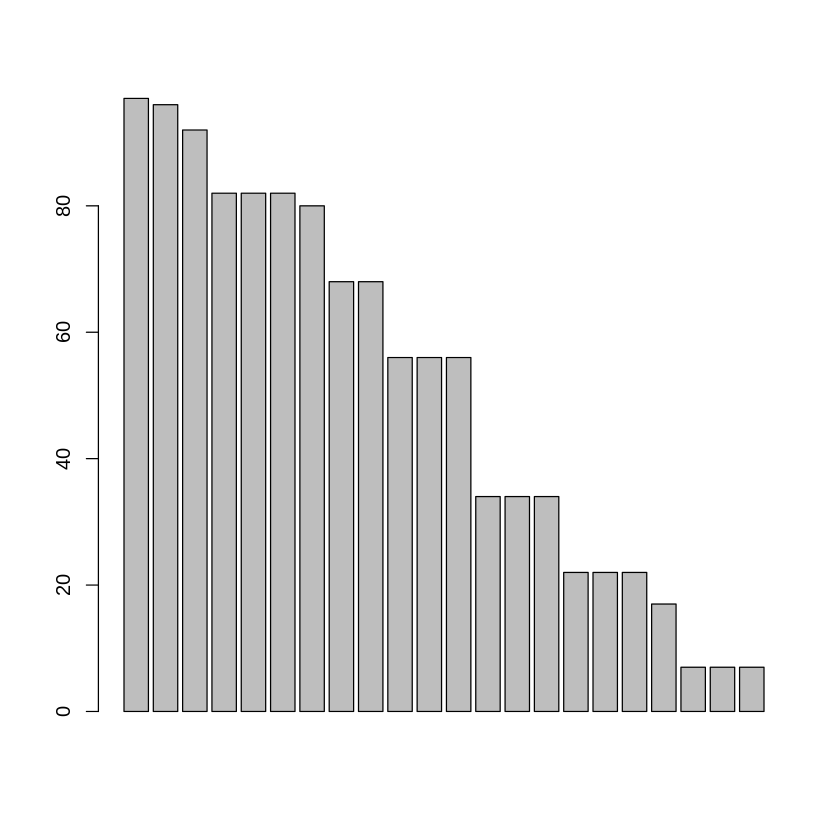

In [34]:
library(glmnet)
library(survival)

d<-0
i=0

x=as.matrix(dat_lasso[,-c(1,2)]) #remove y
surv=Surv(dat_lasso$PFS_T_3Y,dat_lasso$PFS_3Y)  #y

while(i<100){
i=i+1

############
fit <- glmnet(x, surv, family="cox")
#using 10-fold CV to select lambda:
cv.fit =cv.glmnet(x, surv, family="cox", nfolds=10)
#cv.fit$lambda.min
#################
fit_regL=cv.fit
fit_regL_CVdev=cv.fit
# final Lasso model:
fit_regL_coef <- coef(fit_regL, s=fit_regL_CVdev$lambda.min)
select.varialbes = rownames(as.data.frame(which(coef(cv.fit, s = "lambda.min")[,1]!=0)))
#select.varialbes = select.varialbes[-1] #remove intercept
#select.varialbes
d<-append(d,select.varialbes)
}

d=d[-1]  #remove 0
#d
length(d)
d=as.data.frame(table(d))
d=d[order(d[,"Freq"],decreasing=TRUE),]
d
barplot(d$Freq)

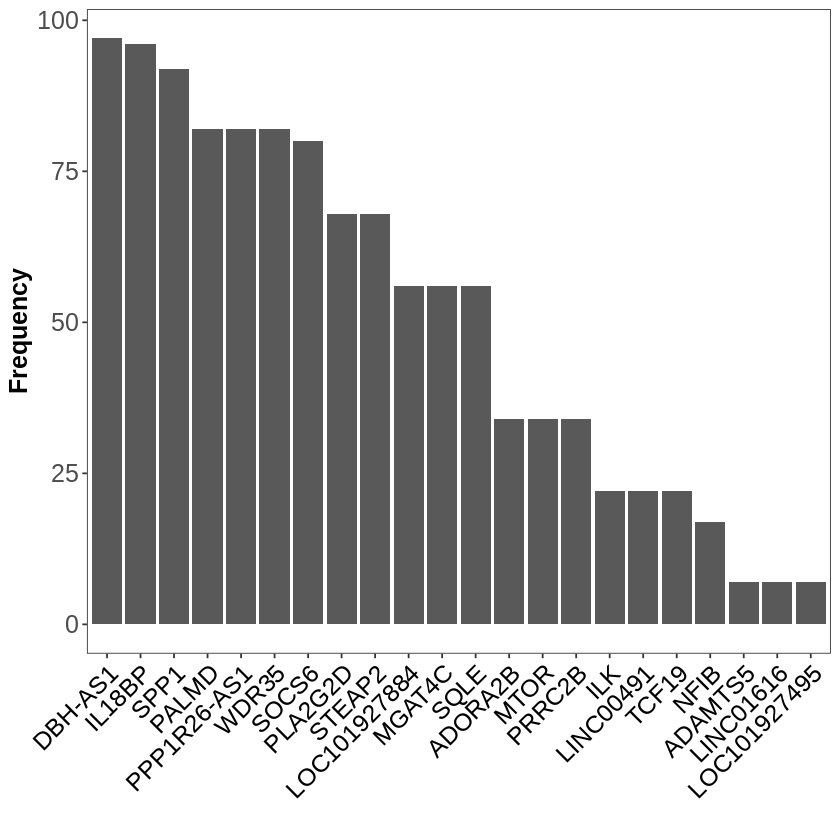

In [35]:
d=info<-as.data.frame(read.table("1.tmp",header = FALSE,sep = "\t", dec = ".",na.strings = "NA",stringsAsFactors=FALSE,check.names = FALSE))
row.names(d)=d$V1
#head(d)
#barplot(d$V2,xlim=c(0,100),names.arg=rownames(d),horiz = TRUE)

library(ggplot2)
p=ggplot(d, aes(x=reorder(V1,-V2), y=V2))+ geom_bar(stat="identity") + ylab("Frequency") +xlab(" ")+theme_bw() +theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1,colour = "black", size = 15),axis.text.y = element_text(size=15),axis.title=element_text(size=15,face="bold"))
                                                                    
p

calculate weight using COX regression

In [40]:
library(survival)

#selected_gene=row.names(d)[1:7]
#selected_gene
selected_gene=c("DBH-AS1","PPP1R26-AS1","SPP1","IL18BP","PALMD","WDR35","SOCS6") #"DBH-AS1",#"PPP1R26-AS1"
dat_cox=as.data.frame(dat_lasso[,selected_gene])
dat_cox=merge(info[,c("PFS_3Y","PFS_T_3Y")],dat_cox,by="row.names")
row.names(dat_cox)=dat_cox[,1]
dat_cox=dat_cox[,-1]
head(dat_cox)

res.cox <- coxph(Surv(PFS_T_3Y,PFS_3Y) ~., data = dat_cox)
res.cox
as.data.frame(res.cox$coef)

#write.table(as.data.frame(res.cox$coef), file = "output/cox_lasso_coef_5os.txt", append = FALSE, quote = FALSE, sep = "\t",row.names = TRUE,col.names = FALSE)

,PFS_3Y,PFS_T_3Y,DBH-AS1,PPP1R26-AS1,SPP1,IL18BP,PALMD,WDR35,SOCS6
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
EXP1140RNA1,1,2.48,7.756529,7.581623,7.888486,8.275431,7.021869,5.634531,6.140520
EXP1140RNA10,1,1.20,7.646461,7.865871,6.123022,8.397339,6.790586,5.729868,5.613319
EXP1140RNA101,1,2.53,7.553991,7.713748,7.281157,8.696938,8.071164,5.313745,6.238245
EXP1140RNA102,0,3.00,7.777276,6.947274,6.093729,8.730003,6.509029,5.226818,5.673654
EXP1140RNA103,0,3.00,8.020908,7.619758,6.270685,9.032767,6.841760,5.338220,5.628157
EXP1140RNA104,0,3.00,7.575091,7.602215,6.989758,8.006333,6.388757,5.226666,6.089823


Call:
coxph(formula = Surv(PFS_T_3Y, PFS_3Y) ~ ., data = dat_cox)

                 coef exp(coef) se(coef)      z          p
`DBH-AS1`     -1.8987    0.1498   0.7697 -2.467    0.01362
`PPP1R26-AS1`  2.2785    9.7620   0.5577  4.085 0.00004403
SPP1           0.5579    1.7470   0.2125  2.626    0.00865
IL18BP        -0.5283    0.5896   0.5779 -0.914    0.36064
PALMD          0.9354    2.5484   0.3392  2.758    0.00582
WDR35          2.8145   16.6844   0.6026  4.670 0.00000301
SOCS6          0.9771    2.6568   0.5498  1.777    0.07551

Likelihood ratio test=74.01  on 7 df, p=0.000000000000228
n= 99, number of events= 30 

,res.cox$coef
,<dbl>
`DBH-AS1`,-1.8987427
`PPP1R26-AS1`,2.2785000
SPP1,0.5579107
IL18BP,-0.5283059
PALMD,0.9354494
WDR35,2.8144753
SOCS6,0.9771139


# validation with survival info

,ID,coef
,<chr>,<dbl>
1,`DBH-AS1`,-1.8987427
2,`PPP1R26-AS1`,2.2785000
3,SPP1,0.5579107
4,IL18BP,-0.5283059
5,PALMD,0.9354494
6,WDR35,2.8144753


[1]  5 99

[1] 26.55995


High risk score  Low risk score 
             49              50 

,score,group
,<dbl>,<chr>
EXP1140RNA1,28.45595,High risk score
EXP1140RNA10,26.94341,High risk score
EXP1140RNA101,28.06864,High risk score
EXP1140RNA108,28.20659,High risk score
EXP1140RNA109,31.50264,High risk score
EXP1140RNA11,27.13210,High risk score


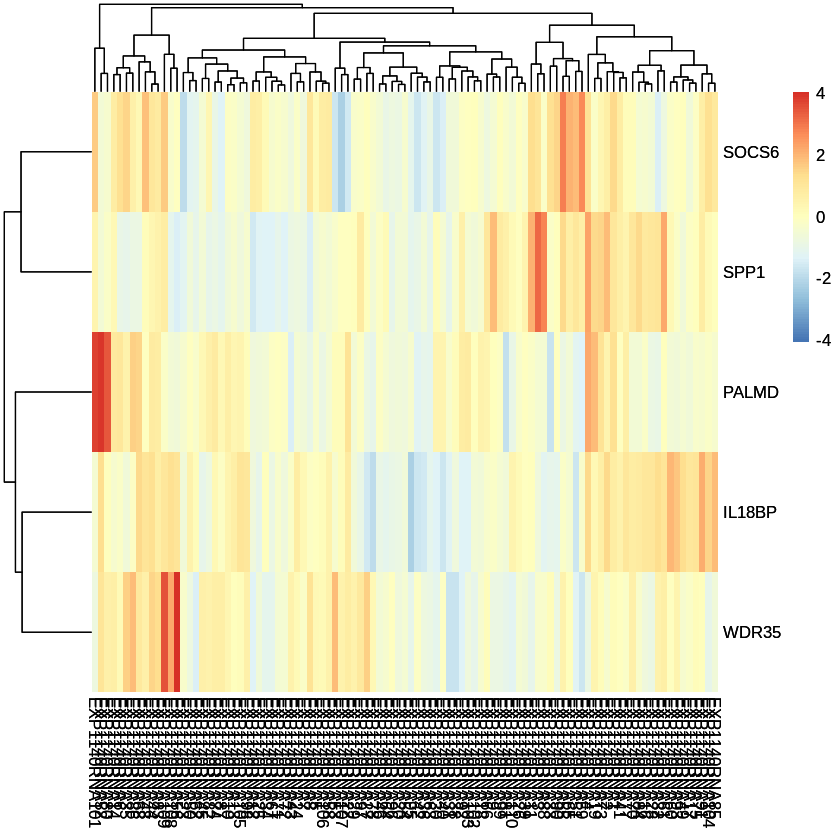

In [40]:
# random forest
#signature=as.data.frame(vs.pbc$varselect)
#colnames(signature)=c("ID","coef")
#signature$ID=row.names(as.data.frame(vs.pbc$varselect))
#head(signature)


#with self-train model
#signature=as.data.frame(res.cox$coef)
#signature$ID=row.names(as.data.frame(res.cox$coef))
#signature$coef=res.cox$coef
#signature=signature[,-1]
#head(signature)

## with trained model
signature<-as.data.frame(read.table("output/cox_lasso_coef.txt",header =FALSE,sep = "\t", dec = ".",na.strings = "NA",stringsAsFactors=FALSE,check.names = FALSE))
colnames(signature)=c("ID","coef")
head(signature)

signature=merge(signature,exprSet_symbol,x.all=TRUE,by.x="ID",by.y="row.names")
#sweep(info,1)
row.names(signature)=signature[,1]

#####################
#convert rank
#signature=cbind(signature[,c(1:2)],as.data.frame(apply(signature[,-c(1:2)],2,rank)))
#####################

signature=signature[,-1]
signature=sweep(data.matrix(signature[,-1]),1,signature$coef, FUN = "*")
#signature
dim(signature)

#heatmap plot
library(ComplexHeatmap)
library(pheatmap)
p<-pheatmap(signature,scale="row",show_rownames=T, cluster_cols=T, cluster_rows=T,cex=1, clustering_distance_rows="euclidean", cex=1,clustering_distance_cols="euclidean", clustering_method="complete", border_color=FALSE)
p


S_score<-as.data.frame(apply(signature,2,sum))
S_score$ID=row.names(S_score)
colnames(S_score)[1]="score"
cutoff=median(S_score[,1])
cutoff
a=S_score[S_score[, "score"]>cutoff,]
b=S_score[S_score[, "score"]<=cutoff,]
a$group="High risk score"
b$group="Low risk score"
S_score=rbind(a,b)
S_score=S_score[,-2]  #"ID" column
table(S_score$group)
head(S_score)

#write.table(S_score, file = "output/NPC0501_S_score.txt", append = FALSE, quote = FALSE, sep = "\t",row.names = TRUE,col.names = FALSE)

png 
  2

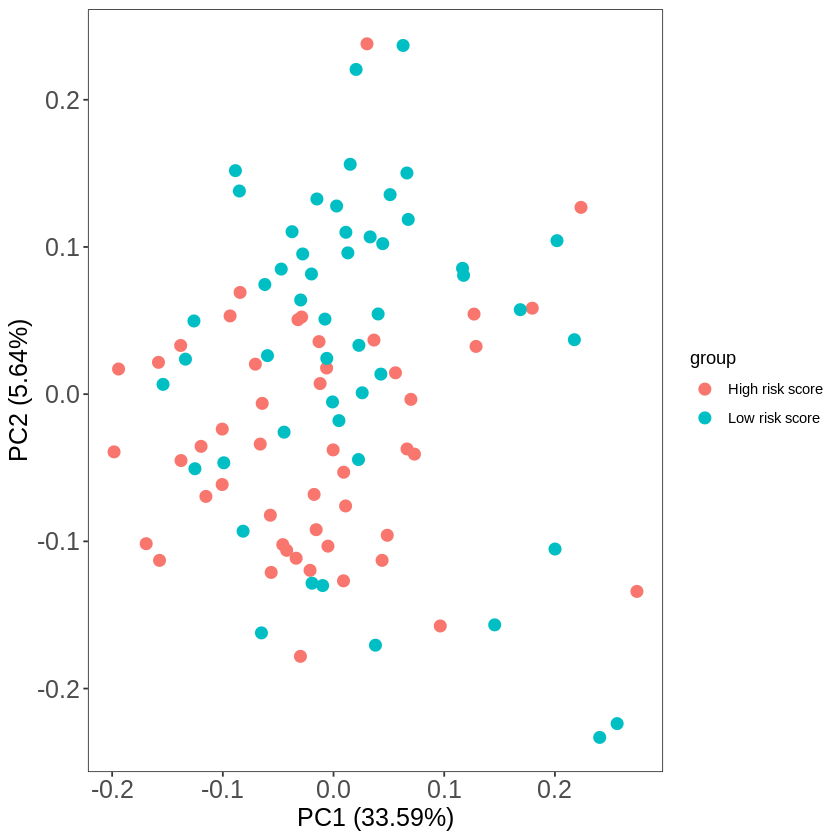

In [41]:
#head(S_score)
dat_pca=t(exprSet_symbol)
#head(dat_pca)
dat_pca=merge(S_score,dat_pca,by="row.names")
row.names(dat_pca)=dat_pca[,1]
dat_pca=dat_pca[,-c(1,2)]
#head(dat_pca)


library(ggfortify)
# apply PCA - scale. = TRUE is highly advisable, but default is FALSE. rma data have done log2,so no scale here
#par(mfcol=c(2,2))
out_pca <- prcomp(dat_pca[,-1])
autoplot(out_pca,data=dat_pca,colour='group',size=3,label=FALSE,label.size=20,legend.size=20) +theme_bw()+theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),axis.text=element_text(size=15),axis.title=element_text(size=15))

pdf(file="output/pca.pdf")
autoplot(out_pca,data=dat_pca,colour='group',size=3,label=FALSE,label.size=20,legend.size=20) +theme_bw()+theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),axis.text=element_text(size=15),axis.title=element_text(size=15))
dev.off()


High risk score  Low risk score 
             49              50 

,0,1,Sum
High risk score,21,28,49
Low risk score,48,2,50
Sum,69,30,99


Call:
coxph(formula = Surv(PFS_T_3Y, PFS_3Y) ~ group, data = dat_coxsvl)

                        coef exp(coef) se(coef)      z         p
groupLow risk score -3.02962   0.04833  0.73302 -4.133 0.0000358

Likelihood ratio test=37.78  on 1 df, p=0.00000000079
n= 99, number of events= 30 

Call: survfit(formula = Surv(PFS_T_3Y, PFS_3Y) ~ group, data = dat_coxsvl)

                group=High risk score 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
 0.02     49       1    0.980  0.0202        0.941        1.000
 0.48     48       1    0.959  0.0283        0.905        1.000
 0.52     47       1    0.939  0.0342        0.874        1.000
 0.56     46       1    0.918  0.0391        0.845        0.998
 0.70     45       1    0.898  0.0432        0.817        0.987
 0.75     44       1    0.878  0.0468        0.790        0.974
 0.76     43       1    0.857  0.0500        0.765        0.961
 0.77     42       1    0.837  0.0528        0.739        0.947
 0.87     41       1    0.816  0.0553        0.715        0.932
 0.92     40       1    0.796  0.0576        0.691        0.917
 1.16     39       2    0.755  0.0614        0.644        0.886
 1.18     37       1    0.735  0.0631        0.621        0.869
 1.20     36       1    0.714  0.0645        0.598   

,0,1,Sum
High risk score,27,22,49
Low risk score,48,2,50
Sum,75,24,99


Call:
coxph(formula = Surv(OST_5Y, OS_5Y) ~ group, data = dat_coxsvl)

                        coef exp(coef) se(coef)      z        p
groupLow risk score -2.68509   0.06822  0.73921 -3.632 0.000281

Likelihood ratio test=25.61  on 1 df, p=0.0000004183
n= 99, number of events= 24 

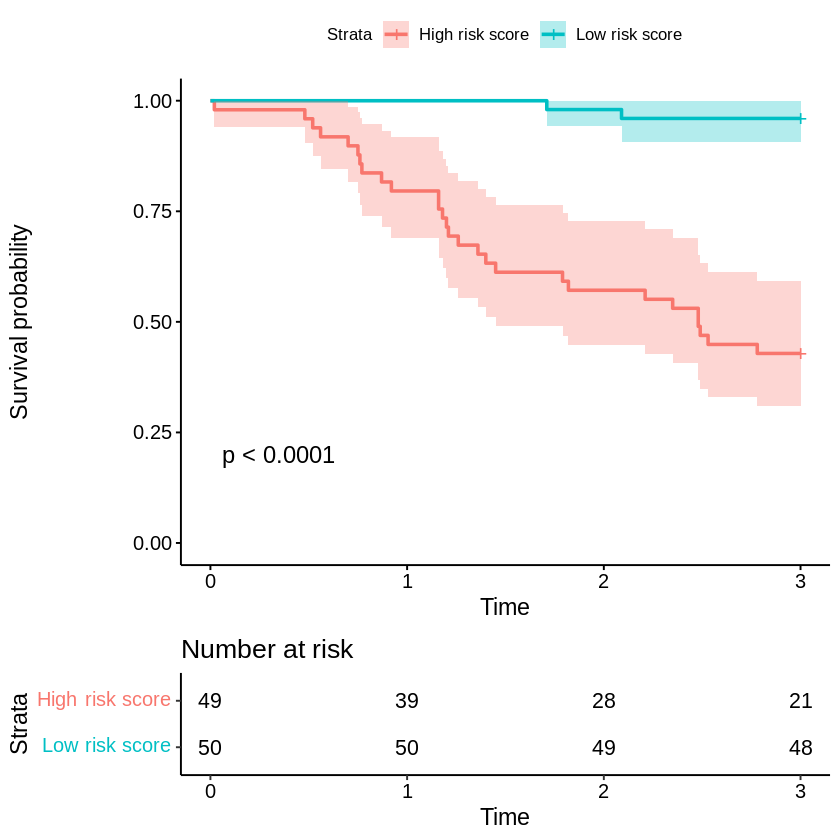

Call: survfit(formula = Surv(OST_5Y, OS_5Y) ~ group, data = dat_coxsvl)

                group=High risk score 
  time n.risk n.event survival std.err lower 95% CI upper 95% CI
 0.608     49       1    0.980  0.0202        0.941        1.000
 0.712     48       1    0.959  0.0283        0.905        1.000
 0.841     47       1    0.939  0.0342        0.874        1.000
 0.939     46       1    0.918  0.0391        0.845        0.998
 1.325     45       1    0.898  0.0432        0.817        0.987
 1.552     43       1    0.877  0.0470        0.790        0.974
 1.717     42       1    0.856  0.0503        0.763        0.961
 1.777     41       1    0.835  0.0532        0.737        0.946
 1.903     40       1    0.814  0.0559        0.712        0.932
 2.212     39       1    0.794  0.0582        0.687        0.916
 2.349     38       1    0.773  0.0603        0.663        0.900
 2.765     37       1    0.752  0.0622        0.639        0.884
 2.875     36       1    0.731  0.0639     

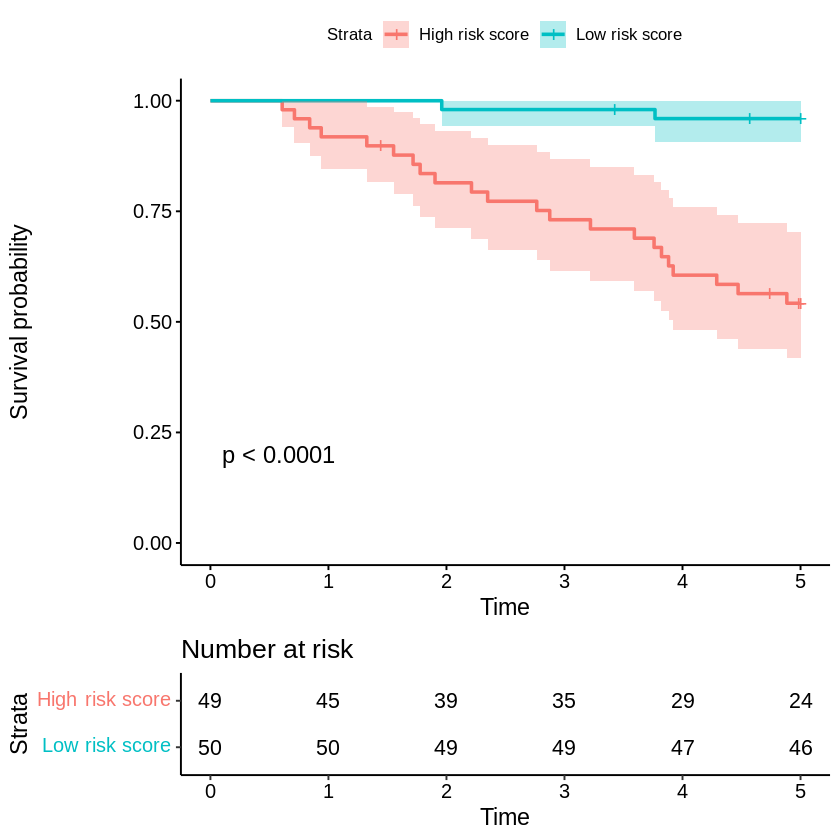

In [42]:
library(survival)
library(ggplot2)
library(ggpubr)
library(magrittr)
#install.packages("survminer")
library(survminer)
library(dplyr)

##get survival info
info<-as.data.frame(read.table("data/NPC0501_batch1_99_anno.csv",header = TRUE,sep = ",", dec = ".",na.strings = "NA",stringsAsFactors=FALSE,check.names = FALSE))
rownames(info)=info[,1]
info=info[,-1]
info=info[,c("OS_5Y","OST_5Y","PFS_3Y","PFS_T_3Y")]

#info<-as.data.frame(read.table("data/NPC0501.tmp",header = TRUE,sep = "\t", dec = ".",na.strings = "NA",stringsAsFactors=FALSE,check.names = FALSE))
#rownames(info)=info[,1]
#info=info[,-1]
#head(info)

dat_coxsvl=merge(info,S_score,by="row.names")
row.names(dat_coxsvl)=dat_coxsvl[,1]
dat_coxsvl=as.data.frame(dat_coxsvl[,-1])
colnames(dat_coxsvl)=c("OS_5Y","OST_5Y","PFS_3Y","PFS_T_3Y","score","group")

# How many samples of each type?
table(dat_coxsvl$group)


# Tabulate by outcome
xtabs(~group+PFS_3Y, data=dat_coxsvl) %>% addmargins()
coxph(Surv(PFS_T_3Y, PFS_3Y)~group, data=dat_coxsvl)
sfit <- survfit(Surv(PFS_T_3Y, PFS_3Y)~group, data=dat_coxsvl)
#summary(sfit, times=seq(0,365*5,365))
ggsurvplot(sfit, conf.int=TRUE, pval=TRUE,risk.table = TRUE,legend.labs = c("High risk score", "Low risk score"))
#ggsurvplot(sfit, conf.int=TRUE, pval=TRUE,risk.table=True,data=groupedclin)
summary(sfit)
#pdf("output/Model_PFS.pdf")
#ggsurvplot(sfit, conf.int=TRUE, pval=TRUE,risk.table = TRUE,legend.labs = c("High risk score", "Low risk score"))
#dev.off()


#OS
xtabs(~group+OS_5Y, data=dat_coxsvl) %>% addmargins()
coxph(Surv(OST_5Y, OS_5Y)~group, data=dat_coxsvl)
sfit <- survfit(Surv(OST_5Y, OS_5Y)~group, data=dat_coxsvl)
#summary(sfit, times=seq(0,365*5,365))
ggsurvplot(sfit, conf.int=TRUE, pval=TRUE,risk.table = TRUE,legend.labs = c("High risk score", "Low risk score"))
#sfit$upper
#sfit$surv
#sfit$lower
summary(sfit)
#pdf("output/Model_OS.pdf")
#ggsurvplot(sfit, conf.int=TRUE, pval=TRUE,risk.table = TRUE,legend.labs = c("High risk score", "Low risk score"))
#dev.off()

[1] "OS_5Y"                         "OST_5Y"                       
 [3] "PFS_3Y"                        "PFS_T_3Y"                     
 [5] "Age"                           "Treatment_Arm"                
 [7] "Gender"                        "LDH"                          
 [9] "T_stage"                       "N_stage"                      
[11] "Stage"                         "RT_Tech_String"               
[13] "Dose_per_fraction"             "Total_Dose"                   
[15] "RT_IM_2D"                      "RT_IM_3D"                     
[17] "LDH_per10L"                    "relapse"                      
[19] "AJCC_UICC_stage_group"         "ecog"                         
[21] "Remarks"                       "WHO_pathological_type"        
[23] "to identify type of WHO patho" "date"                         
[25] "Neutrophil"                    "Lymphocyte"                   
[27] "date_of_blood_test"            "Neutrophil_Lymphocyte_ratio"  
[29] "score"                         "group"

,beta,HR (95% CI for HR),wald.test,p.value
,<fct>,<fct>,<fct>,<fct>
Age,0.0085,1 (0.97-1.1),0.17,0.68
Gender,0.5,1.6 (0.39-7),0.45,0.5
LDH,0.0054,1 (1-1),5.2,0.023
Stage,0.62,1.9 (0.83-4.2),2.2,0.13
group,-2.7,0.068 (0.016-0.29),13,0.00028
WHO_pathological_type,0.11,1.1 (0.37-3.3),0.04,0.85
score,0.85,2.3 (1.8-3.1),34,0.0000000048
Neutrophil,0.016,1 (0.81-1.3),0.02,0.89
Neutrophil_Lymphocyte_ratio,0.14,1.2 (1-1.3),6,0.014


Call:
coxph(formula = Surv(OST_5Y, OS_5Y) ~ Age + Gender + LDH + Stage + 
    group, data = info)

                         coef exp(coef)  se(coef)      z        p
Age                 -0.004952  0.995061  0.021079 -0.235 0.814281
GenderM              0.673243  1.960585  0.762480  0.883 0.377256
LDH                  0.003970  1.003977  0.002300  1.726 0.084395
Stage                0.442940  1.557278  0.428918  1.033 0.301749
groupLow risk score -2.661373  0.069852  0.741857 -3.587 0.000334

Likelihood ratio test=30.69  on 5 df, p=0.00001078
n= 99, number of events= 24 

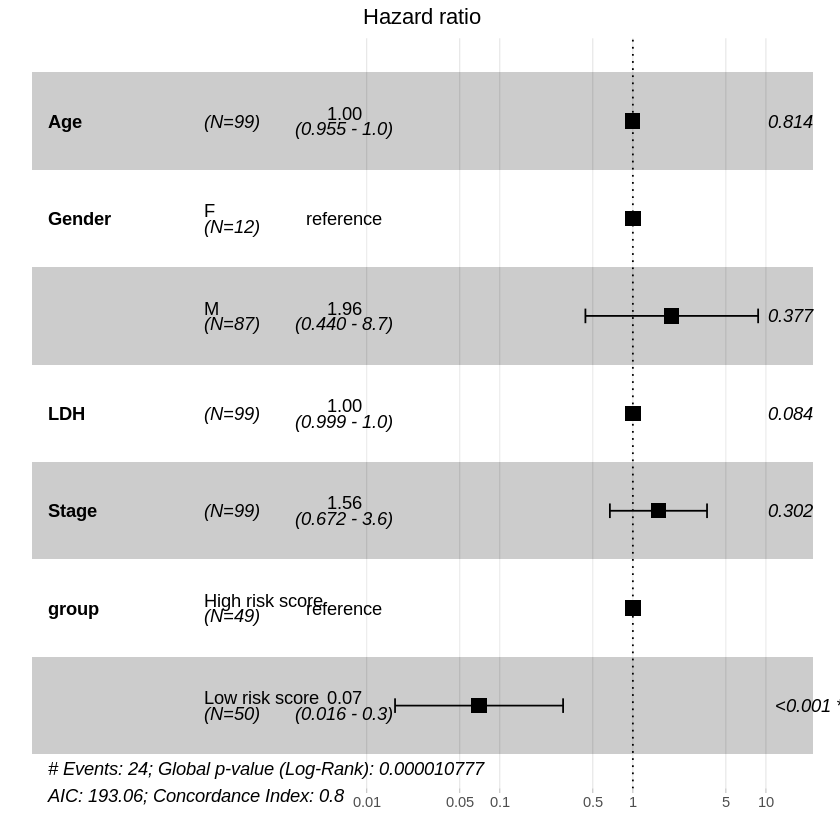

In [17]:
# options(digits=3)
options(scipen=200)
library(survival)

info<-as.data.frame(read.table("data/NPC0501_batch1_99_anno.csv",header = TRUE,sep = ",", dec = ".",na.strings = "NA",stringsAsFactors=FALSE,check.names = FALSE))
rownames(info)=info[,1]
info=info[,-c(1:2)]  #rm IDs

#head(S_score)
info=merge(info,S_score,by="row.names")
row.names(info)=info[,1]
info=info[,-1]
info$AJCC_UICC_stage_group=info$Stage
colnames(info)
#write.table(info, file = "output/NPC0501_riskGrouped_clinical data.txt", append = FALSE, quote = FALSE, sep = "\t",row.names = TRUE,col.names = TRUE)

#Univariant analyses
#univariant Cox HR regression analysis
covariates <- c("Age","Gender","LDH","Stage","group","WHO_pathological_type","score","Neutrophil","Neutrophil_Lymphocyte_ratio","LDH_per10L")
#head(info[,covariates])
univ_formulas <-sapply(covariates,function(x) as.formula(paste('Surv(OST_5Y, OS_5Y)~', x)))
#univ_formulas
univ_models <- lapply(univ_formulas, function(x){coxph(x, data = info)})
univ_results <- lapply(univ_models,
                       function(x){ 
                          x <- summary(x)
                          p.value<-signif(x$wald["pvalue"], digits=2)
                          wald.test<-signif(x$wald["test"], digits=2)
                          beta<-signif(x$coef[1], digits=2);#coeficient beta
                          HR <-signif(x$coef[2], digits=2);#exp(beta)
                          HR.confint.lower <- signif(x$conf.int[,"lower .95"],2)
                          HR.confint.upper <- signif(x$conf.int[,"upper .95"],2)
                          HR <- paste0(HR, " (", 
                                       HR.confint.lower, "-", HR.confint.upper, ")")
                          res<-c(beta, HR, wald.test, p.value)
                          return(res)
                          #return(exp(cbind(coef(x),confint(x))))
                         })
res <- t(as.data.frame(univ_results, check.names = FALSE)[1:4,])
colnames(res)<-c("beta", "HR (95% CI for HR)","wald.test", "p.value")
as.data.frame(res)
                       
#multivariant Cox HR regression analysis
res.cox <- coxph(Surv(OST_5Y, OS_5Y) ~  Age + Gender + LDH + Stage + group , data =  info)  # + Neutrophil + Lymphocyte 
res.cox

survminer::ggforest(res.cox, data = info,fontsize=1)
#pdf(file="output/NPC0501_MVA_plot.pdf")
#survminer::ggforest(res.cox, data = info,fontsize=1)
#dev.off()

#### SPP1 group

In [5]:
SPP1_exp=t(exprSet_symbol)
Q1=quantile(as.numeric(as.character(SPP1_exp[,"SPP1"])))[[2]]
Q3=quantile(as.numeric(as.character(SPP1_exp[,"SPP1"])))[[4]]
Q1
Q3

dim(SPP1_exp)
#hist(as.numeric(as.character(exprSet_symbol["SPP1",])))
a=as.data.frame(SPP1_exp[SPP1_exp[,"SPP1"]<Q1,])
b=as.data.frame(SPP1_exp[SPP1_exp[,"SPP1"]>Q3,])
#head(a)
dim(a)
dim(b)

a$group="SPP1 BOTTOM"
b$group="SPP1 TOP"
SPP1_exp=rbind(a,b)
head(SPP1_exp)



[1] 5.884025

[1] 7.437544

[1]    99 20824

[1]    25 20824

[1]    25 20824

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A4GALT,A4GNT,AA06,⋯,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
EXP1140RNA108,5.511701,8.209435,6.400043,8.163079,6.764778,5.323668,6.757099,8.733083,4.698876,6.330327,⋯,7.380085,5.934767,5.944440,8.655583,6.620914,7.332803,7.987797,8.204220,8.460531,SPP1 BOTTOM
EXP1140RNA12,4.766342,7.655296,5.953199,8.008764,7.142896,4.999943,6.565694,8.322196,4.207222,6.022314,⋯,7.616143,6.107972,5.437915,9.193982,6.117571,7.829227,8.056381,7.662836,8.814523,SPP1 BOTTOM
EXP1140RNA23,4.559936,7.735435,5.520371,8.307125,7.818641,5.069761,6.638363,8.359566,4.493998,5.693494,⋯,7.467703,6.124871,5.463574,9.577785,6.083220,7.267096,8.325830,7.374718,8.653530,SPP1 BOTTOM
EXP1140RNA25,4.507112,7.439624,5.588375,8.135647,7.512545,5.048399,6.688273,7.957190,4.309295,5.520348,⋯,7.285332,5.822727,5.473813,9.489563,5.990775,7.415460,8.103059,7.653994,8.261116,SPP1 BOTTOM
EXP1140RNA31,4.636758,7.502003,6.258132,8.336632,6.964301,5.259389,6.774051,8.461323,4.253983,5.832839,⋯,7.845224,6.469178,5.646336,9.704395,5.995144,7.613501,8.275201,7.625565,8.049826,SPP1 BOTTOM
EXP1140RNA34,4.554714,7.598948,5.782724,8.328106,7.620344,5.245618,6.429592,8.224192,4.419158,5.918141,⋯,7.960282,6.270474,5.561801,9.315267,5.953394,7.228278,8.010351,7.534381,8.795069,SPP1 BOTTOM


,OS_5Y,OST_5Y,PFS_3Y,PFS_T_3Y,relapse,SPP1,group
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<chr>
EXP1140RNA1,0,4.983,1,2.48,1,7.888486,SPP1 TOP
EXP1140RNA108,0,5.000,0,3.00,0,5.558820,SPP1 BOTTOM
EXP1140RNA109,1,0.841,1,0.77,1,7.549760,SPP1 TOP
EXP1140RNA11,0,5.000,0,3.00,0,9.025226,SPP1 TOP
EXP1140RNA12,0,5.000,0,3.00,1,5.052287,SPP1 BOTTOM
EXP1140RNA16,1,3.767,1,2.09,1,7.784802,SPP1 TOP



SPP1 BOTTOM    SPP1 TOP 
         25          25 

,0,1,Sum
SPP1 BOTTOM,21,4,25
SPP1 TOP,8,17,25
Sum,29,21,50


Call:
coxph(formula = Surv(PFS_T_3Y, PFS_3Y) ~ group, data = dat_coxsvl)

               coef exp(coef) se(coef)     z       p
groupSPP1 TOP 1.794     6.011    0.559 3.209 0.00133

Likelihood ratio test=13.55  on 1 df, p=0.0002319
n= 50, number of events= 21 

Call: survfit(formula = Surv(PFS_T_3Y, PFS_3Y) ~ group, data = dat_coxsvl)

                group=SPP1 BOTTOM 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
 0.52     25       1     0.96  0.0392        0.886        1.000
 0.75     24       1     0.92  0.0543        0.820        1.000
 1.79     23       1     0.88  0.0650        0.761        1.000
 2.35     22       1     0.84  0.0733        0.708        0.997

                group=SPP1 TOP 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
 0.56     25       1     0.96  0.0392        0.886        1.000
 0.70     24       1     0.92  0.0543        0.820        1.000
 0.76     23       1     0.88  0.0650        0.761        1.000
 0.77     22       1     0.84  0.0733        0.708        0.997
 0.87     21       1     0.80  0.0800        0.658        0.973
 0.92     20       1     0.76  0.0854        0.610        0.947
 1.16     19       1     0.72  0.0898        0.564        0.919
 1.21     18       1    

,0,1,Sum
SPP1 BOTTOM,22,3,25
SPP1 TOP,12,13,25
Sum,34,16,50


Call:
coxph(formula = Surv(OST_5Y, OS_5Y) ~ group, data = dat_coxsvl)

                coef exp(coef) se(coef)     z       p
groupSPP1 TOP 1.8307    6.2382   0.6438 2.844 0.00446

Likelihood ratio test=10.74  on 1 df, p=0.001048
n= 50, number of events= 16 

Call: survfit(formula = Surv(OST_5Y, OS_5Y) ~ group, data = dat_coxsvl)

                group=SPP1 BOTTOM 
  time n.risk n.event survival std.err lower 95% CI upper 95% CI
 0.939     25       1    0.960  0.0392        0.886            1
 4.471     24       1    0.920  0.0543        0.820            1
 4.884     22       1    0.878  0.0660        0.758            1

                group=SPP1 TOP 
  time n.risk n.event survival std.err lower 95% CI upper 95% CI
 0.841     25       1    0.960  0.0392        0.886        1.000
 1.325     24       1    0.920  0.0543        0.820        1.000
 1.552     22       1    0.878  0.0660        0.758        1.000
 1.717     21       1    0.836  0.0749        0.702        0.997
 1.777     20       1    0.795  0.0820        0.649        0.973
 1.903     19       1    0.753  0.0877        0.599        0.946
 1.960     18       1    0.711  0.0923        0.551        0.917
 2.212     17       1    0.669  0.0959        0.505        0.886
 2.765     16 

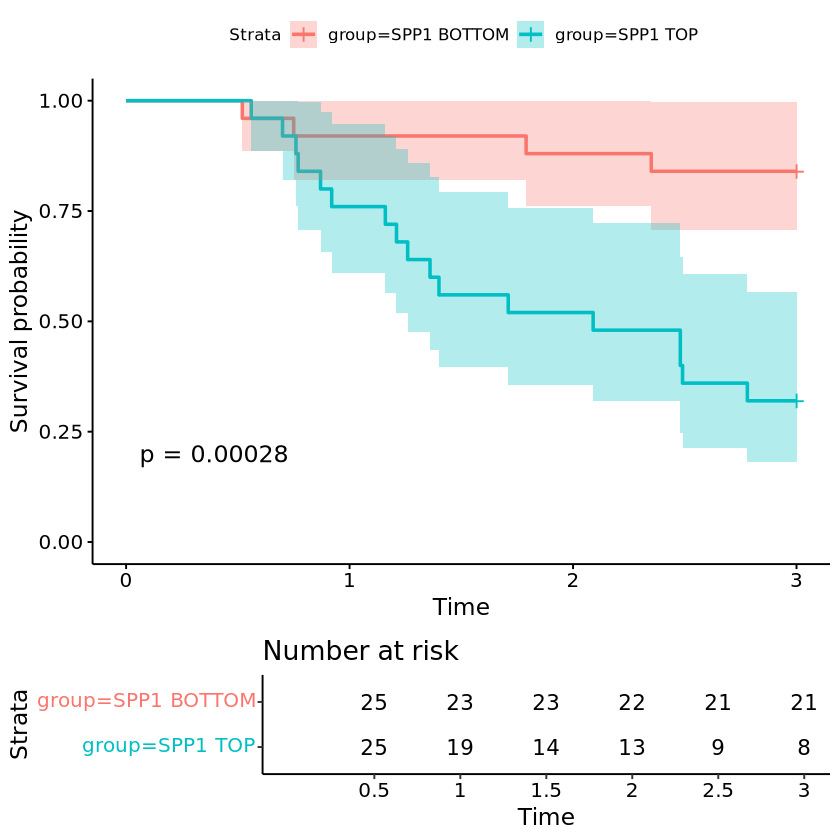

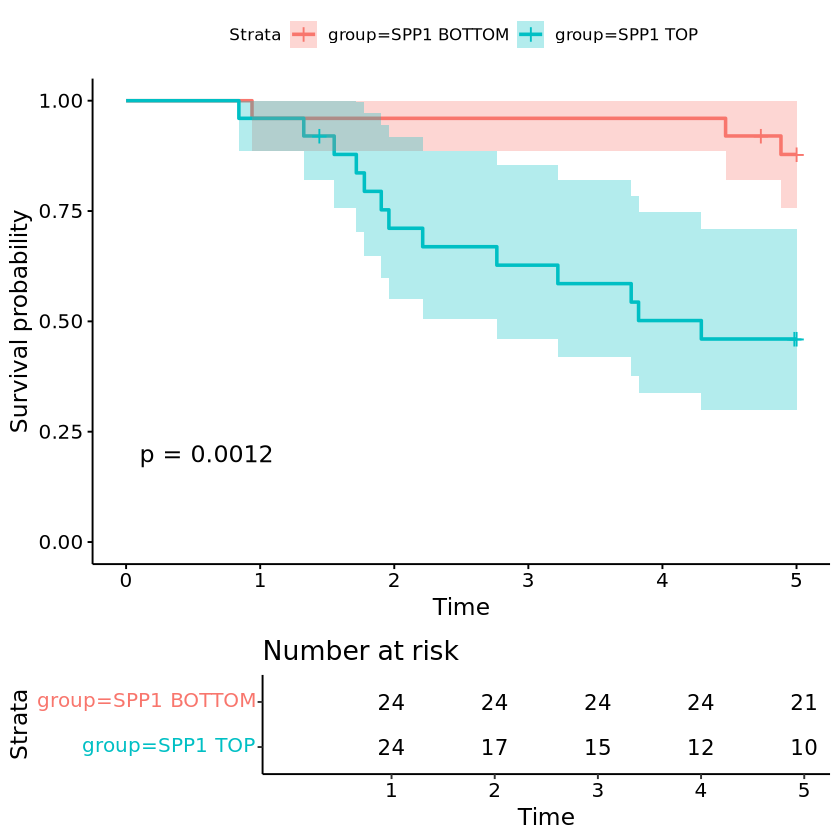

In [10]:
library(survival)
library(ggplot2)
library(ggpubr)
library(magrittr)
#install.packages("survminer")
library(survminer)
#library(dplyr)

##get survival info
info<-as.data.frame(read.table("data/NPC0501_batch1_99_anno.csv",header = TRUE,sep = ",", dec = ".",na.strings = "NA",stringsAsFactors=FALSE,check.names = FALSE))
rownames(info)=info[,1]
info=info[,-1]
info=info[,c("OS_5Y","OST_5Y","PFS_3Y","PFS_T_3Y","relapse")]

dat_coxsvl=merge(info,SPP1_exp[,c("SPP1","group")],by="row.names")
row.names(dat_coxsvl)=dat_coxsvl[,1]
dat_coxsvl=as.data.frame(dat_coxsvl[,-1])
#colnames(dat_coxsvl)=c("OS_5Y","OST_5Y","PFS_3Y","PFS_T_3Y","relapse","SPP1","group")
head(dat_coxsvl)
# How many samples of each type?
table(dat_coxsvl$group)

# Tabulate by outcome
xtabs(~group+PFS_3Y, data=dat_coxsvl) %>% addmargins()
coxph(Surv(PFS_T_3Y, PFS_3Y)~group, data=dat_coxsvl)
sfit <- survfit(Surv(PFS_T_3Y, PFS_3Y)~group, data=dat_coxsvl)
summary(sfit)
ggsurvplot(sfit, conf.int=TRUE, pval=TRUE,risk.table = TRUE)
#ggsurvplot(sfit, conf.int=TRUE, pval=TRUE,risk.table=True,data=groupedclin)


#OS
xtabs(~group+OS_5Y, data=dat_coxsvl) %>% addmargins()
coxph(Surv(OST_5Y, OS_5Y)~group, data=dat_coxsvl)
sfit <- survfit(Surv(OST_5Y, OS_5Y)~group, data=dat_coxsvl)
summary(sfit)
ggsurvplot(sfit, conf.int=TRUE, pval=TRUE,risk.table = TRUE)

#pdf(file="output/SPP1_Q1Q3_OS.pdf.pdf")
#ggsurvplot(sfit, conf.int=TRUE, pval=TRUE,risk.table = TRUE)
#dev.off()

score distribution in relapse group and not-relapse group

In [26]:
info<-as.data.frame(read.table("data/NPC0501_batch1_99_anno.csv",header = TRUE,sep = ",", dec = ".",na.strings = "NA",stringsAsFactors=FALSE,check.names = FALSE))
rownames(info)=info[,1]
info=info[,-c(1:2)]  #rm IDs

#head(S_score)
info=merge(info,S_score,by="row.names")
row.names(info)=info[,1]
info=info[,-1]
head(info)

library(ggplot2)
library(ggpubr)

compare_means(relapse~score, info, method="wilcox.test", paired=FALSE)
p <- ggboxplot(info, x="relapse",
               y = "score", color = "relapse",
               palette = "jco", add = "jitter")
# add p-value
p + stat_compare_means()

table(info$relapse)

info_f=info[info[, "group"] == "Low risk score",] # <=cutoff
table(info_f$relapse)

info_f=info[info[, "group"] == "High risk score",] # >cutoff
table(info_f$relapse)

#pdf("output/Score_relapse_plot.pdf")
#p + stat_compare_means()
#dev.off()

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'y' in selecting a method for function 'merge': object 'S_score' not found


check gene expression

In [2]:
#check specific gene expression

#### with group 
#gdat_mm=merge(as.data.frame(t(exprSet_symbol)),info,by="row.names")
#gdat_mm=gdat_mm[,c("Row.names","relapse","group","SOCS6")]
#gdat_mm$group=gsub("High risk score","2",gdat_mm$group)
#gdat_mm$group=gsub("Low risk score","1",gdat_mm$group)
#gdat_mm$group=as.numeric(gdat_mm$group)
#colnames(gdat_mm)[4]="gene"
#head(gdat_mm)

### with replase
info<-as.data.frame(read.table("data/NPC0501_batch1_99_anno.csv",header = TRUE,sep = ",", dec = ".",na.strings = "NA",stringsAsFactors=FALSE,check.names = FALSE))
rownames(info)=info[,1]

#head(info)
gdat_mm=merge(as.data.frame(t(exprSet_symbol)),info,by="row.names")
gdat_mm=gdat_mm[,c("Row.names","OS_5Y","SPP1")]   #OS_5Y
colnames(gdat_mm)[3]="gene"
colnames(gdat_mm)[2]="group"
#head(gdat_mm)

library(ggplot2)
library(ggpubr)

compare_means(group~gene, gdat_mm, method="wilcox.test", paired=FALSE)
p <- ggboxplot(gdat_mm, x="group",
               y = "gene", color = "group",
               palette = "jco", add = "jitter")
# 添加p值
p + stat_compare_means()


#pdf("output/SPP1_relapse_plot.pdf")
#p + stat_compare_means()
#dev.off()

SyntaxError: invalid syntax (573258064.py, line 13)

check gene vs drug

# validataion in SYS cohort

In [89]:
#(optional) RE-CALCULATE THE WEIGHT
info<-as.data.frame(read.table("data/113ClinicalInfo.txt",header = TRUE,sep = "\t", dec = ".",na.strings = "NA",stringsAsFactors=FALSE,check.names = FALSE))
row.names(info)=info[,1]
#head(info)

library(survival)
eset_f=as.data.frame(read.table("data/GSE102349_NPC_mRNA_processed.txt",header = TRUE,sep = "\t", dec = ".",na.strings = "NA",stringsAsFactors=FALSE,check.names = FALSE))
row.names(eset_f)=eset_f[,1]
eset_f=as.data.frame(t(eset_f[,-1]))
#head(eset_f)

selected_gene=c("SPP1","IL18BP","PALMD","WDR35","SOCS6") #"DBH-AS1",#"PPP1R26-AS1"
dat_cox=as.data.frame(eset_f[,selected_gene])
dat_cox=merge(info[,c("PFS","PFS_T")],dat_cox,by="row.names")
row.names(dat_cox)=dat_cox[,1]
dat_cox=dat_cox[,-1]
head(dat_cox)

#dat_cox=cbind(dat_cox[,c(1:2)],as.data.frame(t(apply(dat_cox[,-c(1:2)],1,rank))))
#head(dat_cox)
#table(dat_cox$SOCS6)

res.cox <- coxph(Surv(PFS_T, PFS) ~., data = dat_cox)
res.cox
as.data.frame(res.cox$coef)

,PFS,PFS_T,SPP1,IL18BP,PALMD,WDR35,SOCS6
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NPC0001PT00004T00004,0,1.758333,184.796,11.153,8.378,1.829,6.123
NPC0001PT00005T00005,0,4.602778,19.298,13.807,6.802,1.357,4.952
NPC0001PT00012T00012,0,3.000000,137.630,4.607,1.433,1.093,8.024
NPC0001PT00014T00014,0,1.161111,62.997,5.718,8.057,2.816,4.054
NPC0001PT00020T00020,0,3.291667,93.828,4.428,7.898,1.362,3.411
NPC0001PT00027T00027,0,1.397222,16.418,6.254,1.439,2.017,2.771


Call:
coxph(formula = Surv(PFS_T, PFS) ~ ., data = dat_cox)

             coef  exp(coef)   se(coef)      z       p
SPP1   -0.0007134  0.9992869  0.0034610 -0.206 0.83670
IL18BP -0.0388503  0.9618947  0.0509182 -0.763 0.44547
PALMD  -0.1782375  0.8367437  0.1431586 -1.245 0.21312
WDR35   0.3512281  1.4208114  0.1300789  2.700 0.00693
SOCS6  -0.0517676  0.9495495  0.1548333 -0.334 0.73812

Likelihood ratio test=12.51  on 5 df, p=0.0284
n= 88, number of events= 16 

,res.cox$coef
,<dbl>
SPP1,-0.0007133752
IL18BP,-0.0388503402
PALMD,-0.1782375081
WDR35,0.3512280999
SOCS6,-0.0517675751


,ID,coef
,<chr>,<dbl>
1,`DBH-AS1`,-1.8987427
2,`PPP1R26-AS1`,2.2785000
3,SPP1,0.5579107
4,IL18BP,-0.5283059
5,PALMD,0.9354494
6,WDR35,2.8144753


,NPC0001PT00264T00264,NPC0001PT00004T00004,NPC0001PT00078T00078,NPC0001PT00234T00234,NPC0001PT00349T00349,NPC0001PT00289T00289,NPC0001PT00370T00370,NPC0001PT00029T00029,NPC0001PT00236T00236,NPC0001PT00312T00312,⋯,NPC0001PT00346T00346,NPC0001PT00178T00178,NPC0001PT00027T00027,NPC0001PT00336T00336,NPC0001PT00001T00001,NPC0001PT00357T00357,NPC0001PT00369T00369,NPC0001PT00431T00431,NPC0002PT00039T00039,NPC0001PT00221T00221
IL18BP,-5.484872,-5.892195,-4.846150,-6.483898,-5.055359,-14.252107,-6.627069,-6.944581,-5.324267,-1.543710,⋯,-3.447196,-7.703228,-3.304025,-8.029193,-8.800519,-7.0359775,-4.627959,-19.505581,-12.5039433,-3.559197
PALMD,1.049574,7.837195,3.417197,7.345149,2.538810,5.202034,2.467716,1.855932,0.776423,1.058929,⋯,0.840969,4.326454,1.346112,1.576232,4.170234,1.6987762,2.072021,6.803524,6.8325227,1.874641
SOCS6,2.186781,5.982868,3.208842,4.089222,6.085465,3.194185,2.955770,2.660681,3.774591,5.671169,⋯,4.046229,2.612803,2.707583,2.402723,3.075955,12.4972867,2.925479,2.091024,3.2811485,3.519564
SPP1,16.654751,103.099672,6.649738,12.377250,3.113700,6.254737,17.589810,1.349586,190.436691,26.790873,⋯,9.390196,18.036138,9.159778,9.370111,12.619383,0.7570849,6.120281,30.659426,0.7994861,37.025188
WDR35,4.078175,5.147675,6.538026,10.157441,4.714246,11.024300,8.646068,4.961920,6.301610,11.893973,⋯,5.837222,4.928146,5.676797,7.067147,5.482598,2.0855262,8.814937,4.390581,10.1489979,5.685240


[1]   5 113

[1] 21.52195


High risk score  Low risk score 
             56              57 

,score,group
,<dbl>,<chr>
NPC0001PT00004T00004,116.17522,High risk score
NPC0001PT00234T00234,27.48516,High risk score
NPC0001PT00370T00370,25.03229,High risk score
NPC0001PT00236T00236,195.96505,High risk score
NPC0001PT00312T00312,43.87123,High risk score
NPC0001PT00061T00061,36.45603,High risk score


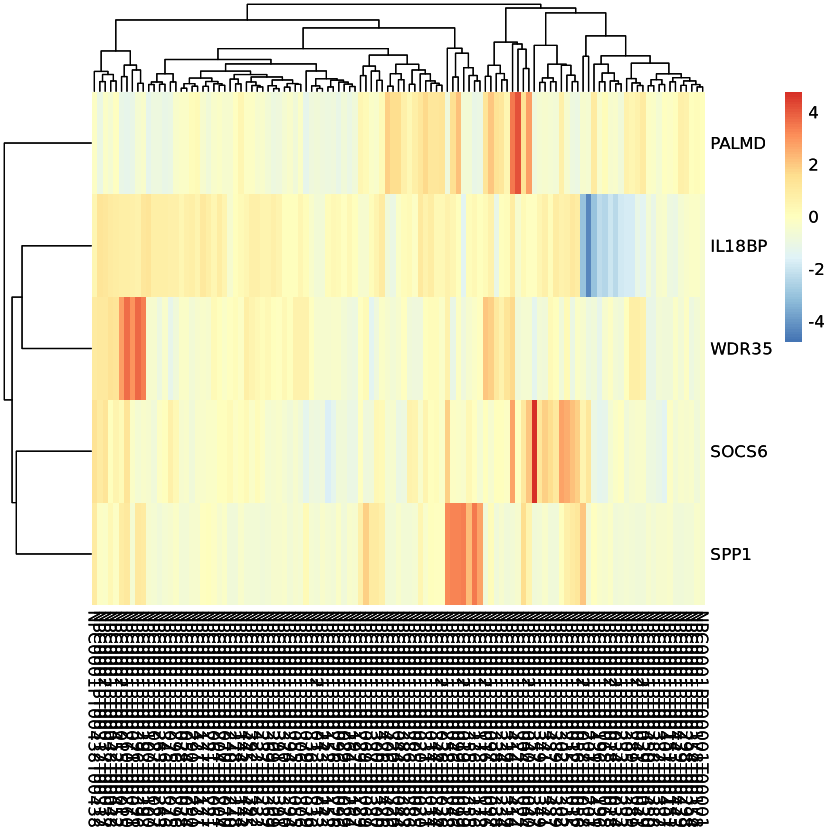

In [90]:
eset_f=as.data.frame(read.table("data/GSE102349_NPC_mRNA_processed.txt",header = TRUE,sep = "\t", dec = ".",na.strings = "NA",stringsAsFactors=FALSE,check.names = FALSE))
row.names(eset_f)=eset_f[,1]
eset_f=eset_f[,-1]
#head(eset_f)

#with self-train model
#signature=as.data.frame(res.cox$coef)
#signature$ID=row.names(as.data.frame(res.cox$coef))
#signature$coef=res.cox$coef
#signature=signature[,-1]
#head(signature)

#with training set model
signature<-as.data.frame(read.table("output/cox_lasso_coef.txt",header =FALSE,sep = "\t", dec = ".",na.strings = "NA",stringsAsFactors=FALSE,check.names = FALSE))
colnames(signature)=c("ID","coef")
head(signature)

####################
# random forest
#signature=as.data.frame(vs.pbc$varselect)
#colnames(signature)=c("ID","coef")
#signature$ID=row.names(as.data.frame(vs.pbc$varselect))
#head(signature)

signature=merge(signature,eset_f,x.all=TRUE,by.x="ID",by.y="row.names")
#head(signature)

#####################
#convert to rank 
#signature=cbind(signature[,c(1:2)],as.data.frame(apply(signature[,-c(1:2)],2,rank)))
#head(signature)

row.names(signature)=signature[,1]
signature=signature[,-1]

signature=sweep(data.matrix(signature[,-1]),1,signature$coef, FUN = "*")
signature
dim(signature)

#heatmap plot
library(ComplexHeatmap)
library(pheatmap)
p<-pheatmap(signature,scale="row",show_rownames=T, cluster_cols=T, cluster_rows=T,cex=1, clustering_distance_rows="euclidean", cex=1,clustering_distance_cols="euclidean", clustering_method="complete", border_color=FALSE)
p


S_score<-as.data.frame(apply(signature,2,sum))
S_score$ID=row.names(S_score)
colnames(S_score)[1]="score"
cutoff=median(S_score[,1])
cutoff
a=S_score[S_score[, "score"]>cutoff,]
b=S_score[S_score[, "score"]<=cutoff,]
a$group="High risk score"
b$group="Low risk score"
S_score=rbind(a,b)
S_score=S_score[,-2]  #"ID" column
table(S_score$group)
head(S_score)

,Th1.angelova,Th17.angelova,Th2.angelova,MDSC.angelova,B.cells.naive.newman,B.cells.memory.newman,Plasma.cells.newman,T.cells.CD8.newman,T.cells.CD4.naive.newman,T.cells.CD4.memory.resting.newman,⋯,Macrophages.M1.newman,Macrophages.M2.newman,Dendritic.cells.resting.newman,Dendritic.cells.activated.newman,Mast.cells.resting.newman,Mast.cells.activated.newman,IL18R1.newman,Neutrophils.newman,Endothelials.Becht,Fibroblasts.Becht
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,ADAM8,ABP1,ASB2,ADORA3,ABCB4,ADAM28,CD79A,IGKC,CD27,CD27,⋯,AQP9,SLC15A3,SLC15A3,SLC15A3,CD33,CD33,BPI,CLC,APLN,COL1A1
2,CCR5,B4GALNT4,CALD1,AG2,ADAM28,BACH2,FCRL2,CD27,LIME1,LIME1,⋯,SLC15A3,ADAMDEC1,CLIC2,CLIC2,FCER1A,FCER1A,MS4A3,P2RY14,BCL6B,COL3A1
3,CD151,C2CD4A,CCR2,ARG1,BACH2,BANK1,GUSBP11,LIME1,RPL3P7,RPL3P7,⋯,ADAMDEC1,CHI3L1,CD68,CCL18,SLC12A8,SLC12A8,RGS13,NCF2,BMP6,COL6A1
4,CD48,C2CD4B,CSRP2,BIN2,BANK1,BLK,HLA-DOB,RPL3P7,FAIM3,FAIM3,⋯,CHI3L1,TLR8,FAM198B,TREM2,IL18R1,IL18R1,CLC,P2RY13,BMX,COL6A2
5,CD52,CA2,DAPK1,C1orf162,BCL7A,CD180,IGHD,CD69,LTB,LTB,⋯,APOBEC3A,CCL8,CCL18,CCL13,GFI1,BPI,IL1RL1,PADI4,CDH5,DCN
6,CD53,CCDC65,DLC1,CAPS,BEND5,CD19,IGHM,FAIM3,BCL11B,BCL11B,⋯,LILRA3,CLIC2,TREM2,CCL22,BPI,MS4A3,P2RY14,IL18RAP,CLEC14A,GREM1


[1] 85 28

Warning message:
“Calling gsva(expr=., gset.idx.list=., method=., ...) is deprecated; use a method-specific parameter object (see '?gsva').”


Estimating ssGSEA scores for 28 gene sets.
[1] "Calculating ranks..."
[1] "Calculating absolute values from ranks..."
  |======================================================================| 100%

[1] "Normalizing..."


,Th1.angelova,Th17.angelova,Th2.angelova,MDSC.angelova,B.cells.naive.newman,B.cells.memory.newman,Plasma.cells.newman,T.cells.CD8.newman,T.cells.CD4.naive.newman,T.cells.CD4.memory.resting.newman,⋯,Macrophages.M1.newman,Macrophages.M2.newman,Dendritic.cells.resting.newman,Dendritic.cells.activated.newman,Mast.cells.resting.newman,Mast.cells.activated.newman,IL18R1.newman,Neutrophils.newman,Endothelials.Becht,Fibroblasts.Becht
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NPC0001PT00264T00264,0.5601689,0.017634786,0.2682373,0.4593726,0.37536353,0.4210863,0.233570918,0.4746909,0.3971886,0.4991112,⋯,0.4238746,0.2339218,0.2333924,0.3721850,-0.08064805,-0.003133941,0.07740139,0.050728178,-0.095584830,0.5163679
NPC0001PT00004T00004,0.4888812,0.086091011,0.3015785,0.4243280,0.09341415,0.1012931,-0.008855141,0.3037580,0.2374735,0.3333034,⋯,0.4704030,0.3439357,0.3562485,0.4007401,-0.02361439,0.049728489,0.04231180,0.174823750,-0.035294093,0.7116688
NPC0001PT00078T00078,0.4594958,0.069343345,0.2731627,0.4322244,0.17415869,0.1902519,0.152151095,0.3521222,0.2533032,0.3627816,⋯,0.3815476,0.2217835,0.2402381,0.2937418,-0.03636606,0.024209157,0.01290732,0.006566979,-0.010933042,0.6358592
NPC0001PT00234T00234,0.5361198,0.031952726,0.2693100,0.4623911,0.28033465,0.3005088,0.119598513,0.3487290,0.2980032,0.3842179,⋯,0.5208014,0.3967881,0.3635425,0.4402702,-0.02406436,0.041888332,0.08463478,0.117734881,0.055647615,0.6820348
NPC0001PT00349T00349,0.4127025,-0.002472561,0.2266989,0.3961036,0.16857616,0.1651816,0.066931841,0.2997620,0.2472891,0.3239951,⋯,0.3068072,0.2212993,0.2296292,0.2591160,0.01629271,0.044271804,-0.01582936,-0.027476297,-0.001473486,0.5418997
NPC0001PT00289T00289,0.5487679,-0.011246604,0.2941806,0.4915906,0.21909691,0.2341877,0.156091970,0.4929778,0.3573725,0.4602808,⋯,0.5029731,0.3812836,0.3734775,0.4306626,-0.03721838,-0.007732327,0.04836766,0.087086963,0.202215463,0.7236898


,Macrophages.M0.newman,Macrophages.M1.newman,Macrophages.M2.newman
,<dbl>,<dbl>,<dbl>
NPC0001PT00264T00264,0.2598138,0.4238746,0.2339218
NPC0001PT00004T00004,0.3543187,0.4704030,0.3439357
NPC0001PT00078T00078,0.2777875,0.3815476,0.2217835
NPC0001PT00234T00234,0.3472100,0.5208014,0.3967881
NPC0001PT00349T00349,0.1942094,0.3068072,0.2212993
NPC0001PT00289T00289,0.4155109,0.5029731,0.3812836


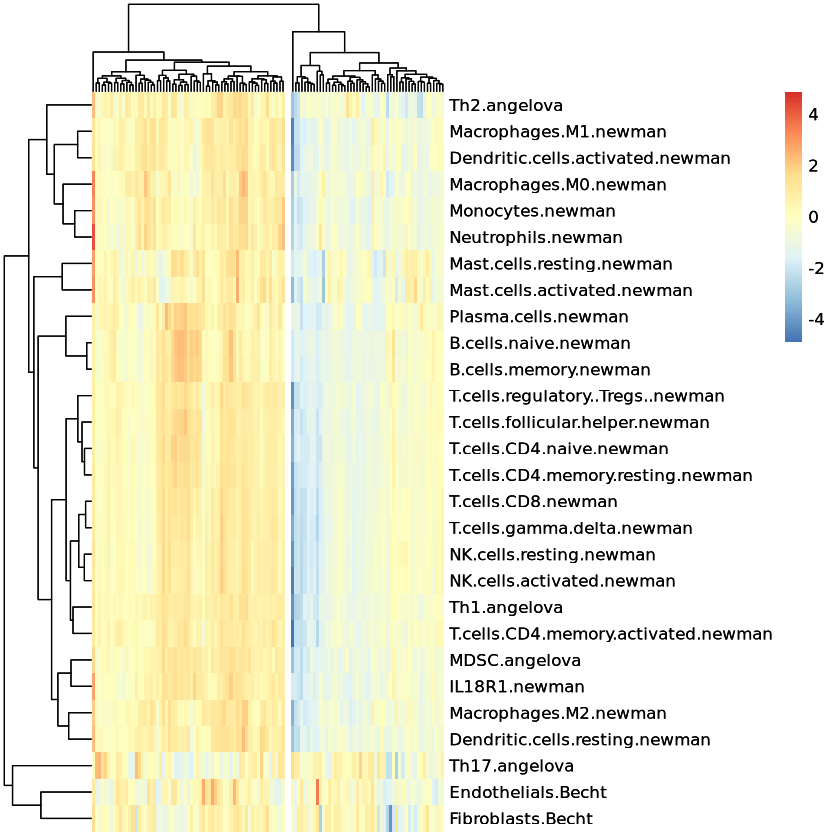

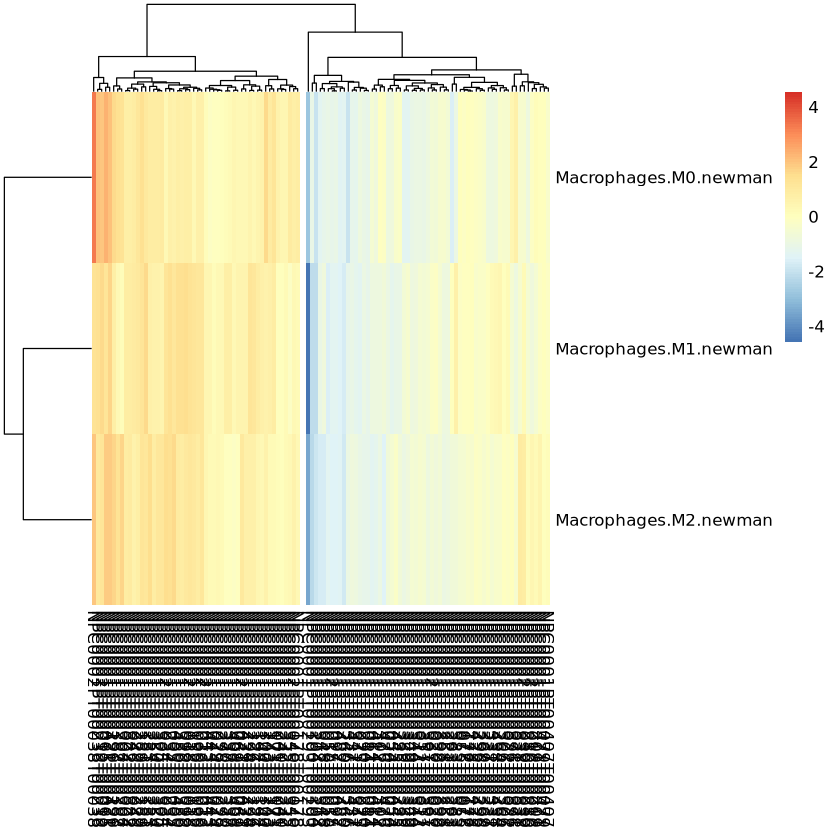

,Macrophages.M0.newman,Macrophages.M1.newman,Macrophages.M2.newman,group
,<dbl>,<dbl>,<dbl>,<chr>
NPC0001PT00004T00004,0.3543187,0.4704030,0.3439357,High M2
NPC0001PT00234T00234,0.3472100,0.5208014,0.3967881,High M2
NPC0001PT00289T00289,0.4155109,0.5029731,0.3812836,High M2
NPC0001PT00236T00236,0.4683113,0.5267952,0.3597506,High M2
NPC0001PT00152T00152,0.3206386,0.5022553,0.3649826,High M2
NPC0001PT00196T00196,0.4310032,0.4621120,0.4250321,High M2


,Row.names,group,gene
,<I<chr>>,<dbl>,<dbl>
1,NPC0001PT00004T00004,2,184.796
2,NPC0001PT00005T00005,2,19.298
3,NPC0001PT00014T00014,1,62.997
4,NPC0001PT00020T00020,1,93.828
5,NPC0001PT00048T00048,1,83.174
6,NPC0001PT00056T00056,1,155.692


.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
group,184.796,62.997,1,1,1,ns,Wilcoxon
group,184.796,93.828,1,1,1,ns,Wilcoxon
group,184.796,83.174,1,1,1,ns,Wilcoxon
group,184.796,155.692,1,1,1,ns,Wilcoxon
group,184.796,48.345,1,1,1,ns,Wilcoxon
group,184.796,38.763,1,1,1,ns,Wilcoxon
group,184.796,20.524,1,1,1,ns,Wilcoxon
group,184.796,73.656,1,1,1,ns,Wilcoxon
group,184.796,27.418,1,1,1,ns,Wilcoxon


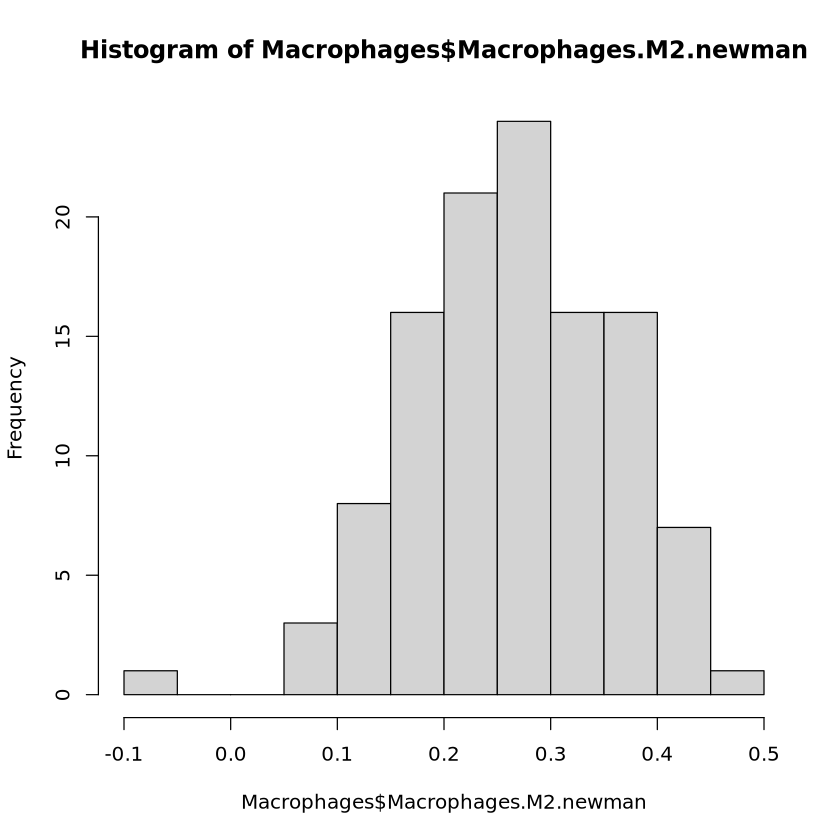

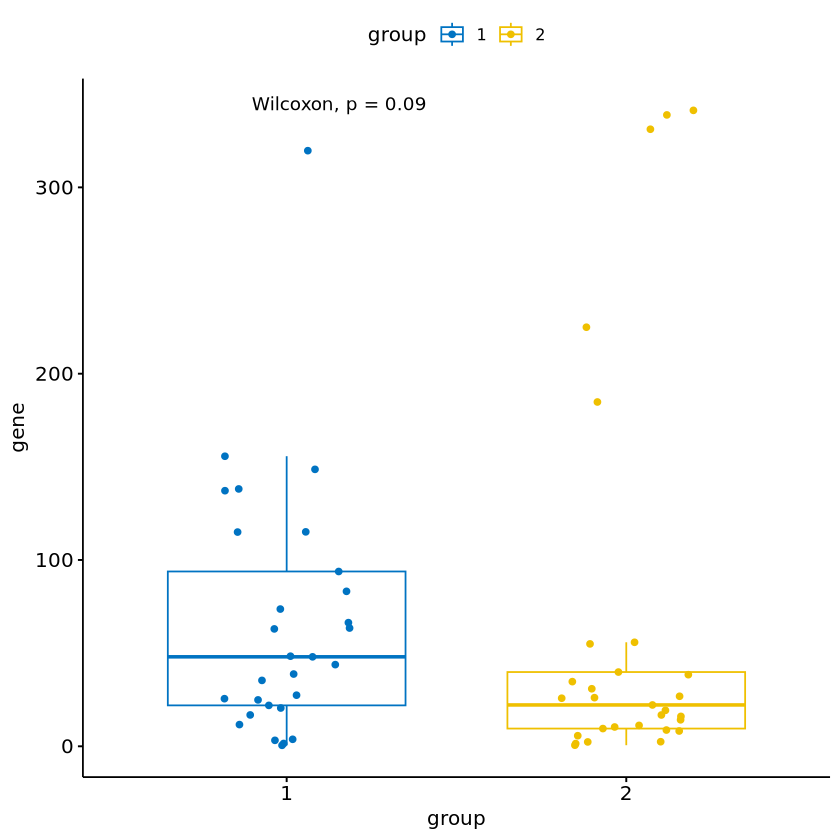

In [91]:
library(Biobase)
library(genefilter)
library(limma)
library(RColorBrewer)
library(GSVA)
library(pheatmap)

##########fib
sel_gmt=read.table("data/cell.type.LM22.3.Ths.2.fibendo.txt",header = T,na.strings = c(""),sep = "\t")
head(sel_gmt)
dim(sel_gmt)
sets=as.list(sel_gmt)
sets=lapply(sets, function(x) x[!is.na(x)])
#sets[1]
         
#########cal
exprMatrix=eset_f
#head(exprMatrix)
gsva_matrix<- gsva(as.matrix(exprMatrix), sets,method='ssgsea',kcdf='Gaussian',abs.ranking=TRUE)          
p<-pheatmap(gsva_matrix,scale="row",show_colnames=F, cluster_cols=T, cluster_rows=T,cex=1, clustering_distance_rows="euclidean", cex=1,clustering_distance_cols="euclidean", clustering_method="complete", border_color=FALSE,cutree_col = 2)
p   

#pdf("output/GSVA_heatmap.pdf",width=10,height=10)
#p
#dev.off()
            
score.gsva=as.data.frame(t(gsva_matrix))
head(score.gsva)
#colnames(score.gsva)
Macrophages=score.gsva[,c("Macrophages.M0.newman","Macrophages.M1.newman","Macrophages.M2.newman")] #"Macrophages.M0.newman","Macrophages.M1.newman"
head(Macrophages)
gsva_matrix=t(Macrophages)
p<-pheatmap(gsva_matrix,scale="row",show_colnames=T, cluster_cols=T, cluster_rows=T,cex=1, clustering_distance_rows="euclidean", cex=1,clustering_distance_cols="euclidean", clustering_method="complete", border_color=FALSE,cutree_col = 2)
#p

hist(Macrophages$`Macrophages.M2.newman`)

#cutoff=median(Macrophages[,"Macrophages.M1.newman"]/Macrophages[,"Macrophages.M2.newman"])
#cutoff
#a=Macrophages[Macrophages[,"Macrophages.M1.newman"]/Macrophages[,"Macrophages.M2.newman"]>cutoff,]
#b=Macrophages[Macrophages[,"Macrophages.M1.newman"]/Macrophages[,"Macrophages.M2.newman"]<=cutoff,]
#a$group="High M1*M2"
#b$group="Low M1*M2"
#Macrophages=rbind(a,b)


#based on M2 only
#cutoff=median(Macrophages[,"Macrophages.M2.newman"])
#cutoff
#a=Macrophages[Macrophages[,"Macrophages.M2.newman"]>cutoff,]
#b=Macrophages[Macrophages[,"Macrophages.M2.newman"]<=cutoff,]
#Macrophages=rbind(a,b)

#quanter
Q2=quantile(Macrophages[,"Macrophages.M2.newman"])[[2]]
Q3=quantile(Macrophages[,"Macrophages.M2.newman"])[[4]]
a=Macrophages[Macrophages[,"Macrophages.M2.newman"]>=Q3,]
b=Macrophages[Macrophages[,"Macrophages.M2.newman"]<=Q2,]
a$group="High M2"
b$group="Low M2"
Macrophages=rbind(a,b)

head(Macrophages)

#head(info)
gdat_mm=merge(as.data.frame(t(eset_f)),Macrophages,by="row.names")
gdat_mm=gdat_mm[,c("Row.names","group","SPP1")]   
gdat_mm$group=gsub("High M2","2",gdat_mm$group)
gdat_mm$group=gsub("Low M2","1",gdat_mm$group)
gdat_mm$group=as.numeric(gdat_mm$group)
colnames(gdat_mm)[3]="gene"
colnames(gdat_mm)[2]="group"
head(gdat_mm)

library(ggplot2)
library(ggpubr)

compare_means(group~gene, gdat_mm, method="wilcox.test", paired=FALSE)
p <- ggboxplot(gdat_mm, x="group",
               y = "gene", color = "group",
               palette = "jco", add = "jitter")
# 添加p值
p + stat_compare_means()


,ID,PFS,PFS_T,PFS_T_3Y
,<chr>,<int>,<dbl>,<dbl>
NPC0002PT00041T00041,NPC0002PT00041T00041,1,0.2658333,0.2658333
NPC0001PT00312T00312,NPC0001PT00312T00312,1,0.5008333,0.5008333
NPC0001PT00048T00048,NPC0001PT00048T00048,1,0.5283333,0.5283333
NPC0001PT00221T00221,NPC0001PT00221T00221,1,0.6241667,0.6241667
NPC0001PT00177T00177,NPC0001PT00177T00177,1,0.7008333,0.7008333
NPC0001PT00079T00079,NPC0001PT00079T00079,1,0.7091667,0.7091667


,Row.names,group,gene
,<I<chr>>,<dbl>,<dbl>
1,NPC0001PT00001T00001,1,22.619
2,NPC0001PT00004T00004,2,184.796
3,NPC0001PT00005T00005,1,19.298
4,NPC0001PT00012T00012,2,137.630
5,NPC0001PT00014T00014,2,62.997
6,NPC0001PT00020T00020,2,93.828


.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
group,22.619,184.796,1,1,1,ns,Wilcoxon
group,22.619,137.63,1,1,1,ns,Wilcoxon
group,22.619,62.997,1,1,1,ns,Wilcoxon
group,22.619,93.828,1,1,1,ns,Wilcoxon
group,22.619,35.01,1,1,1,ns,Wilcoxon
group,22.619,326.418,1,1,1,ns,Wilcoxon
group,22.619,83.174,1,1,1,ns,Wilcoxon
group,22.619,155.692,1,1,1,ns,Wilcoxon
group,22.619,48.345,1,1,1,ns,Wilcoxon


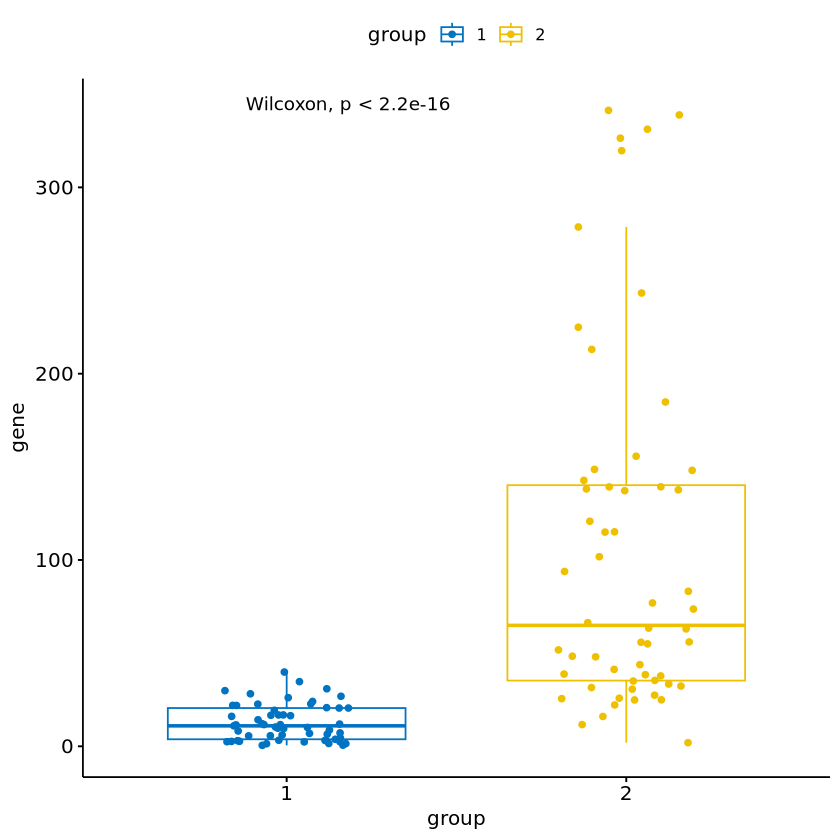

In [23]:
### with group
head(info)

#### with group 
gdat_mm=merge(as.data.frame(t(eset_f)),S_score,by="row.names")
gdat_mm=gdat_mm[,c("Row.names","group","SPP1")]   #OS_5Y
gdat_mm$group=gsub("High risk score","2",gdat_mm$group)
gdat_mm$group=gsub("Low risk score","1",gdat_mm$group)
gdat_mm$group=as.numeric(gdat_mm$group)

colnames(gdat_mm)[3]="gene"
colnames(gdat_mm)[2]="group"
head(gdat_mm)

library(ggplot2)
library(ggpubr)

compare_means(group~gene, gdat_mm, method="wilcox.test", paired=FALSE)
p <- ggboxplot(gdat_mm, x="group",
               y = "gene", color = "group",
               palette = "jco", add = "jitter")
# 添加p值
p + stat_compare_means()


#pdf("output/SPP1_relapse_plot.pdf")
#p + stat_compare_means()
#dev.off()

,Row.names,ID,PFS,PFS_T,PFS_T_3Y,score,group
,<I<chr>>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,NPC0001PT00004T00004,NPC0001PT00004T00004,0,1.758333,1.758333,116.17522,High risk score
2,NPC0001PT00005T00005,NPC0001PT00005T00005,0,4.602778,3.000000,18.49308,Low risk score
3,NPC0001PT00012T00012,NPC0001PT00012T00012,0,3.000000,3.000000,86.60843,High risk score
4,NPC0001PT00014T00014,NPC0001PT00014T00014,0,1.161111,1.161111,51.54955,High risk score
5,NPC0001PT00020T00020,NPC0001PT00020T00020,0,3.291667,3.000000,64.56274,High risk score
6,NPC0001PT00027T00027,NPC0001PT00027T00027,0,1.397222,1.397222,15.58624,Low risk score


Call:
coxph(formula = Surv(PFS_T_3Y, PFS) ~ group, data = dat_coxsvl)

                       coef exp(coef) se(coef)      z      p
groupLow risk score -1.0058    0.3658   0.5402 -1.862 0.0626

Likelihood ratio test=3.78  on 1 df, p=0.05172
n= 88, number of events= 16 

Call: survfit(formula = Surv(PFS_T_3Y, PFS) ~ group, data = dat_coxsvl)

                group=High risk score 
  time n.risk n.event survival std.err lower 95% CI upper 95% CI
 0.501     40       1    0.975  0.0247        0.928        1.000
 0.528     39       1    0.950  0.0345        0.885        1.000
 0.624     38       1    0.925  0.0416        0.847        1.000
 0.701     37       1    0.900  0.0474        0.812        0.998
 0.709     36       1    0.875  0.0523        0.778        0.984
 0.942     35       1    0.850  0.0565        0.746        0.968
 1.153     32       1    0.823  0.0606        0.713        0.951
 1.186     30       1    0.796  0.0645        0.679        0.933
 1.191     29       1    0.769  0.0679        0.646        0.914
 1.278     27       1    0.740  0.0711        0.613        0.893
 2.152     18       1    0.699  0.0781        0.561        0.870

                group=Low risk score 
  time n.risk n.event survival std.err lower 95% CI upper 95% CI
 0.2

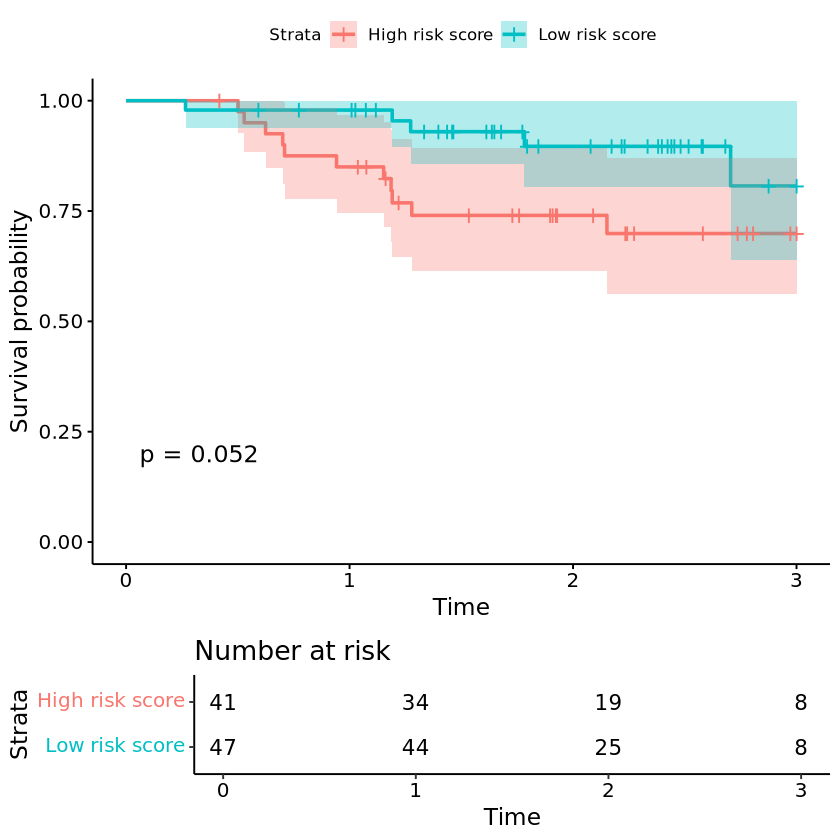

In [24]:
library(survival)
library(ggplot2)
library(ggpubr)
library(magrittr)
#install.packages("survminer")
library(survminer)
library(dplyr)

info<-as.data.frame(read.table("data/113ClinicalInfo.txt",header = TRUE,sep = "\t", dec = ".",na.strings = "NA",stringsAsFactors=FALSE,check.names = FALSE))
row.names(info)=info[,1]
dat_coxsvl=merge(info,S_score,by="row.names")
row.names(info)=dat_coxsvl[,1]
#dat_coxsvl=as.data.frame(dat_coxsvl[,-c(1,2,5)])
head(dat_coxsvl)

# How many samples of each type?
#table(dat_coxsvl$group)

# Tabulate by outcome
coxph(Surv(PFS_T_3Y, PFS)~group, data=dat_coxsvl)
sfit <- survfit(Surv(PFS_T_3Y, PFS)~group, data=dat_coxsvl)
summary(sfit)
ggsurvplot(sfit, conf.int=TRUE, pval=TRUE,risk.table = TRUE,legend.labs = c("High risk score", "Low risk score"))

#pdf("output/Model_PFS_SYS.pdf",width=10,height=10)
#ggsurvplot(sfit, conf.int=TRUE, pval=TRUE,risk.table = TRUE,legend.labs = c("High risk score", "Low risk score"))
#dev.off()

In [26]:
head(info)

,ID,PFS,PFS_T,PFS_T_3Y
,<chr>,<int>,<dbl>,<dbl>
NPC0001PT00004T00004,NPC0002PT00041T00041,1,0.2658333,0.2658333
NPC0001PT00005T00005,NPC0001PT00312T00312,1,0.5008333,0.5008333
NPC0001PT00012T00012,NPC0001PT00048T00048,1,0.5283333,0.5283333
NPC0001PT00014T00014,NPC0001PT00221T00221,1,0.6241667,0.6241667
NPC0001PT00020T00020,NPC0001PT00177T00177,1,0.7008333,0.7008333
NPC0001PT00027T00027,NPC0001PT00079T00079,1,0.7091667,0.7091667


[1] 10.351

[1] 63.449

[1]   113 24530

[1]    28 24530

[1]    28 24530

,ID,PFS,PFS_T,PFS_T_3Y,SPP1,group
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>
NPC0001PT00004T00004,NPC0002PT00041T00041,1,0.2658333,0.2658333,184.796,SPP1 TOP
NPC0001PT00012T00012,NPC0001PT00048T00048,1,0.5283333,0.5283333,137.630,SPP1 TOP
NPC0001PT00020T00020,NPC0001PT00177T00177,1,0.7008333,0.7008333,93.828,SPP1 TOP
NPC0001PT00029T00029,NPC0001PT00204T00204,1,0.9416667,0.9416667,2.419,SPP1 BOTTOM
NPC0001PT00046T00046,NPC0001PT00341T00341,1,1.1858333,1.1858333,326.418,SPP1 TOP
NPC0001PT00048T00048,NPC0002PT00013T00013,1,1.1908333,1.1908333,83.174,SPP1 TOP



SPP1 BOTTOM    SPP1 TOP 
         24          22 

,0,1,Sum
SPP1 BOTTOM,23,1,24
SPP1 TOP,15,7,22
Sum,38,8,46


Call:
coxph(formula = Surv(PFS_T_3Y, PFS) ~ group, data = dat_coxsvl)

               coef exp(coef) se(coef)     z      p
groupSPP1 TOP 2.229     9.292    1.070 2.083 0.0372

Likelihood ratio test=6.89  on 1 df, p=0.008657
n= 46, number of events= 8 

Call: survfit(formula = Surv(PFS_T_3Y, PFS) ~ group, data = dat_coxsvl)

                group=SPP1 BOTTOM 
        time       n.risk      n.event     survival      std.err lower 95% CI 
      0.9417      24.0000       1.0000       0.9583       0.0408       0.8816 
upper 95% CI 
      1.0000 

                group=SPP1 TOP 
  time n.risk n.event survival std.err lower 95% CI upper 95% CI
 0.266     22       1    0.955  0.0444        0.871        1.000
 0.528     21       1    0.909  0.0613        0.797        1.000
 0.701     20       1    0.864  0.0732        0.732        1.000
 1.186     16       1    0.810  0.0862        0.657        0.998
 1.191     15       1    0.756  0.0959        0.589        0.969
 1.278     14       1    0.702  0.1031        0.526        0.936
 2.705      6       1    0.585  0.1371        0.369        0.926


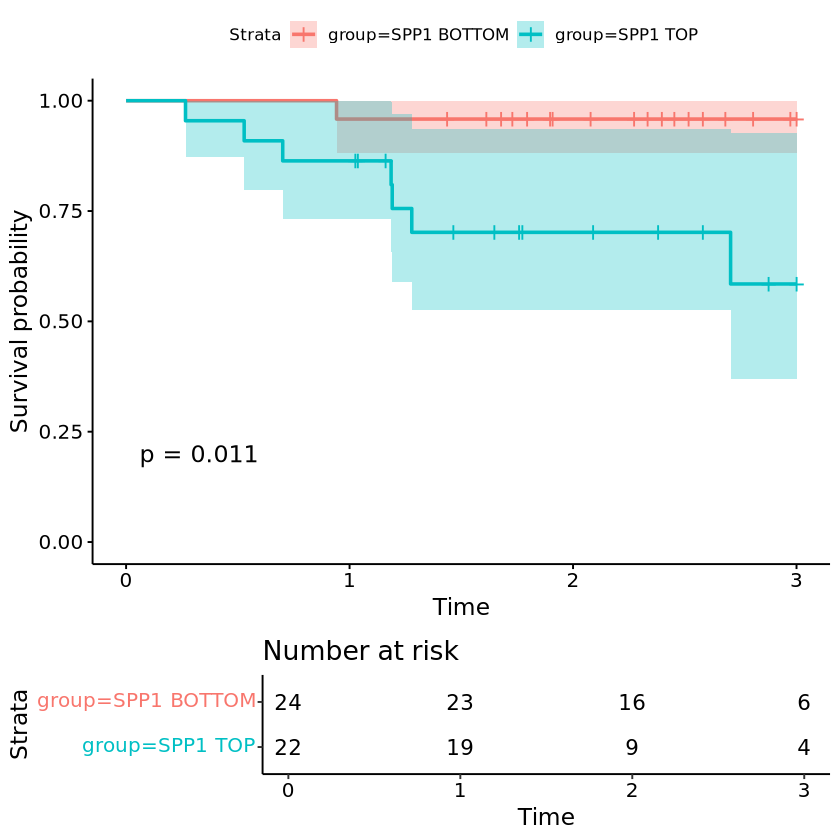

In [28]:
SPP1_exp=t(eset_f)
Q1=quantile(as.numeric(as.character(SPP1_exp[,"SPP1"])))[[2]]
Q3=quantile(as.numeric(as.character(SPP1_exp[,"SPP1"])))[[4]]
Q1
Q3

dim(SPP1_exp)
a=as.data.frame(SPP1_exp[SPP1_exp[,"SPP1"]<Q1,])
b=as.data.frame(SPP1_exp[SPP1_exp[,"SPP1"]>Q3,])
#head(a)
dim(a)
dim(b)

a$group="SPP1 BOTTOM"
b$group="SPP1 TOP"
SPP1_exp=rbind(a,b)
#head(SPP1_exp)

library(survival)
library(ggplot2)
library(ggpubr)
library(magrittr)
#install.packages("survminer")
library(survminer)
#library(dplyr)

##get survival info
dat_coxsvl=merge(info,SPP1_exp[,c("SPP1","group")],by="row.names")
row.names(dat_coxsvl)=dat_coxsvl[,1]
dat_coxsvl=as.data.frame(dat_coxsvl[,-1])
#colnames(dat_coxsvl)=c("OS_5Y","OST_5Y","PFS_3Y","PFS_T_3Y","SPP1","relapse","group")
head(dat_coxsvl)
# How many samples of each type?
table(dat_coxsvl$group)

# Tabulate by outcome
xtabs(~group+PFS, data=dat_coxsvl) %>% addmargins()
coxph(Surv(PFS_T_3Y, PFS)~group, data=dat_coxsvl)
sfit <- survfit(Surv(PFS_T_3Y, PFS)~group, data=dat_coxsvl)
summary(sfit)
ggsurvplot(sfit, conf.int=TRUE, pval=TRUE,risk.table = TRUE)
#ggsurvplot(sfit, conf.int=TRUE, pval=TRUE,risk.table=True,data=groupedclin)

#pdf(file="output/SPP1_Q1Q3_OS.pdf.pdf")
#ggsurvplot(sfit, conf.int=TRUE, pval=TRUE,risk.table = TRUE)
#dev.off()


## Validation in Nanostring samples

,08AH-003004,08AH-004804,08AH-005322,08AH-007577,08AH-008264,08AH-008646,08AH-014240,08AH-018317,08AH-018325,08AH-023300,⋯,09AH-013986,09AH-005889,09AH-018058,09AH-025691,10AH-001936,10AH-001973,10AH-002097,10AH-004337,10AH-007841,10AH-011218
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A2M,837.47,745.31,1050.84,1197.13,377.16,691.16,581.23,1033.82,531.80,386.91,⋯,269.63,862.68,512.87,403.06,1579.28,2260.17,1087.23,354.88,1110.08,844.23
ABCB1,101.95,42.27,177.71,89.44,30.03,113.07,268.78,220.08,180.27,92.93,⋯,121.48,87.15,77.99,85.61,239.66,115.13,123.34,20.14,112.28,64.22
ABL1,358.29,481.84,337.57,608.88,201.79,384.45,332.61,500.98,255.38,342.98,⋯,174.07,423.96,481.50,383.06,312.72,307.74,285.55,333.11,587.69,333.03
ADA,324.79,156.39,488.50,362.92,1573.49,688.34,335.97,283.79,153.23,564.31,⋯,1389.61,738.60,3553.61,251.21,447.22,390.59,407.55,405.50,299.42,233.07
ADORA2A,225.75,97.21,219.09,202.96,49.25,168.20,295.65,224.43,162.24,131.78,⋯,277.77,153.63,83.08,166.22,282.67,183.46,233.27,49.53,168.02,177.13
AICDA,10.20,7.04,147.69,10.32,8.41,31.10,92.39,14.48,21.03,6.76,⋯,8.15,13.29,5.93,5.62,79.20,9.68,46.25,5.99,18.32,30.04


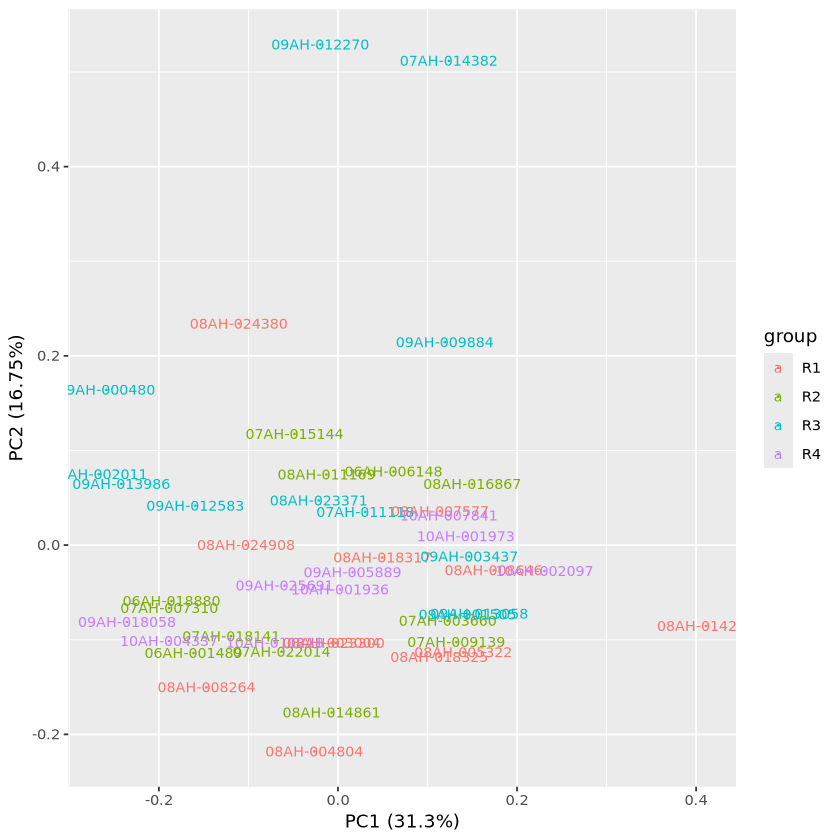

In [73]:
dat_nanos<-as.data.frame(read.table("data/nanostring_NormedGeneEXP.csv",header = TRUE,sep = ",",row.names=2,dec = ".",na.strings = "NA",stringsAsFactors=FALSE,check.names = FALSE))
#rownames(info)=info[,1]
dat_nanos=dat_nanos[,-1]
head(dat_nanos)
group_list=data.frame(name=colnames(dat_nanos),group=rep(c("R1","R2","R3","R4"),c(12,12,12,9)))
#head(group_list)

#check run effect
dat_pca=as.data.frame(merge(group_list,t(dat_nanos),by.x="name",by.y="row.names"))
row.names(dat_pca)=dat_pca[,1]
dat_pca=dat_pca[,-1]
#head(dat_pca)
#table(dat_pca[,1])
library(ggfortify)
# apply PCA - scale. = TRUE is highly advisable, but default is FALSE. rma data have done log2,so no scale here
out_pca <- prcomp(dat_pca[,-1])
#plot(out_pca,type="l")
autoplot(out_pca,data=dat_pca,colour='group',size=0.1,label=TRUE,label.size=3)

,ID,coef,08AH-003004,08AH-004804,08AH-005322,08AH-007577,08AH-008264,08AH-008646,08AH-014240,08AH-018317,⋯,09AH-013986,09AH-005889,09AH-018058,09AH-025691,10AH-001936,10AH-001973,10AH-002097,10AH-004337,10AH-007841,10AH-011218
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,IL18BP,-0.5283059,289.84,457.89,544.49,350.88,276.26,380.21,374.61,338.81,⋯,277.77,403.27,175.48,321.82,521.65,453.54,355.26,268.88,482.57,340.28
2,PALMD,0.9354494,59.72,66.22,69.79,263.16,28.83,106.01,117.59,194.02,⋯,145.92,84.20,86.47,97.48,119.49,65.64,61.00,155.12,82.82,33.15
3,SOCS6,0.9771139,284.01,501.57,325.39,376.68,260.65,359.01,241.90,428.58,⋯,324.44,304.30,316.20,387.43,246.49,278.69,248.68,354.34,332.07,436.10
4,SPP1,0.5579107,145.65,951.01,60.86,2758.89,2015.51,1062.89,167.98,128.86,⋯,473.33,867.11,382.32,2280.24,506.63,369.07,1116.73,3345.23,55.74,167.29
5,WDR35,2.8144753,99.04,321.23,122.53,146.20,87.68,127.21,105.83,178.09,⋯,180.00,62.04,110.20,97.48,167.28,111.91,115.29,52.80,90.78,180.24


[1]  5 45

[1] 34.11154


High risk score  Low risk score 
             22              22 

,score,group
,<dbl>,<chr>
08AH-004804,38.71113,High risk score
08AH-007577,38.03343,High risk score
08AH-008646,35.34476,High risk score
08AH-018317,36.16582,High risk score
08AH-023300,35.46677,High risk score
08AH-024380,36.07030,High risk score


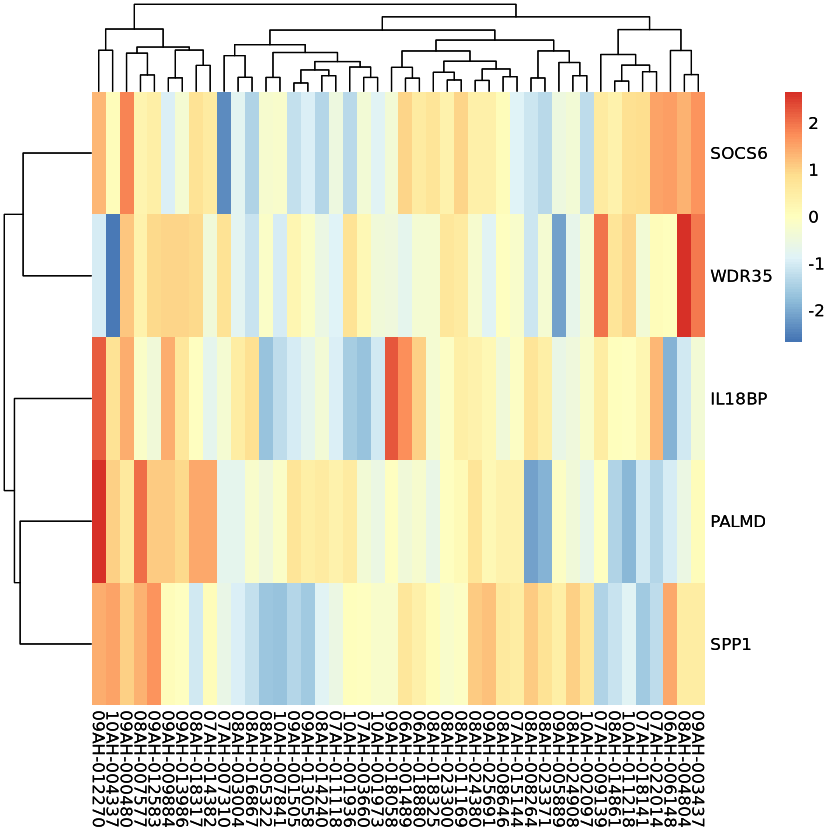

In [74]:
#with training set model
signature<-as.data.frame(read.table("output/cox_lasso_coef.txt",header =FALSE,sep = "\t", dec = ".",na.strings = "NA",stringsAsFactors=FALSE,check.names = FALSE))
colnames(signature)=c("ID","coef")
#head(signature)

####################
# random forest
#signature=as.data.frame(vs.pbc$varselect)
#colnames(signature)=c("ID","coef")
#signature$ID=row.names(as.data.frame(vs.pbc$varselect))
#head(signature)

signature=merge(signature,dat_nanos,x.all=TRUE,by.x="ID",by.y="row.names")
head(signature)


row.names(signature)=signature[,1]
signature=signature[,-1]
#head(signature)

#log 2 processed to ensure similar scale of trainingset(RMA processed) and nanostring set.
#signature=sweep(data.matrix(signature[,-1]),1,signature$coef, FUN = "*")   #-1 remove coef; log(signature[,-1],2)
signature=sweep(data.matrix(log(signature[,-1],2)),1,signature$coef, FUN = "*")
#signature
dim(signature)
signature=signature[,!colnames(signature) %in% c("07AH-002011")]   #OUTLINEAR

#heatmap plot
library(ComplexHeatmap)
library(pheatmap)
p<-pheatmap(signature,scale="row",show_rownames=T, cluster_cols=T, cluster_rows=T,cex=1, clustering_distance_rows="euclidean", cex=1,clustering_distance_cols="euclidean", clustering_method="complete", border_color=FALSE)
p


S_score<-as.data.frame(apply(signature,2,sum))
S_score$ID=row.names(S_score)
colnames(S_score)[1]="score"
cutoff=median(S_score[,1])
cutoff
a=S_score[S_score[, "score"]>cutoff,]
b=S_score[S_score[, "score"]<=cutoff,]
a$group="High risk score"
b$group="Low risk score"
S_score=rbind(a,b)
S_score=S_score[,-2]  #"ID" column
table(S_score$group)
head(S_score)

,Macrophages.M0.newman,Macrophages.M1.newman,Macrophages.M2.newman
,<dbl>,<dbl>,<dbl>
08AH-003004,-0.10960146,0.1477237,-0.1268273
08AH-004804,-0.06796819,0.1178639,-0.1124440
08AH-005322,-0.09844549,0.1654772,-0.1092295
08AH-007577,-0.20296521,0.1817510,-0.1034025
08AH-008264,-0.07762357,0.1210499,-0.1781314
08AH-008646,-0.11031416,0.1091394,-0.1375908


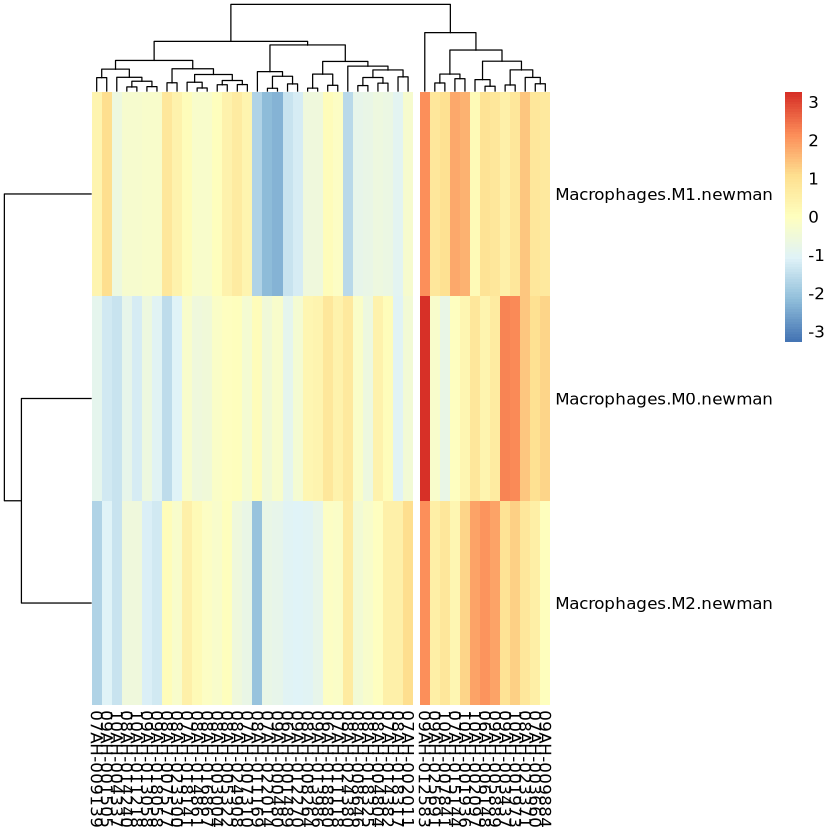

,Macrophages.M0.newman,Macrophages.M1.newman,Macrophages.M2.newman,group
,<dbl>,<dbl>,<dbl>,<chr>
08AH-024380,-4.612428e-02,0.07736136,-0.06764193,High M2
06AH-006148,-7.339046e-02,0.18631654,0.02169846,High M2
07AH-003660,-2.789279e-02,0.18058424,-0.07328659,High M2
07AH-002011,-1.252032e-01,0.13464058,-0.04094839,High M2
08AH-023371,1.466975e-05,0.20709295,-0.05583379,High M2
09AH-003437,5.830318e-02,0.16650483,-0.05030606,High M2


,Row.names,group,gene
,<I<chr>>,<dbl>,<dbl>
1,06AH-001489,1,1127.11
2,06AH-006148,2,3082.82
3,07AH-002011,2,3134.14
4,07AH-003660,2,451.55
5,07AH-007310,1,220.77
6,07AH-009139,1,80.03


.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
group,1127.11,3082.82,1,1,1,ns,Wilcoxon
group,1127.11,3134.14,1,1,1,ns,Wilcoxon
group,1127.11,451.55,1,1,1,ns,Wilcoxon
group,1127.11,1274.87,1,1,1,ns,Wilcoxon
group,1127.11,1944.09,1,1,1,ns,Wilcoxon
group,1127.11,910.02,1,1,1,ns,Wilcoxon
group,1127.11,867.11,1,1,1,ns,Wilcoxon
group,1127.11,4171.18,1,1,1,ns,Wilcoxon
group,1127.11,506.63,1,1,1,ns,Wilcoxon


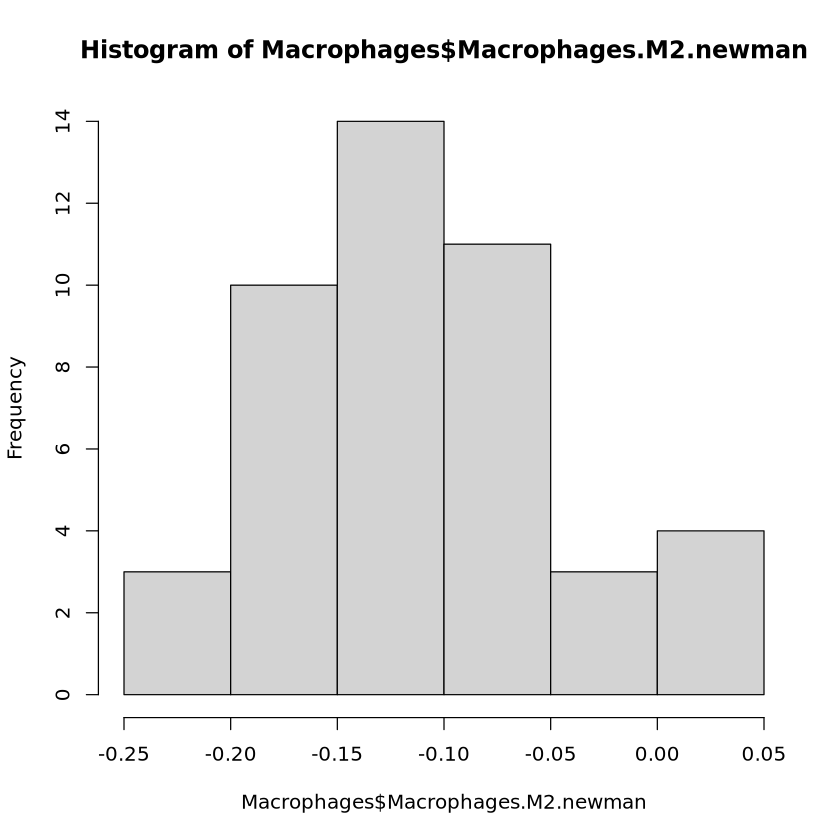

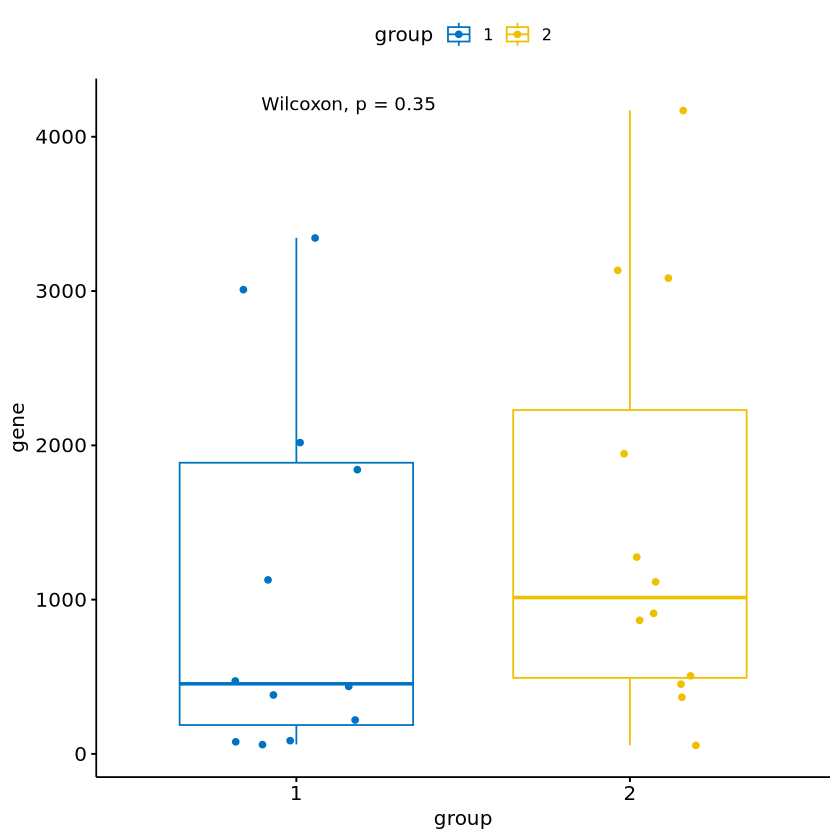

In [88]:
library(Biobase)
library(genefilter)
library(limma)
library(RColorBrewer)
library(GSVA)
library(pheatmap)

##########fib
sel_gmt=read.table("data/cell.type.LM22.3.Ths.2.fibendo.txt",header = T,na.strings = c(""),sep = "\t")
head(sel_gmt)
dim(sel_gmt)
sets=as.list(sel_gmt)
sets=lapply(sets, function(x) x[!is.na(x)])
#sets[1]
         
#########cal
exprMatrix=dat_nanos
#head(exprMatrix)
gsva_matrix<- gsva(as.matrix(exprMatrix), sets,method='ssgsea',kcdf='Gaussian',abs.ranking=TRUE)          
p<-pheatmap(gsva_matrix,scale="row",show_colnames=F, cluster_cols=T, cluster_rows=T,cex=1, clustering_distance_rows="euclidean", cex=1,clustering_distance_cols="euclidean", clustering_method="complete", border_color=FALSE,cutree_col = 2)
p   

#pdf("output/GSVA_heatmap.pdf",width=10,height=10)
#p
#dev.off()
            
score.gsva=as.data.frame(t(gsva_matrix))
head(score.gsva)
#colnames(score.gsva)
Macrophages=score.gsva[,c("Macrophages.M0.newman","Macrophages.M1.newman","Macrophages.M2.newman")] #"Macrophages.M0.newman","Macrophages.M1.newman"
head(Macrophages)
gsva_matrix=t(Macrophages)
p<-pheatmap(gsva_matrix,scale="row",show_colnames=T, cluster_cols=T, cluster_rows=T,cex=1, clustering_distance_rows="euclidean", cex=1,clustering_distance_cols="euclidean", clustering_method="complete", border_color=FALSE,cutree_col = 2)
#p

hist(Macrophages$`Macrophages.M2.newman`)

#cutoff=median(Macrophages[,"Macrophages.M1.newman"]/Macrophages[,"Macrophages.M2.newman"])
#cutoff
#a=Macrophages[Macrophages[,"Macrophages.M1.newman"]/Macrophages[,"Macrophages.M2.newman"]>cutoff,]
#b=Macrophages[Macrophages[,"Macrophages.M1.newman"]/Macrophages[,"Macrophages.M2.newman"]<=cutoff,]
#a$group="High M1*M2"
#b$group="Low M1*M2"
#Macrophages=rbind(a,b)


#based on M2 only
#cutoff=median(Macrophages[,"Macrophages.M2.newman"])
#cutoff
#a=Macrophages[Macrophages[,"Macrophages.M2.newman"]>cutoff,]
#b=Macrophages[Macrophages[,"Macrophages.M2.newman"]<=cutoff,]
#Macrophages=rbind(a,b)

#quanter
Q2=quantile(Macrophages[,"Macrophages.M2.newman"])[[2]]
Q3=quantile(Macrophages[,"Macrophages.M2.newman"])[[4]]
a=Macrophages[Macrophages[,"Macrophages.M2.newman"]>=Q3,]
b=Macrophages[Macrophages[,"Macrophages.M2.newman"]<=Q2,]
a$group="High M2"
b$group="Low M2"
Macrophages=rbind(a,b)

head(Macrophages)

#head(info)
gdat_mm=merge(as.data.frame(t(dat_nanos)),Macrophages,by="row.names")
gdat_mm=gdat_mm[,c("Row.names","group","SPP1")]   
gdat_mm$group=gsub("High M2","2",gdat_mm$group)
gdat_mm$group=gsub("Low M2","1",gdat_mm$group)
gdat_mm$group=as.numeric(gdat_mm$group)
colnames(gdat_mm)[3]="gene"
colnames(gdat_mm)[2]="group"
head(gdat_mm)

library(ggplot2)
library(ggpubr)

compare_means(group~gene, gdat_mm, method="wilcox.test", paired=FALSE)
p <- ggboxplot(gdat_mm, x="group",
               y = "gene", color = "group",
               palette = "jco", add = "jitter")
# 添加p值
p + stat_compare_means()


,Row.names,group,gene
,<I<chr>>,<dbl>,<dbl>
1,06AH-001489,2,1127.11
2,06AH-006148,2,3082.82
3,06AH-018880,2,785.02
4,07AH-003660,1,451.55
5,07AH-007310,1,220.77
6,07AH-009139,2,80.03


.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
group,1127.11,451.55,1,1,1,ns,Wilcoxon
group,1127.11,220.77,1,1,1,ns,Wilcoxon
group,1127.11,228.34,1,1,1,ns,Wilcoxon
group,1127.11,62.84,1,1,1,ns,Wilcoxon
group,1127.11,93.03,1,1,1,ns,Wilcoxon
group,1127.11,145.65,1,1,1,ns,Wilcoxon
group,1127.11,60.86,1,1,1,ns,Wilcoxon
group,1127.11,2015.51,1,1,1,ns,Wilcoxon
group,1127.11,167.98,1,1,1,ns,Wilcoxon


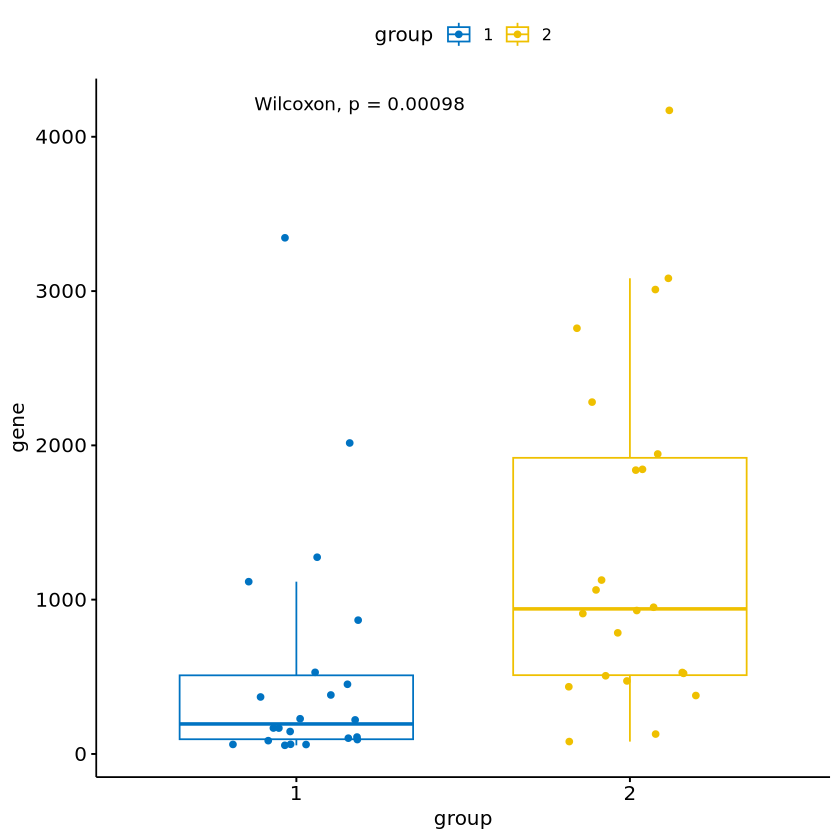

In [87]:
### with group
#head(info)

#### with group 
gdat_mm=merge(as.data.frame(t(dat_nanos)),S_score,by="row.names")
gdat_mm=gdat_mm[,c("Row.names","group","SPP1")]   #OS_5Y
gdat_mm$group=gsub("High risk score","2",gdat_mm$group)
gdat_mm$group=gsub("Low risk score","1",gdat_mm$group)
gdat_mm$group=as.numeric(gdat_mm$group)

colnames(gdat_mm)[3]="gene"
colnames(gdat_mm)[2]="group"
head(gdat_mm)

library(ggplot2)
library(ggpubr)

compare_means(group~gene, gdat_mm, method="wilcox.test", paired=FALSE)
p <- ggboxplot(gdat_mm, x="group",
               y = "gene", color = "group",
               palette = "jco", add = "jitter")
# 添加p值
p + stat_compare_means()


#pdf("output/SPP1_relapse_plot.pdf")
#p + stat_compare_means()
#dev.off()

[1] "QEH_Bx"                        "Recurrence"                   
 [3] "Death"                         "PFS"                          
 [5] "PFS_T"                         "PFS_3Y"                       
 [7] "PFS_T_3Y"                      "OS"                           
 [9] "OST"                           "OS_5Y"                        
[11] "OST_5Y"                        "T_stage"                      
[13] "N_stage"                       "AJCC_Stage"                   
[15] "Chemo"                         "RT_Technique"                 
[17] "Tx_Regime"                     "LDH"                          
[19] "Age"                           "Gender"                       
[21] "ecog"                          "Remarks"                      
[23] "WHO_pathological_type"         "to_identify_type_of_WHO_patho"
[25] "date"                          "Neutrophil"                   
[27] "Lymphocyte"                    "date_of_blood_test"           
[29] "Neutrophil_Lymphocyte_ratio"   "score"                        
[31] "group"

,0,1,Sum
High risk score,16,6,22
Low risk score,20,2,22
Sum,36,8,44


Call:
coxph(formula = Surv(PFS_T_3Y, PFS_3Y) ~ group, data = dat_coxsvl)

                       coef exp(coef) se(coef)      z     p
groupLow risk score -1.2545    0.2852   0.8171 -1.535 0.125

Likelihood ratio test=2.76  on 1 df, p=0.09667
n= 44, number of events= 8 

Call: survfit(formula = Surv(PFS_T_3Y, PFS_3Y) ~ group, data = dat_coxsvl)

                group=High risk score 
  time n.risk n.event survival std.err lower 95% CI upper 95% CI
 0.474     22       1    0.955  0.0444        0.871        1.000
 0.879     21       1    0.909  0.0613        0.797        1.000
 1.074     20       1    0.864  0.0732        0.732        1.000
 1.463     19       1    0.818  0.0822        0.672        0.996
 1.479     18       1    0.773  0.0893        0.616        0.969
 1.912     17       1    0.727  0.0950        0.563        0.939

                group=Low risk score 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
 1.76     22       1    0.955  0.0444        0.871            1
 2.63     21       1    0.909  0.0613        0.797            1


,0,1,Sum
High risk score,16,6,22
Low risk score,22,0,22
Sum,38,6,44


Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”


Call:
coxph(formula = Surv(OST_5Y, OS_5Y) ~ group, data = dat_coxsvl)

                          coef  exp(coef)   se(coef)      z     p
groupLow risk score -2.034e+01  1.469e-09  9.991e+03 -0.002 0.998

Likelihood ratio test=9.1  on 1 df, p=0.002557
n= 44, number of events= 6 

[1] 0.9545455 0.9090909 0.8636364 0.8181818 0.7727273 0.7272727 0.7272727
[8] 1.0000000

Call: survfit(formula = Surv(OST_5Y, OS_5Y) ~ group, data = dat_coxsvl)

                group=High risk score 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
 1.26     22       1    0.955  0.0444        0.871        1.000
 1.70     21       1    0.909  0.0613        0.797        1.000
 2.26     20       1    0.864  0.0732        0.732        1.000
 2.29     19       1    0.818  0.0822        0.672        0.996
 2.58     18       1    0.773  0.0893        0.616        0.969
 4.93     17       1    0.727  0.0950        0.563        0.939

                group=Low risk score 
     time n.risk n.event survival std.err lower 95% CI upper 95% CI


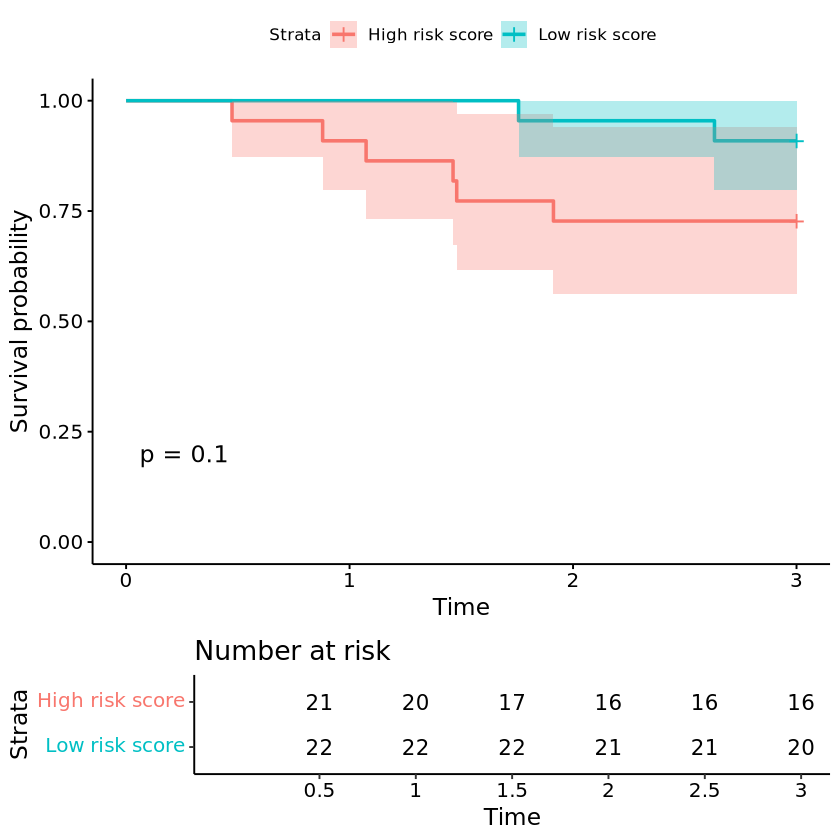

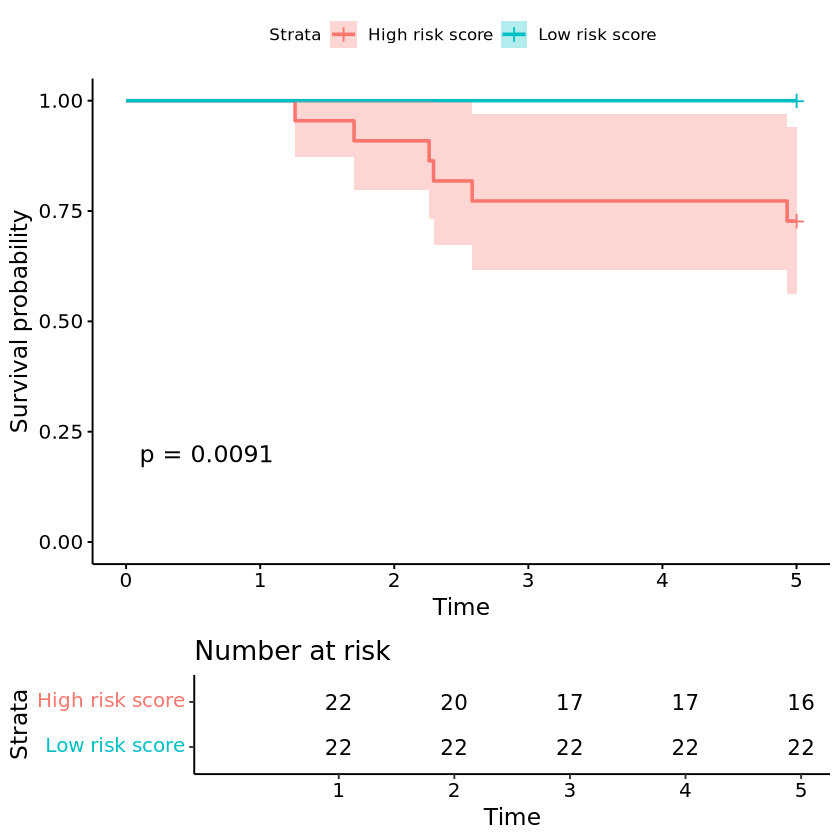

In [53]:
library(survival)
library(ggplot2)
library(ggpubr)
library(magrittr)
#install.packages("survminer")
library(survminer)
library(dplyr)

info<-as.data.frame(read.table("data/HKU_QEH_Nanostring_anno.csv",header = TRUE,sep = ",", dec = ".",na.strings = "NA",stringsAsFactors=FALSE,check.names = FALSE))
row.names(info)=info[,1]

#3-year os AND 5-year PFS
#info<-as.data.frame(read.table("data/QEH.tmp",header = TRUE,sep = "\t", dec = ".",na.strings = "NA",stringsAsFactors=FALSE,check.names = FALSE))
#rownames(info)=info[,1]
#info=info[,-1]
#head(info)

dat_coxsvl=merge(info,S_score,by="row.names")
#row.names(info)=dat_coxsvl[,1]
dat_coxsvl=as.data.frame(dat_coxsvl[,-1])
#head(dat_coxsvl)
colnames(dat_coxsvl)
#write.table(dat_coxsvl, file = "output/NPC0501_batch2_nanostring_grouped_anno.txt", append = FALSE, quote = FALSE, sep = "\t",row.names = TRUE,col.names = TRUE)
                       

# How many samples of each type?
#table(dat_coxsvl$group)
                       
                       
# Tabulate by outcome
#head(dat_coxsvl)
xtabs(~group+PFS_3Y, data=dat_coxsvl) %>% addmargins()
coxph(Surv(PFS_T_3Y, PFS_3Y)~group, data=dat_coxsvl)
sfit <- survfit(Surv(PFS_T_3Y, PFS_3Y)~group, data=dat_coxsvl)
summary(sfit)
#sfit$surv
ggsurvplot(sfit, conf.int=TRUE, pval=TRUE,risk.table = TRUE,legend.labs = c("High risk score", "Low risk score"))


# Tabulate by outcome - OS
xtabs(~group+OS_5Y, data=dat_coxsvl) %>% addmargins()
coxph(Surv(OST_5Y, OS_5Y)~group, data=dat_coxsvl)
sfit <- survfit(Surv(OST_5Y, OS_5Y)~group, data=dat_coxsvl)
sfit$surv
summary(sfit)
ggsurvplot(sfit, conf.int=TRUE, pval=TRUE,risk.table = TRUE,legend.labs = c("High risk score", "Low risk score"))

#pdf("output/Model_OS_QEH.pdf",width=10,height=10)
#ggsurvplot(sfit, conf.int=TRUE, pval=TRUE,risk.table = TRUE,legend.labs = c("High risk score", "Low risk score"))
#dev.off()

In [34]:
#Univariant analyses

info<-as.data.frame(read.table("data/HKU_QEH_Nanostring_anno.csv",header = TRUE,sep = ",", dec = ".",na.strings = "NA",stringsAsFactors=FALSE,check.names = FALSE))
row.names(info)=info[,1]
dat_coxsvl=merge(info,S_score,by="row.names")
#row.names(info)=dat_coxsvl[,1]
dat_coxsvl=as.data.frame(dat_coxsvl[,-1])
#head(dat_coxsvl)
colnames(dat_coxsvl)

#convert AJCC stage to numeric
a=subset(dat_coxsvl,AJCC_Stage=="III")
a$Stage=as.numeric("3")
b=subset(dat_coxsvl,AJCC_Stage=="IV")
b$Stage=as.numeric("4")
dat_coxsvl=rbind(a,b)
a=subset(dat_coxsvl,RT_Technique!="IMRT")
a$RT_Technique_group="non-IMRT"
b=subset(dat_coxsvl,RT_Technique=="IMRT")
b$RT_Technique_group="IMRT"
dat_coxsvl=rbind(a,b)

#univariant Cox HR regression analysis
covariates <- c("Age","Gender","LDH","Stage","group","score","Neutrophil_Lymphocyte_ratio","RT_Technique_group")
#head(dat_coxsvl[,covariates])
univ_formulas <-sapply(covariates,function(x) as.formula(paste('Surv(OST_5Y, OS_5Y)~', x)))
#univ_formulas
univ_models <- lapply(univ_formulas, function(x){coxph(x, data = dat_coxsvl)})
univ_results <- lapply(univ_models,
                       function(x){ 
                          x <- summary(x)
                          p.value<-signif(x$wald["pvalue"], digits=2)
                          wald.test<-signif(x$wald["test"], digits=2)
                          beta<-signif(x$coef[1], digits=2);#coeficient beta
                          HR <-signif(x$coef[2], digits=2);#exp(beta)
                          HR.confint.lower <- signif(x$conf.int[,"lower .95"],2)
                          HR.confint.upper <- signif(x$conf.int[,"upper .95"],2)
                          HR <- paste0(HR, " (", 
                                       HR.confint.lower, "-", HR.confint.upper, ")")
                          res<-c(beta, HR, wald.test, p.value)
                          return(res)
                          #return(exp(cbind(coef(x),confint(x))))
                         })
res <- t(as.data.frame(univ_results, check.names = FALSE)[1:4,])
colnames(res)<-c("beta", "HR (95% CI for HR)","wald.test", "p.value")
as.data.frame(res)
                       
#multivariant Cox HR regression analysis
#head(dat_coxsvl)
res.cox <- coxph(Surv(OST_5Y, OS_5Y) ~  Age + Gender + LDH +Stage + group, data =  dat_coxsvl)
res.cox

survminer::ggforest(res.cox, data = dat_coxsvl)
#pdf(file="output/NPC0501_QEH_MVA.pdf")
#survminer::ggforest(res.cox, data = dat_coxsvl)
#dev.off()


[1] "QEH_Bx"                        "Recurrence"                   
 [3] "Death"                         "PFS"                          
 [5] "PFS_T"                         "PFS_3Y"                       
 [7] "PFS_T_3Y"                      "OS"                           
 [9] "OST"                           "OS_5Y"                        
[11] "OST_5Y"                        "T_stage"                      
[13] "N_stage"                       "AJCC_Stage"                   
[15] "Chemo"                         "RT_Technique"                 
[17] "Tx_Regime"                     "LDH"                          
[19] "Age"                           "Gender"                       
[21] "ecog"                          "Remarks"                      
[23] "WHO_pathological_type"         "to_identify_type_of_WHO_patho"
[25] "date"                          "Neutrophil"                   
[27] "Lymphocyte"                    "date_of_blood_test"           
[29] "Neutrophil_Lymphocyte_ratio"   "score"                        
[31] "group"

Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1 ; coefficient may be infinite. ”


,beta,HR (95% CI for HR),wald.test,p.value
,<chr>,<chr>,<chr>,<chr>
Age,0.027,1 (0.95-1.1),0.4,0.53
Gender,-0.87,0.42 (0.084-2.1),1.1,0.28
LDH,0.0045,1 (1-1),2.2,0.14
Stage,2.3,9.5 (1.1-82),4.2,0.04
group,-20,1.6e-09 (0-Inf),0,1
score,0.26,1.3 (0.89-1.9),1.8,0.18
Neutrophil_Lymphocyte_ratio,0.083,1.1 (0.95-1.2),1.4,0.23
RT_Technique_group,1.3,3.6 (0.66-20),2.2,0.14


Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  5 ; coefficient may be infinite. ”


Call:
coxph(formula = Surv(OST_5Y, OS_5Y) ~ Age + Gender + LDH + Stage + 
    group, data = dat_coxsvl)

                          coef  exp(coef)   se(coef)      z      p
Age                 -1.757e-02  9.826e-01  3.902e-02 -0.450 0.6525
GenderM             -2.759e+00  6.335e-02  1.280e+00 -2.155 0.0311
LDH                  1.852e-03  1.002e+00  4.372e-03  0.424 0.6719
Stage                3.443e+00  3.129e+01  1.393e+00  2.472 0.0134
groupLow risk score -2.283e+01  1.218e-10  1.419e+04 -0.002 0.9987

Likelihood ratio test=22.42  on 5 df, p=0.0004348
n= 42, number of events= 6 

ERROR: Error in axisTicks(rangeb/2, log = TRUE, nint = 7): log - axis(), 'at' creation, _LARGE_ range: invalid {xy}axp or par; nint=7
	 axp[0:1]=(1e-307,1e+308), usr[0:1]=(0,inf); i=615, ni=87


[1] 167.29

[1] 1274.87

[1]  45 790

[1]  11 790

[1]  11 790

,A2M,ABCB1,ABL1,ADA,ADORA2A,AICDA,AIRE,AKT3,ALCAM,AMBP,⋯,TLK2,TMUB2,TRIM39,TUBB,USP39,ZC3H14,ZKSCAN5,ZNF143,ZNF346,group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
08AH-003004,837.47,101.95,358.29,324.79,225.75,10.20,65.54,652.50,152.93,16.02,⋯,661.24,215.56,81.56,2256.07,65.54,627.74,81.56,148.56,321.88,SPP1 BOTTOM
08AH-005322,1050.84,177.71,337.57,488.50,219.09,147.69,137.95,692.17,268.59,18.66,⋯,632.12,197.18,116.04,2171.46,89.26,453.60,99.00,209.36,352.17,SPP1 BOTTOM
08AH-018317,1033.82,220.08,500.98,283.79,224.43,14.48,53.57,596.54,359.08,18.82,⋯,666.04,202.71,97.01,1599.95,83.98,514.01,91.22,192.57,321.44,SPP1 BOTTOM
07AH-009139,681.55,225.78,278.01,317.61,381.64,9.27,53.08,1492.00,225.78,16.01,⋯,557.71,190.40,128.05,1305.82,87.62,530.75,87.62,160.07,427.97,SPP1 BOTTOM
07AH-018141,650.57,85.02,584.03,355.78,137.69,14.79,40.66,302.18,237.49,21.25,⋯,634.86,154.33,83.17,2499.70,109.97,461.13,103.50,169.11,380.73,SPP1 BOTTOM
07AH-022014,570.25,121.44,285.48,952.31,148.42,26.28,39.06,380.64,855.73,16.33,⋯,796.07,234.35,82.38,2138.96,103.68,323.83,66.04,172.57,205.94,SPP1 BOTTOM


,QEH_Bx,Recurrence,Death,PFS,PFS_T,PFS_3Y,PFS_T_3Y,OS,OST,OS_5Y,⋯,Remarks,WHO_pathological_type,to_identify_type_of_WHO_patho,date,Neutrophil,Lymphocyte,date_of_blood_test,Neutrophil_Lymphocyte_ratio,SPP1,group
,<chr>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,⋯,<chr>,<int>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>
06AH-006148,06AH-006148,1,1,1,1.912300,1,1.912300,1,2.5808,1,⋯,0,3,biospy,39420,5.9,0.5,39486,11.8000000,3082.82,SPP1 TOP
07AH-002011,07AH-002011,1,1,1,5.136986,0,3.000000,1,13.3500,0,⋯,0,3,biospy,39109,4.7,1.7,39120,2.7647059,3134.14,SPP1 TOP
07AH-009139,07AH-009139,1,1,1,1.479452,1,1.479452,1,4.9300,1,⋯,0,3,biospy,39212,4.4,1.7,39225,2.5882353,80.03,SPP1 BOTTOM
07AH-018141,07AH-018141,0,0,0,13.024658,0,3.000000,0,13.0200,0,⋯,0,3,biospy,39331,6.7,1.7,39350,3.9411765,62.84,SPP1 BOTTOM
07AH-022014,07AH-022014,0,0,0,12.145205,0,3.000000,0,12.1500,0,⋯,0,3,biospy,39385,2.4,2.6,39419,0.9230769,93.03,SPP1 BOTTOM
08AH-003004,08AH-003004,0,0,0,12.545205,0,3.000000,0,12.5500,0,⋯,?,3,biospy,39490,2.7,2.2,39504,1.2272727,145.65,SPP1 BOTTOM



SPP1 BOTTOM    SPP1 TOP 
         11          11 

,0,1,Sum
SPP1 BOTTOM,8,3,11
SPP1 TOP,5,6,11
Sum,13,9,22


Call:
coxph(formula = Surv(PFS_T, PFS) ~ group, data = dat_coxsvl)

                coef exp(coef) se(coef)     z      p
groupSPP1 TOP 1.2630    3.5359   0.7393 1.708 0.0876

Likelihood ratio test=3.17  on 1 df, p=0.07521
n= 22, number of events= 9 

Call: survfit(formula = Surv(PFS_T, PFS) ~ group, data = dat_coxsvl)

                group=SPP1 BOTTOM 
  time n.risk n.event survival std.err lower 95% CI upper 95% CI
  1.48     11       1    0.909  0.0867        0.754            1
  9.92      8       1    0.795  0.1306        0.577            1
 11.52      6       1    0.663  0.1628        0.410            1

                group=SPP1 TOP 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
 1.07     11       1    0.909  0.0867        0.754        1.000
 1.46     10       1    0.818  0.1163        0.619        1.000
 1.91      9       1    0.727  0.1343        0.506        1.000
 3.51      8       1    0.636  0.1450        0.407        0.995
 5.14      7       1    0.545  0.1501        0.318        0.936
 5.86      5       1    0.436  0.1547        0.218        0.874


,0,1,Sum
SPP1 BOTTOM,7,4,11
SPP1 TOP,3,8,11
Sum,10,12,22


Call:
coxph(formula = Surv(OST, OS) ~ group, data = dat_coxsvl)

                coef exp(coef) se(coef)     z      p
groupSPP1 TOP 1.0562    2.8753   0.6409 1.648 0.0994

Likelihood ratio test=2.86  on 1 df, p=0.09081
n= 22, number of events= 12 

Call: survfit(formula = Surv(OST, OS) ~ group, data = dat_coxsvl)

                group=SPP1 BOTTOM 
  time n.risk n.event survival std.err lower 95% CI upper 95% CI
  4.93     11       1    0.909  0.0867        0.754        1.000
  5.33     10       1    0.818  0.1163        0.619        1.000
  8.62      9       1    0.727  0.1343        0.506        1.000
 10.93      8       1    0.636  0.1450        0.407        0.995

                group=SPP1 TOP 
  time n.risk n.event survival std.err lower 95% CI upper 95% CI
  1.70     11       1    0.909  0.0867        0.754        1.000
  2.26     10       1    0.818  0.1163        0.619        1.000
  2.58      9       1    0.727  0.1343        0.506        1.000
  5.75      8       1    0.636  0.1450        0.407        0.995
  6.35      6       1    0.530  0.1549        0.299        0.940
  7.54      5       1    0.424  0.1560        0.206        0.872
  8.09      4       1    0.318  0.1488        0.127        0.796
 13.35      1       

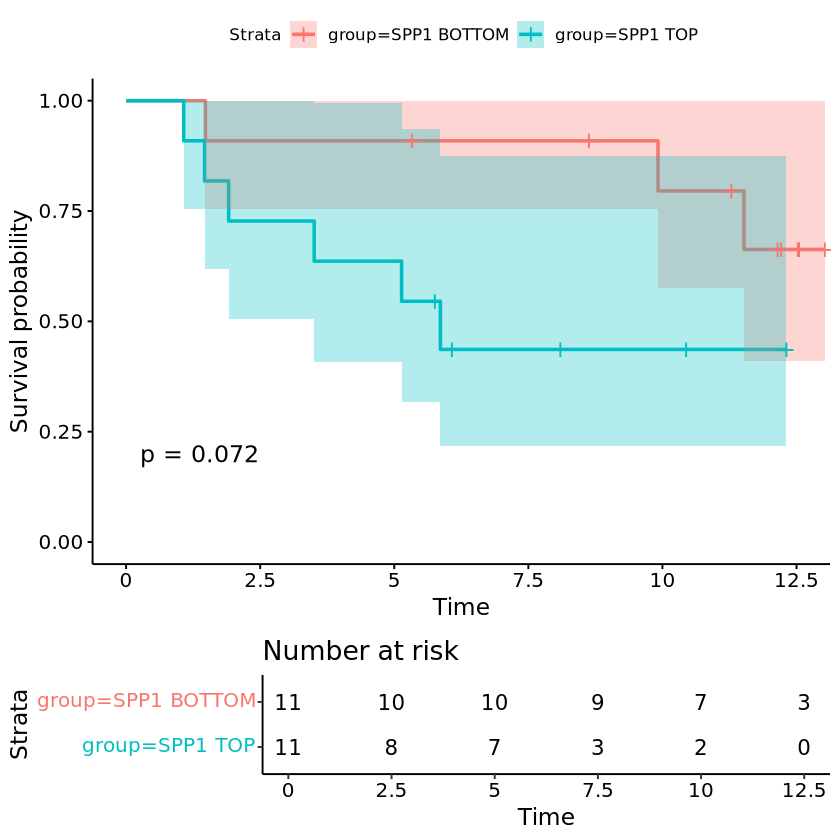

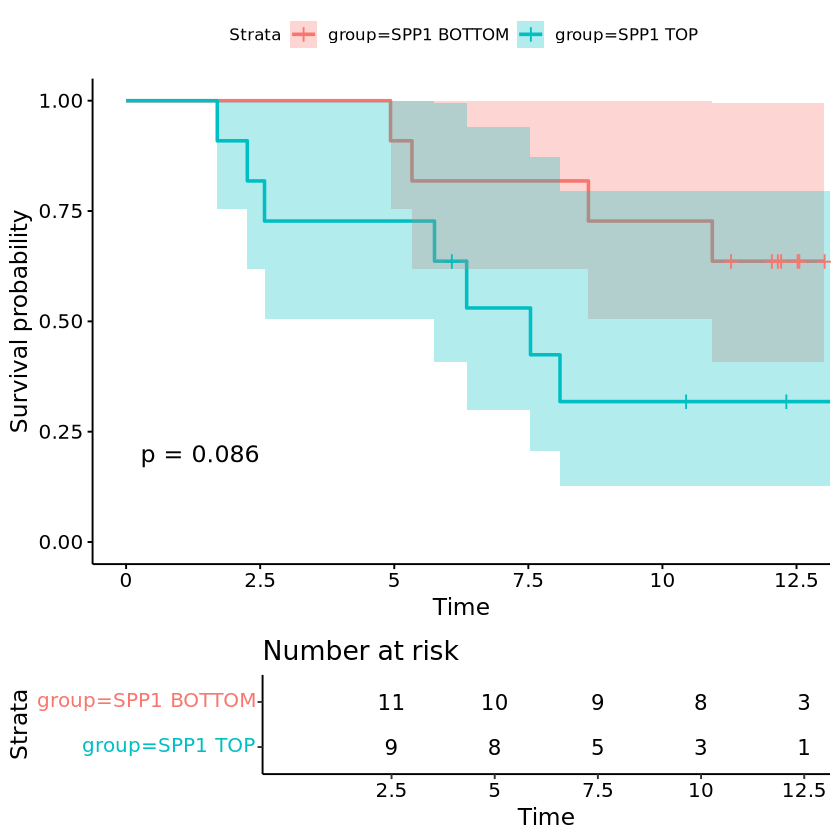

In [65]:
SPP1_exp=t(dat_nanos)
Q1=quantile(as.numeric(as.character(SPP1_exp[,"SPP1"])))[[2]]
Q3=quantile(as.numeric(as.character(SPP1_exp[,"SPP1"])))[[4]]
Q1
Q3

dim(SPP1_exp)
#hist(as.numeric(as.character(exprSet_symbol["SPP1",])))
a=as.data.frame(SPP1_exp[SPP1_exp[,"SPP1"]<Q1,])
b=as.data.frame(SPP1_exp[SPP1_exp[,"SPP1"]>Q3,])
#head(a)
dim(a)
dim(b)

a$group="SPP1 BOTTOM"
b$group="SPP1 TOP"
SPP1_exp=rbind(a,b)
head(SPP1_exp)


library(survival)
library(ggplot2)
library(ggpubr)
library(magrittr)
#install.packages("survminer")
library(survminer)
#library(dplyr)

##get survival info
info<-as.data.frame(read.table("data/HKU_QEH_Nanostring_anno.csv",header = TRUE,sep = ",", dec = ".",na.strings = "NA",stringsAsFactors=FALSE,check.names = FALSE))
row.names(info)=info[,1]
#info=info[,c("OS","OST","PFS","PFS_T")]#,"relapse")]

dat_coxsvl=merge(info,SPP1_exp[,c("SPP1","group")],by="row.names")
row.names(dat_coxsvl)=dat_coxsvl[,1]
dat_coxsvl=as.data.frame(dat_coxsvl[,-1])
#colnames(dat_coxsvl)=c("OS_5Y","OST_5Y","PFS_3Y","PFS_T_3Y","relapse","SPP1","group")
head(dat_coxsvl)
# How many samples of each type?
table(dat_coxsvl$group)

# Tabulate by outcome
xtabs(~group+PFS, data=dat_coxsvl) %>% addmargins()
coxph(Surv(PFS_T, PFS)~group, data=dat_coxsvl)
sfit <- survfit(Surv(PFS_T, PFS)~group, data=dat_coxsvl)
summary(sfit)
ggsurvplot(sfit, conf.int=TRUE, pval=TRUE,risk.table = TRUE)
#ggsurvplot(sfit, conf.int=TRUE, pval=TRUE,risk.table=True,data=groupedclin)


#OS
xtabs(~group+OS, data=dat_coxsvl) %>% addmargins()
coxph(Surv(OST, OS)~group, data=dat_coxsvl)
sfit <- survfit(Surv(OST, OS)~group, data=dat_coxsvl)
summary(sfit)
ggsurvplot(sfit, conf.int=TRUE, pval=TRUE,risk.table = TRUE)

#pdf(file="output/SPP1_Q1Q3_OS.pdf.pdf")
#ggsurvplot(sfit, conf.int=TRUE, pval=TRUE,risk.table = TRUE)
#dev.off()

library(ggplot2)
library(ggpubr)

#compare_means(relapse~SPP1, dat_coxsvl, method="wilcox.test", paired=FALSE)
#p <- ggboxplot(dat_coxsvl, x="relapse",
#               y = "SPP1", color = "relapse",
#               palette = "jco", add = "jitter")
## add p-value
#p + stat_compare_means()

# immune cell fraction -GSVA
1)cluster patients into a high and low immune infiltration group - 28 immune pathways 

2)groups showed different prognosis - PFS & OS  survival analysis

,Th1.angelova,Th17.angelova,Th2.angelova,MDSC.angelova,B.cells.naive.newman,B.cells.memory.newman,Plasma.cells.newman,T.cells.CD8.newman,T.cells.CD4.naive.newman,T.cells.CD4.memory.resting.newman,⋯,Macrophages.M1.newman,Macrophages.M2.newman,Dendritic.cells.resting.newman,Dendritic.cells.activated.newman,Mast.cells.resting.newman,Mast.cells.activated.newman,IL18R1.newman,Neutrophils.newman,Endothelials.Becht,Fibroblasts.Becht
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,ADAM8,ABP1,ASB2,ADORA3,ABCB4,ADAM28,CD79A,IGKC,CD27,CD27,⋯,AQP9,SLC15A3,SLC15A3,SLC15A3,CD33,CD33,BPI,CLC,APLN,COL1A1
2,CCR5,B4GALNT4,CALD1,AG2,ADAM28,BACH2,FCRL2,CD27,LIME1,LIME1,⋯,SLC15A3,ADAMDEC1,CLIC2,CLIC2,FCER1A,FCER1A,MS4A3,P2RY14,BCL6B,COL3A1
3,CD151,C2CD4A,CCR2,ARG1,BACH2,BANK1,GUSBP11,LIME1,RPL3P7,RPL3P7,⋯,ADAMDEC1,CHI3L1,CD68,CCL18,SLC12A8,SLC12A8,RGS13,NCF2,BMP6,COL6A1
4,CD48,C2CD4B,CSRP2,BIN2,BANK1,BLK,HLA-DOB,RPL3P7,FAIM3,FAIM3,⋯,CHI3L1,TLR8,FAM198B,TREM2,IL18R1,IL18R1,CLC,P2RY13,BMX,COL6A2
5,CD52,CA2,DAPK1,C1orf162,BCL7A,CD180,IGHD,CD69,LTB,LTB,⋯,APOBEC3A,CCL8,CCL18,CCL13,GFI1,BPI,IL1RL1,PADI4,CDH5,DCN
6,CD53,CCDC65,DLC1,CAPS,BEND5,CD19,IGHM,FAIM3,BCL11B,BCL11B,⋯,LILRA3,CLIC2,TREM2,CCL22,BPI,MS4A3,P2RY14,IL18RAP,CLEC14A,GREM1


[1] 85 28

Warning message:
“Calling gsva(expr=., gset.idx.list=., method=., ...) is deprecated; use a method-specific parameter object (see '?gsva').”


Estimating ssGSEA scores for 28 gene sets.
[1] "Calculating ranks..."
[1] "Calculating absolute values from ranks..."
  |======================================================================| 100%

[1] "Normalizing..."


,Th1.angelova,Th17.angelova,Th2.angelova,MDSC.angelova,B.cells.naive.newman,B.cells.memory.newman,Plasma.cells.newman,T.cells.CD8.newman,T.cells.CD4.naive.newman,T.cells.CD4.memory.resting.newman,⋯,Macrophages.M1.newman,Macrophages.M2.newman,Dendritic.cells.resting.newman,Dendritic.cells.activated.newman,Mast.cells.resting.newman,Mast.cells.activated.newman,IL18R1.newman,Neutrophils.newman,Endothelials.Becht,Fibroblasts.Becht
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
EXP1140RNA1,0.4565481,0.03561099,0.2036304,0.4113328,0.2616326,0.3327234,0.2557366,0.16134452,0.2679431,0.23920593,⋯,0.2569919,-0.03097958,0.04681503,0.11911480,-0.2240411,-0.2633715,-0.02530092,-0.01037869,0.1045826364,0.5151306
EXP1140RNA10,0.4450762,0.13489025,0.1571099,0.4013829,0.2552954,0.3394366,0.2408435,0.13650519,0.2518643,0.20184230,⋯,0.2471105,0.04045176,0.03780622,0.06716552,-0.1874055,-0.2296186,-0.03370616,0.01624694,0.1412015269,0.4595908
EXP1140RNA101,0.3933129,-0.00174693,0.1974850,0.3648122,0.2209137,0.2413240,0.1182226,0.12635458,0.2309683,0.19941165,⋯,0.2005459,-0.06263376,0.03698728,0.09458021,-0.2928774,-0.3350728,-0.05506149,-0.05672198,0.0801744189,0.4216814
EXP1140RNA102,0.4583604,0.03614040,0.2451248,0.4107018,0.2619523,0.3245752,0.2947622,0.16039096,0.2827703,0.25137160,⋯,0.2295665,-0.06675762,0.03717386,0.14815790,-0.2040796,-0.2132209,-0.02653918,-0.02253339,-0.0006383984,0.4415651
EXP1140RNA103,0.4770146,0.10973068,0.1784414,0.4296492,0.1998027,0.2607745,0.2117433,0.17594838,0.2743711,0.22683360,⋯,0.3269085,0.07593340,0.08483302,0.15913144,-0.2390505,-0.2891358,-0.08043056,0.03657845,0.0710246691,0.5151902
EXP1140RNA104,0.3451139,0.04322112,0.1917725,0.3475161,0.1285566,0.1613803,0.1291152,0.03674228,0.1350356,0.09666873,⋯,0.1131108,-0.09476064,-0.05975785,0.04144248,-0.2820643,-0.2724648,-0.10079943,-0.06472935,0.0237797016,0.3902081


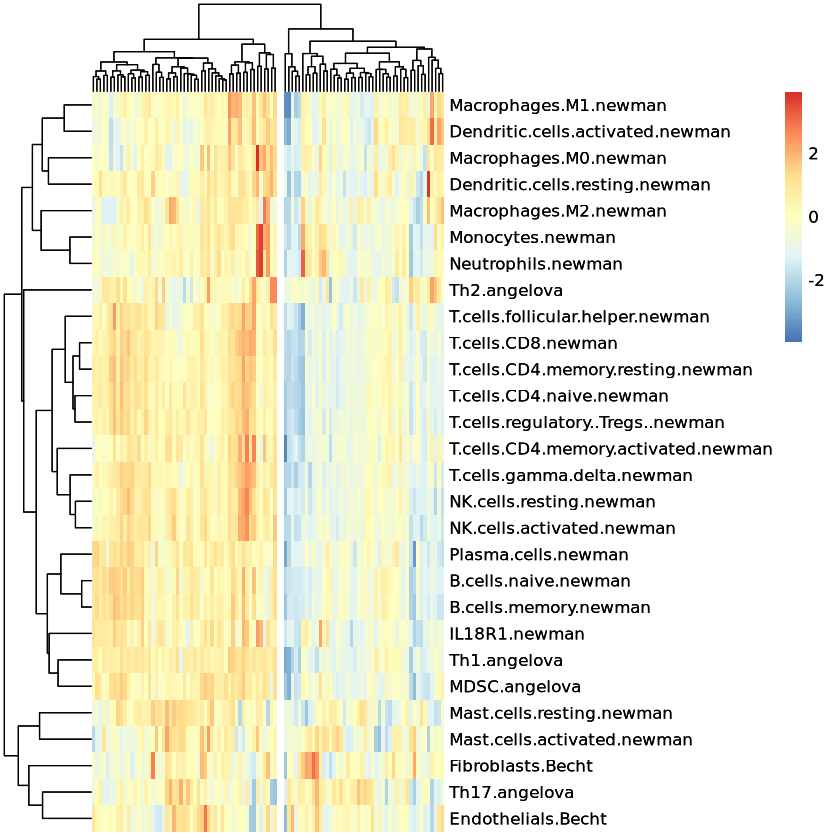

In [70]:
library(Biobase)
library(genefilter)
library(limma)
library(RColorBrewer)
library(GSVA)
library(pheatmap)

##########fib
sel_gmt=read.table("data/cell.type.LM22.3.Ths.2.fibendo.txt",header = T,na.strings = c(""),sep = "\t")
head(sel_gmt)
dim(sel_gmt)
sets=as.list(sel_gmt)
sets=lapply(sets, function(x) x[!is.na(x)])
#sets[1]
         
#########cal
exprMatrix=exprSet_symbol
#head(exprMatrix)
gsva_matrix<- gsva(as.matrix(exprMatrix), sets,method='ssgsea',kcdf='Gaussian',abs.ranking=TRUE)          
p<-pheatmap(gsva_matrix,scale="row",show_colnames=F, cluster_cols=T, cluster_rows=T,cex=1, clustering_distance_rows="euclidean", cex=1,clustering_distance_cols="euclidean", clustering_method="complete", border_color=FALSE,cutree_col = 2)
p   

#pdf("output/GSVA_heatmap.pdf",width=10,height=10)
#p
#dev.off()
            
score.gsva=as.data.frame(t(gsva_matrix))
head(score.gsva)

,GSVA_group,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A4GALT,A4GNT,⋯,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
EXP1140RNA1,high,4.410223,7.576798,5.636979,8.470620,7.519952,5.175307,6.586061,8.372425,4.264336,⋯,6.838595,7.625440,6.108254,5.415060,9.644596,6.919691,7.542965,8.566380,7.810199,8.074820
EXP1140RNA10,high,5.270692,7.765700,6.130557,8.389077,7.210645,5.875909,6.579564,9.231712,4.536904,⋯,6.481930,7.521469,5.583190,5.896111,8.300645,6.786738,6.805611,8.671106,7.417944,7.793693
EXP1140RNA101,low,3.970873,7.344074,5.618492,8.990718,8.036036,5.258858,6.428630,7.485466,4.034687,⋯,7.292593,9.050327,6.613495,5.163700,9.844692,6.194634,7.930204,8.308339,7.738847,8.816535
EXP1140RNA102,high,4.323557,7.317455,5.651065,8.056544,7.185243,5.447091,7.025560,7.882075,4.308538,⋯,6.948015,8.127125,5.975200,5.190544,9.679340,5.872522,7.612289,8.267690,7.320500,8.269691
EXP1140RNA103,high,4.816397,7.930916,6.173462,8.932853,7.586418,5.159425,6.223231,8.391735,4.390459,⋯,7.080961,7.748025,4.958300,5.360398,9.582905,5.658081,7.476662,8.479969,7.762805,8.173865
EXP1140RNA104,low,4.294037,7.689605,5.652183,7.513113,6.730888,5.195320,5.844052,8.294743,4.102494,⋯,7.949719,8.900974,5.279574,5.289896,9.736541,6.754622,7.623210,7.878382,7.307802,8.449783


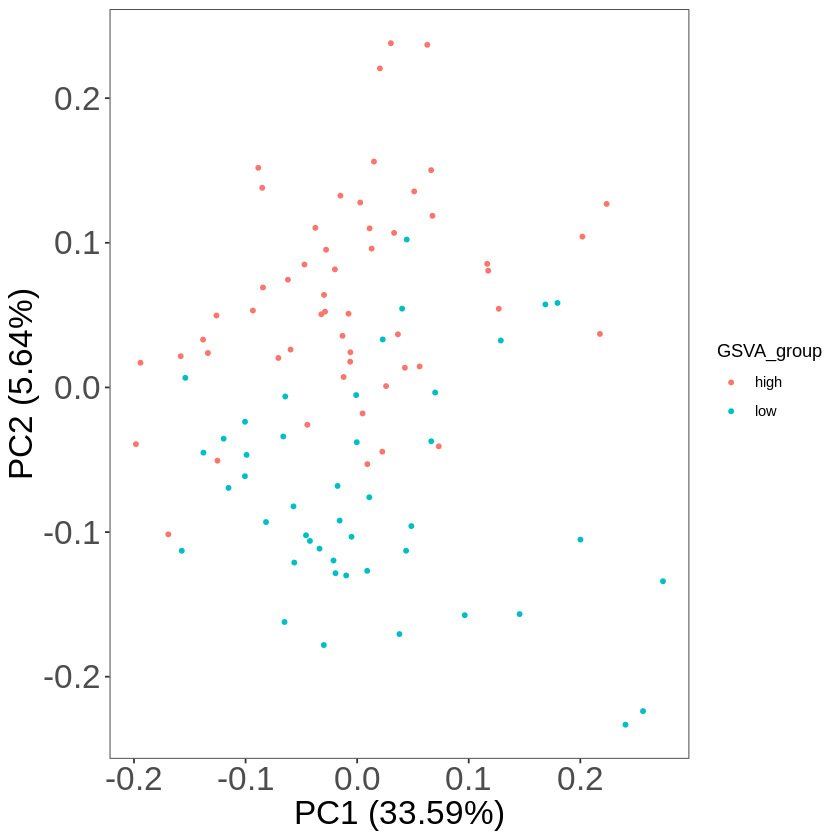

In [49]:
#head(score.gsva)
##higher gsva score means larger immune cell fraction
group=as.data.frame(cbind(colnames(gsva_matrix[,p$tree_col[["order"]]]),rep(c("high","low"),times=c(54,45)))) 
rownames(group)=group[,1]
colnames(group)=c("ID","GSVA_group")
#head(group)
dat_pca=merge(group,t(exprSet_symbol),by="row.names")
rownames(dat_pca)=dat_pca[,1]
dat_pca=dat_pca[,-c(1:2)]
head(dat_pca)

library(ggfortify)

# apply PCA - scale. = TRUE is highly advisable, but default is FALSE. rma data have done log2,so no scale here
#par(mfcol=c(2,2))
out_pca <- prcomp(dat_pca[,-1])
#plot(out_pca,type="l")
autoplot(out_pca,data=dat_pca,colour='GSVA_group',size=1,label=FALSE,label.size=3) +theme_bw()+theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),axis.text=element_text(size=20),axis.title=element_text(size=20))


,overall_survival_Event,Overall_Survival_Time,PFS,PFS_T,GSVA_group
,<int>,<dbl>,<int>,<dbl>,<fct>
EXP1140RNA1,0,4.983,1,2.48,high
EXP1140RNA10,1,3.592,1,1.20,high
EXP1140RNA101,1,3.759,1,2.53,low
EXP1140RNA102,0,5.000,0,3.00,high
EXP1140RNA103,0,5.000,0,3.00,high
EXP1140RNA104,0,5.000,0,3.00,low


[1] 99  5

,0,1,Sum
high,44,10,54
low,25,20,45
Sum,69,30,99


Call:
coxph(formula = Surv(PFS_T, PFS) ~ GSVA_group, data = groupedclin)

                coef exp(coef) se(coef)     z       p
GSVA_grouplow 1.0225    2.7800   0.3878 2.637 0.00838

Likelihood ratio test=7.48  on 1 df, p=0.006242
n= 99, number of events= 30 

,0,1,Sum
high,51,3,54
low,24,21,45
Sum,75,24,99


Call:
coxph(formula = Surv(Overall_Survival_Time, overall_survival_Event) ~ 
    GSVA_group, data = groupedclin)

                 coef exp(coef) se(coef)     z       p
GSVA_grouplow  2.3650   10.6443   0.6182 3.826 0.00013

Likelihood ratio test=23.63  on 1 df, p=0.00000117
n= 99, number of events= 24 

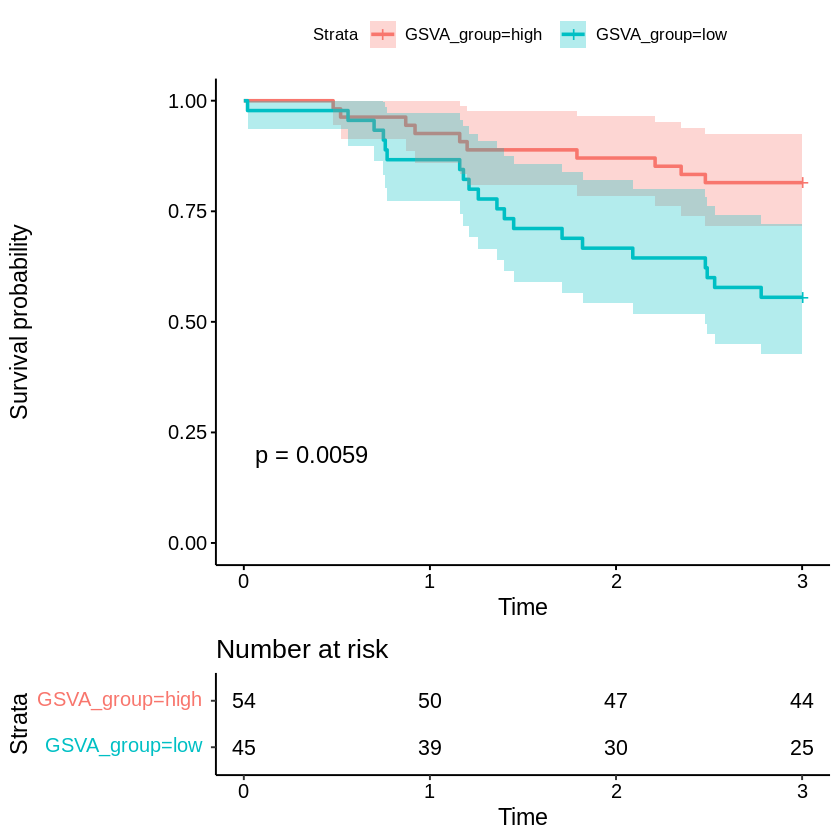

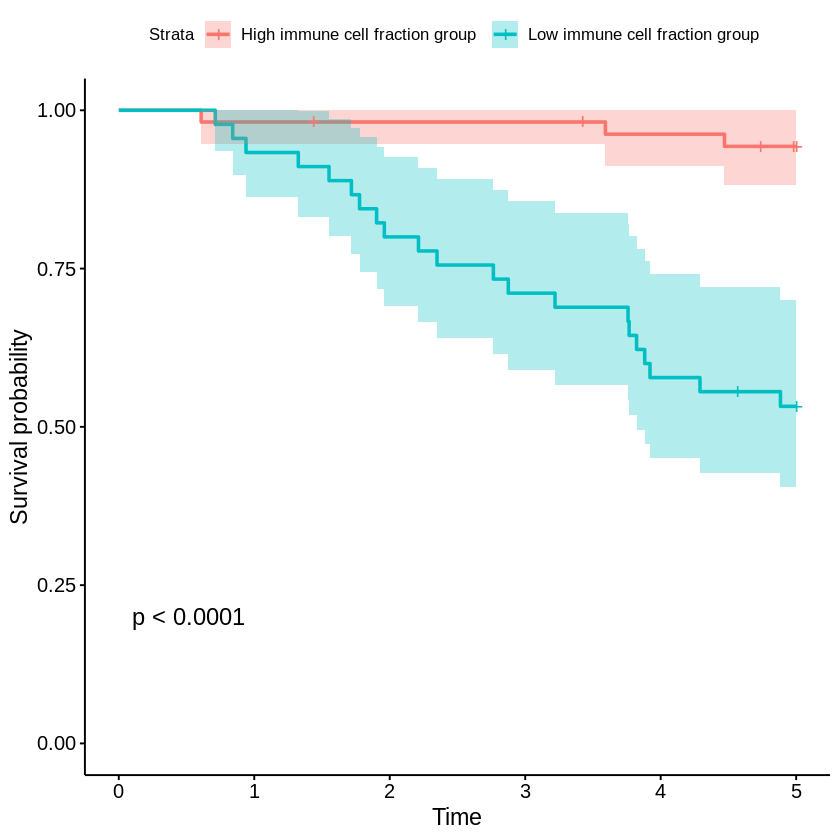

In [35]:
library(survival)
library(ggplot2)
library(ggpubr)
library(magrittr)
library(survminer)
library(dplyr)

##get survival info
info<-as.data.frame(read.table("data/NPC0501_batch1_99_anno.csv",header = TRUE,sep = ",", dec = ".",na.strings = "NA",stringsAsFactors=FALSE,check.names = FALSE))
rownames(info)=info[,1]
info=info[,-1]
#head(info)
#dim(info)
#set GSVA group
groupedclin=info[,c("OS_5Y","OST_5Y","PFS_3Y","PFS_T_3Y")]
groupedclin=merge(groupedclin,group,by="row.names")
rownames(groupedclin)=groupedclin[,1]
groupedclin=as.data.frame(groupedclin[,-c(1,6)])
colnames(groupedclin)=c("overall_survival_Event","Overall_Survival_Time","PFS","PFS_T","GSVA_group")
head(groupedclin)
dim(groupedclin)

##3-year PFS
xtabs(~GSVA_group+PFS, data=groupedclin) %>% addmargins()
coxph(Surv(PFS_T, PFS)~GSVA_group, data=groupedclin)
sfit <- survfit(Surv(PFS_T, PFS)~GSVA_group, data=groupedclin)
ggsurvplot(sfit, conf.int=TRUE,risk.table = TRUE,pval=TRUE)

#pdf("output/GSVA_PFS_plot.pdf",width=10,height=10)
#ggsurvplot(sfit,size = 1, conf.int=TRUE, pval=TRUE,legend.labs = c("High immune cell fraction group", "Low immune cell fraction group"))
#dev.off()

##5-year OS
xtabs(~GSVA_group+overall_survival_Event, data=groupedclin) %>% addmargins()
coxph(Surv(Overall_Survival_Time, overall_survival_Event)~GSVA_group, data=groupedclin)
sfit <- survfit(Surv(Overall_Survival_Time, overall_survival_Event)~GSVA_group, data=groupedclin)
ggsurvplot(sfit,size = 1, conf.int=TRUE, pval=TRUE,legend.labs = c("High immune cell fraction group", "Low immune cell fraction group"))

#pdf("output/GSVA_OS_plot.pdf",width=10,height=10)
#ggsurvplot(sfit,size = 1, conf.int=TRUE, pval=TRUE,legend.labs = c("High immune cell fraction group", "Low immune cell fraction group"))
#dev.off()


,Macrophages.M0.newman,Macrophages.M1.newman,Macrophages.M2.newman
,<dbl>,<dbl>,<dbl>
EXP1140RNA1,0.01004572,0.2569919,-0.03097958
EXP1140RNA10,-0.03250229,0.2471105,0.04045176
EXP1140RNA101,-0.06667884,0.2005459,-0.06263376
EXP1140RNA102,0.02441641,0.2295665,-0.06675762
EXP1140RNA103,0.08699538,0.3269085,0.07593340
EXP1140RNA104,-0.08792845,0.1131108,-0.09476064


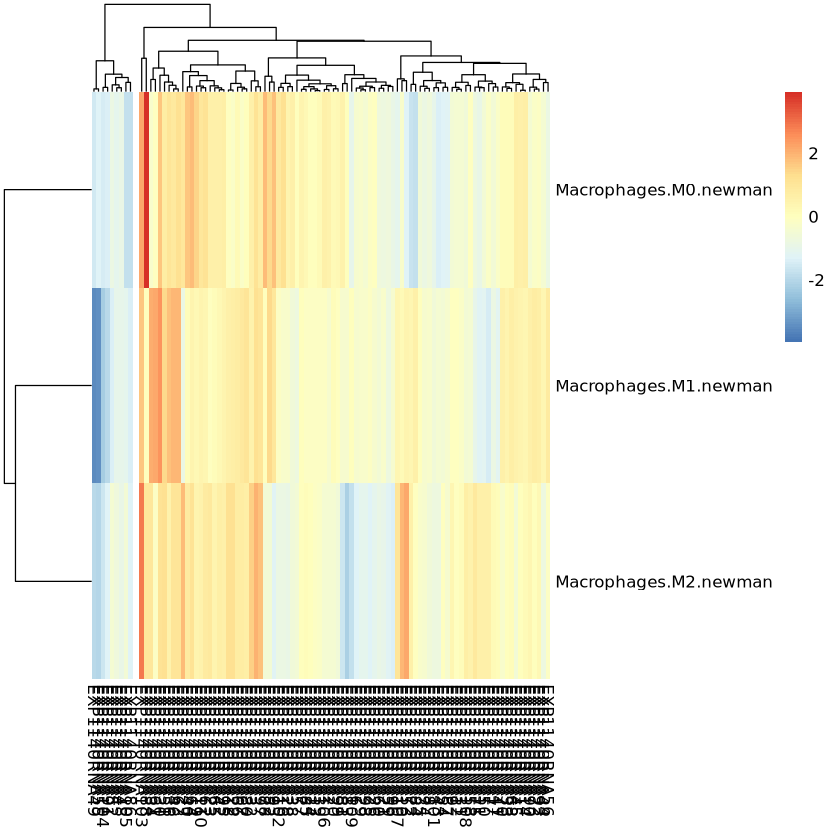

,Macrophages.M0.newman,Macrophages.M1.newman,Macrophages.M2.newman,group
,<dbl>,<dbl>,<dbl>,<chr>
EXP1140RNA10,-0.03250229,0.2471105,0.040451758,High M2
EXP1140RNA103,0.08699538,0.3269085,0.075933399,High M2
EXP1140RNA107,-0.06842157,0.2534617,0.006345349,High M2
EXP1140RNA108,-0.04578108,0.2062092,-0.007971965,High M2
EXP1140RNA18,-0.02123036,0.2659029,0.012568849,High M2
EXP1140RNA22,-0.02686431,0.2707453,0.014112707,High M2


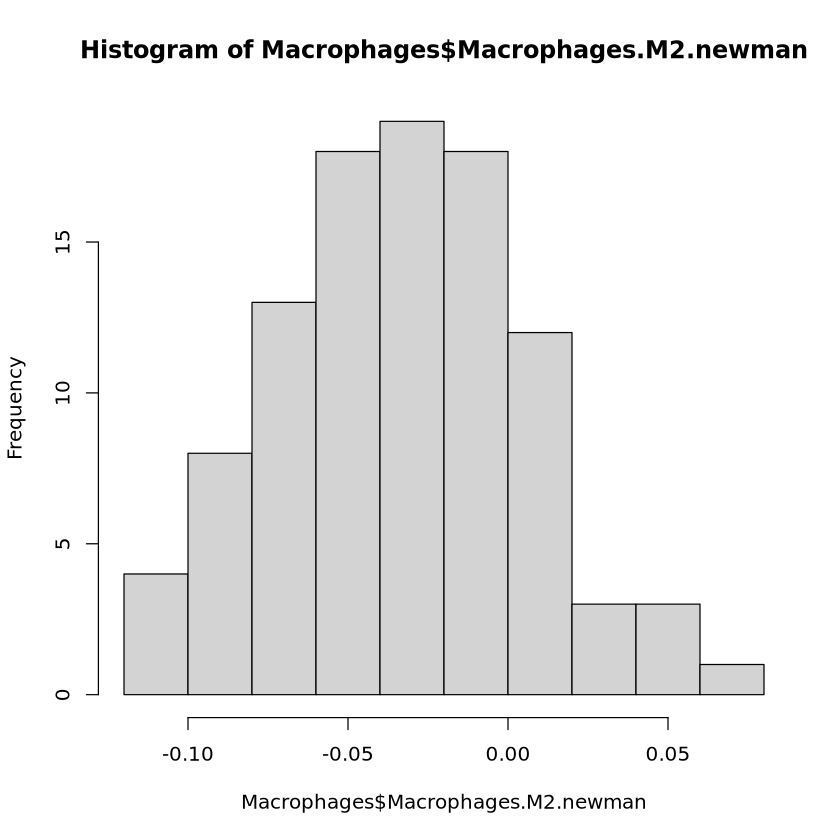

In [71]:
#colnames(score.gsva)
Macrophages=score.gsva[,c("Macrophages.M0.newman","Macrophages.M1.newman","Macrophages.M2.newman")] #"Macrophages.M0.newman","Macrophages.M1.newman"
head(Macrophages)
gsva_matrix=t(Macrophages)
p<-pheatmap(gsva_matrix,scale="row",show_colnames=T, cluster_cols=T, cluster_rows=T,cex=1, clustering_distance_rows="euclidean", cex=1,clustering_distance_cols="euclidean", clustering_method="complete", border_color=FALSE,cutree_col = 2)
#p

hist(Macrophages$`Macrophages.M2.newman`)

#cutoff=median(Macrophages[,"Macrophages.M1.newman"]/Macrophages[,"Macrophages.M2.newman"])
#cutoff
#a=Macrophages[Macrophages[,"Macrophages.M1.newman"]/Macrophages[,"Macrophages.M2.newman"]>cutoff,]
#b=Macrophages[Macrophages[,"Macrophages.M1.newman"]/Macrophages[,"Macrophages.M2.newman"]<=cutoff,]
#a$group="High M1*M2"
#b$group="Low M1*M2"
#Macrophages=rbind(a,b)


#based on M2 only
#cutoff=median(Macrophages[,"Macrophages.M2.newman"])
#cutoff
#a=Macrophages[Macrophages[,"Macrophages.M2.newman"]>cutoff,]
#b=Macrophages[Macrophages[,"Macrophages.M2.newman"]<=cutoff,]
#Macrophages=rbind(a,b)

#quanter
Q2=quantile(Macrophages[,"Macrophages.M2.newman"])[[2]]
Q3=quantile(Macrophages[,"Macrophages.M2.newman"])[[4]]
a=Macrophages[Macrophages[,"Macrophages.M2.newman"]>=Q3,]
b=Macrophages[Macrophages[,"Macrophages.M2.newman"]<=Q2,]
a$group="High M2"
b$group="Low M2"
Macrophages=rbind(a,b)

head(Macrophages)

,Row.names,group,gene
,<I<chr>>,<dbl>,<dbl>
1,EXP1140RNA10,2,6.123022
2,EXP1140RNA101,1,7.281157
3,EXP1140RNA102,1,6.093729
4,EXP1140RNA103,2,6.270685
5,EXP1140RNA104,1,6.989758
6,EXP1140RNA107,2,6.707955


.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
group,6.12302201039092,7.28115722615892,1,1,1,ns,Wilcoxon
group,6.12302201039092,6.09372861370648,1,1,1,ns,Wilcoxon
group,6.12302201039092,6.98975768805576,1,1,1,ns,Wilcoxon
group,6.12302201039092,7.54975976226576,1,1,1,ns,Wilcoxon
group,6.12302201039092,7.78480163470957,1,1,1,ns,Wilcoxon
group,6.12302201039092,5.42277536675951,1,1,1,ns,Wilcoxon
group,6.12302201039092,6.69158203724912,1,1,1,ns,Wilcoxon
group,6.12302201039092,7.82649682670487,1,1,1,ns,Wilcoxon
group,6.12302201039092,6.81027141732684,1,1,1,ns,Wilcoxon


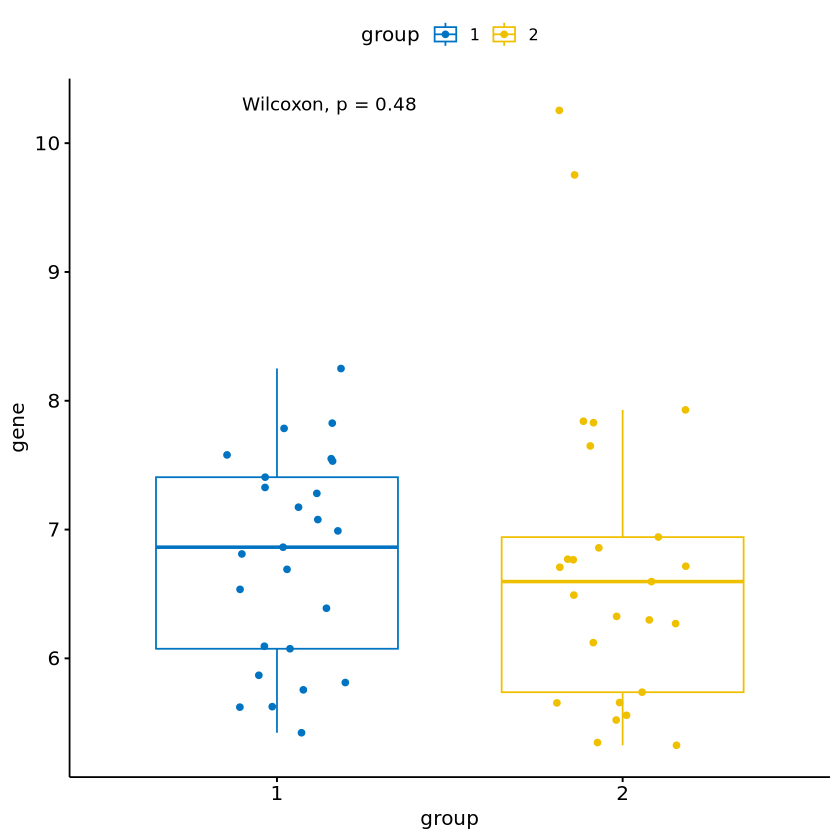

In [72]:
#head(info)
gdat_mm=merge(as.data.frame(t(exprSet_symbol)),Macrophages,by="row.names")
gdat_mm=gdat_mm[,c("Row.names","group","SPP1")]   
gdat_mm$group=gsub("High M2","2",gdat_mm$group)
gdat_mm$group=gsub("Low M2","1",gdat_mm$group)
gdat_mm$group=as.numeric(gdat_mm$group)
colnames(gdat_mm)[3]="gene"
colnames(gdat_mm)[2]="group"
head(gdat_mm)

library(ggplot2)
library(ggpubr)

compare_means(group~gene, gdat_mm, method="wilcox.test", paired=FALSE)
p <- ggboxplot(gdat_mm, x="group",
               y = "gene", color = "group",
               palette = "jco", add = "jitter")
# 添加p值
p + stat_compare_means()

,overall_survival_Event,Overall_Survival_Time,PFS,PFS_T,group
,<int>,<dbl>,<int>,<dbl>,<chr>
EXP1140RNA10,1,3.592,1,1.20,High M2
EXP1140RNA101,1,3.759,1,2.53,Low M2
EXP1140RNA102,0,5.000,0,3.00,Low M2
EXP1140RNA103,0,5.000,0,3.00,High M2
EXP1140RNA104,0,5.000,0,3.00,Low M2
EXP1140RNA107,0,5.000,0,3.00,High M2


[1] 50  5

,0,1,Sum
High M2,20,5,25
Low M2,11,14,25
Sum,31,19,50


Call:
coxph(formula = Surv(PFS_T, PFS) ~ group, data = groupedclin)

              coef exp(coef) se(coef)     z      p
groupLow M2 1.1683    3.2164   0.5222 2.237 0.0253

Likelihood ratio test=5.74  on 1 df, p=0.01654
n= 50, number of events= 19 

Call: survfit(formula = Surv(PFS_T, PFS) ~ group, data = groupedclin)

                group=High M2 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
 0.48     25       1     0.96  0.0392        0.886        1.000
 0.87     24       1     0.92  0.0543        0.820        1.000
 0.92     23       1     0.88  0.0650        0.761        1.000
 1.20     22       1     0.84  0.0733        0.708        0.997
 1.21     21       1     0.80  0.0800        0.658        0.973

                group=Low M2 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
 0.02     25       1     0.96  0.0392        0.886        1.000
 0.52     24       1     0.92  0.0543        0.820        1.000
 0.77     23       1     0.88  0.0650        0.761        1.000
 1.16     22       1     0.84  0.0733        0.708        0.997
 1.18     21       1     0.80  0.0800        0.658        0.973
 1.36     20       1     0.76  0.0854        0.610        0.947
 1.45     19       1     0.72  0.08

,0,1,Sum
High M2,22,3,25
Low M2,14,11,25
Sum,36,14,50


Call:
coxph(formula = Surv(Overall_Survival_Time, overall_survival_Event) ~ 
    group, data = groupedclin)

              coef exp(coef) se(coef)     z      p
groupLow M2 1.4378    4.2116   0.6523 2.204 0.0275

Likelihood ratio test=6.01  on 1 df, p=0.01422
n= 50, number of events= 14 

Call: survfit(formula = Surv(Overall_Survival_Time, overall_survival_Event) ~ 
    group, data = groupedclin)

                group=High M2 
  time n.risk n.event survival std.err lower 95% CI upper 95% CI
 0.608     25       1     0.96  0.0392        0.886            1
 1.552     24       1     0.92  0.0543        0.820            1
 3.592     23       1     0.88  0.0650        0.761            1

                group=Low M2 
  time n.risk n.event survival std.err lower 95% CI upper 95% CI
 0.712     25       1     0.96  0.0392        0.886        1.000
 0.841     24       1     0.92  0.0543        0.820        1.000
 1.960     23       1     0.88  0.0650        0.761        1.000
 2.349     22       1     0.84  0.0733        0.708        0.997
 2.765     21       1     0.80  0.0800        0.658        0.973
 2.875     20       1     0.76  0.0854        0.610        0.947
 3.220     19       1     0.72  0.0898        0.564        0.919
 3.759     18       1     0.68  0.0933        0

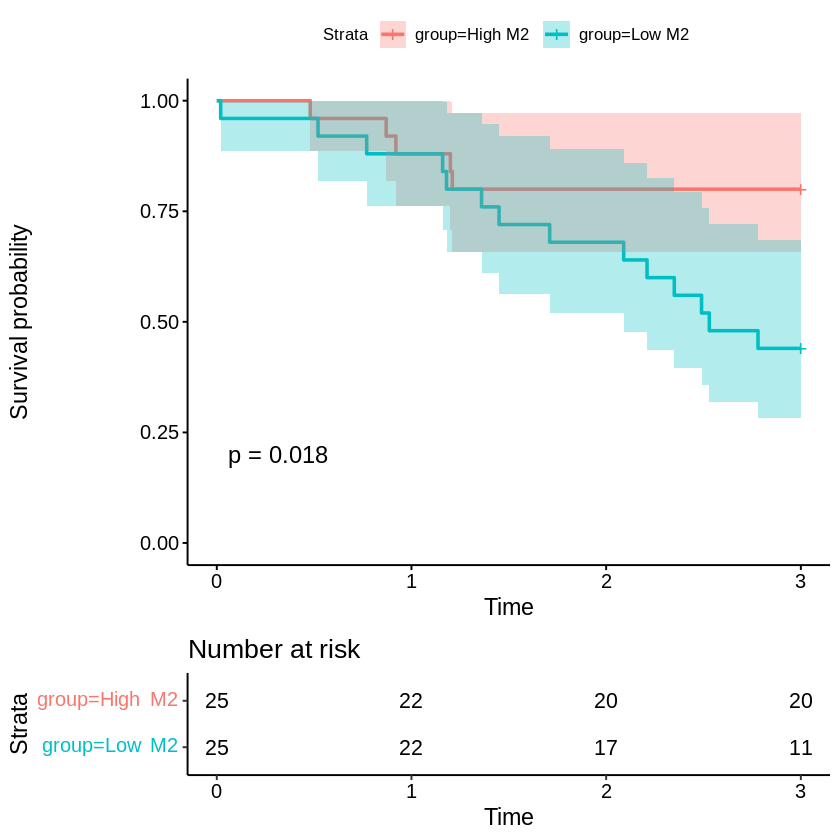

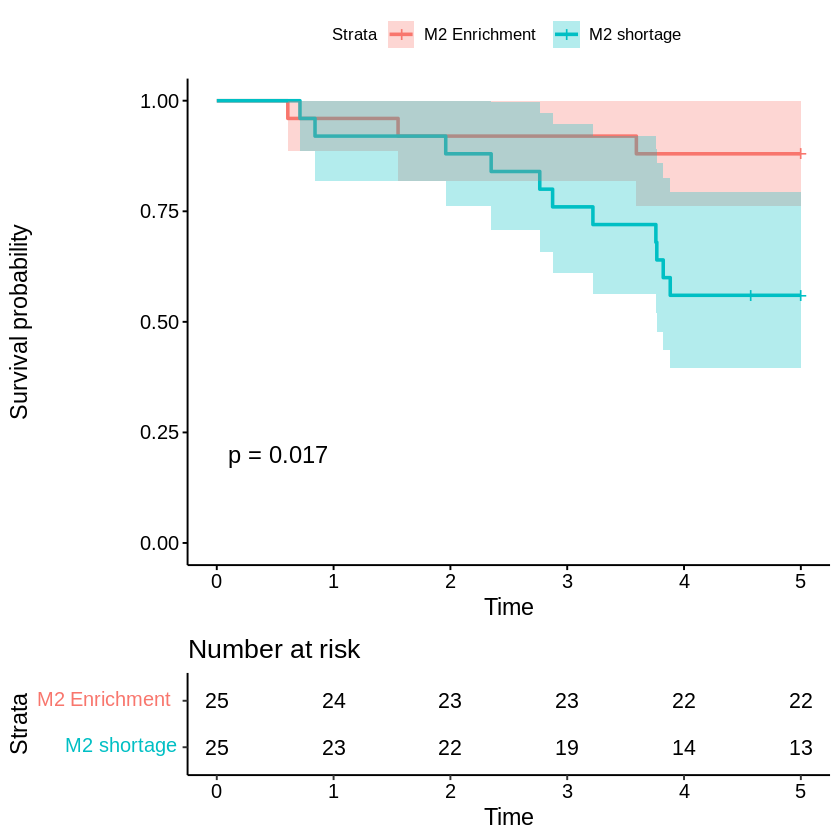

In [37]:
library(survival)
library(ggplot2)
library(ggpubr)
library(magrittr)
library(survminer)
library(dplyr)

##get survival info
info<-as.data.frame(read.table("data/NPC0501_batch1_99_anno.csv",header = TRUE,sep = ",", dec = ".",na.strings = "NA",stringsAsFactors=FALSE,check.names = FALSE))
rownames(info)=info[,1]
info=info[,-1]
#head(info)
#dim(info)
#set GSVA group
groupedclin=info[,c("OS_5Y","OST_5Y","PFS_3Y","PFS_T_3Y")]
groupedclin=merge(groupedclin,Macrophages,by="row.names")
rownames(groupedclin)=groupedclin[,1]
groupedclin=as.data.frame(groupedclin[,-c(1,6,7,8)])
colnames(groupedclin)=c("overall_survival_Event","Overall_Survival_Time","PFS","PFS_T","group")
head(groupedclin)
dim(groupedclin)

##3-year PFS
xtabs(~group+PFS, data=groupedclin) %>% addmargins()
coxph(Surv(PFS_T, PFS)~group, data=groupedclin)
sfit <- survfit(Surv(PFS_T, PFS)~group, data=groupedclin)
summary(sfit)
ggsurvplot(sfit, conf.int=TRUE,risk.table = TRUE,pval=TRUE)

#pdf("output/GSVA_PFS_plot.pdf",width=10,height=10)
#ggsurvplot(sfit,size = 1, conf.int=TRUE, pval=TRUE,legend.labs = c("M2 Enrichment ", "M2 shortage"))
#dev.off()

##5-year OS
xtabs(~group+overall_survival_Event, data=groupedclin) %>% addmargins()
coxph(Surv(Overall_Survival_Time, overall_survival_Event)~group, data=groupedclin)
sfit <- survfit(Surv(Overall_Survival_Time, overall_survival_Event)~group, data=groupedclin)
summary(sfit)
ggsurvplot(sfit,size = 1, conf.int=TRUE, risk.table = TRUE,pval=TRUE,legend.labs = c("M2 Enrichment ", "M2 shortage"))

#pdf("output/GSVA_OS_plot.pdf",width=10,height=10)
#ggsurvplot(sfit,size = 1, conf.int=TRUE, pval=TRUE,legend.labs = c("High immune cell fraction group", "Low immune cell fraction group"))
#dev.off()


[1] "\357\273\277FileName"          "STUDYNO"                      
 [3] "OS_5Y"                         "OST_5Y"                       
 [5] "PFS_3Y"                        "PFS_T_3Y"                     
 [7] "Age"                           "Treatment_Arm"                
 [9] "Gender"                        "LDH"                          
[11] "T_stage"                       "N_stage"                      
[13] "Stage"                         "RT_Tech_String"               
[15] "Dose_per_fraction"             "Total_Dose"                   
[17] "RT_IM_2D"                      "RT_IM_3D"                     
[19] "LDH_per10L"                    "relapse"                      
[21] "AJCC_UICC_stage_group"         "ecog"                         
[23] "Remarks"                       "WHO_pathological_type"        
[25] "to identify type of WHO patho" "date"                         
[27] "Neutrophil"                    "Lymphocyte"                   
[29] "date_of_blood_test"            "Neutrophil_Lymphocyte_ratio"

,Age,Gender,LDH,T_stage,N_stage,WHO_pathological_type,Neutrophil,Neutrophil_Lymphocyte_ratio,AJCC_UICC_stage_group,LDH_per10L
,<int>,<fct>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>,<dbl>
EXP1140RNA1,39,F,189,T3-4,N2-3,3,2.73,NA,III,18.9
EXP1140RNA10,45,M,190,T3-4,N2-3,2,5.10,4.250000,IV,19.0
EXP1140RNA101,53,M,374,T1-2,N2-3,3,3.50,2.916667,III,37.4
EXP1140RNA102,48,M,154,T3-4,N2-3,3,4.50,2.142857,III,15.4
EXP1140RNA103,55,M,296,T1-2,N2-3,3,4.30,2.263158,IV,29.6
EXP1140RNA104,63,M,226,T3-4,N2-3,3,5.20,3.058824,IV,22.6


,beta,HR (95% CI for HR),wald.test,p.value
,<fct>,<fct>,<fct>,<fct>
Age,-0.01,0.99 (0.95-1),0.3,0.58
Gender,0.26,1.3 (0.4-4.3),0.19,0.66
LDH,0.0039,1 (1-1),3.2,0.073
T_stage,-0.29,0.74 (0.32-1.7),0.47,0.49
N_stage,-0.079,0.92 (0.35-2.4),0.03,0.87
WHO_pathological_type,0.26,1.3 (0.43-3.9),0.21,0.64
Neutrophil,-0.11,0.9 (0.71-1.1),0.78,0.38
Neutrophil_Lymphocyte_ratio,0.13,1.1 (1-1.3),3.9,0.047
AJCC_UICC_stage_group,0.57,1.8 (0.85-3.7),2.3,0.13


Call:
coxph(formula = Surv(PFS_T_3Y, PFS_3Y) ~ Age + Gender + LDH + 
    AJCC_UICC_stage_group + GSVA_group, data = info)

                             coef exp(coef)  se(coef)      z      p
Age                     -0.016868  0.983273  0.018195 -0.927 0.3539
GenderM                  0.162275  1.176183  0.617476  0.263 0.7927
LDH                      0.002574  1.002578  0.002154  1.195 0.2319
AJCC_UICC_stage_groupIV  0.450737  1.569468  0.381439  1.182 0.2373
GSVA_grouplow            0.978032  2.659217  0.395826  2.471 0.0135

Likelihood ratio test=11.69  on 5 df, p=0.03936
n= 99, number of events= 30 

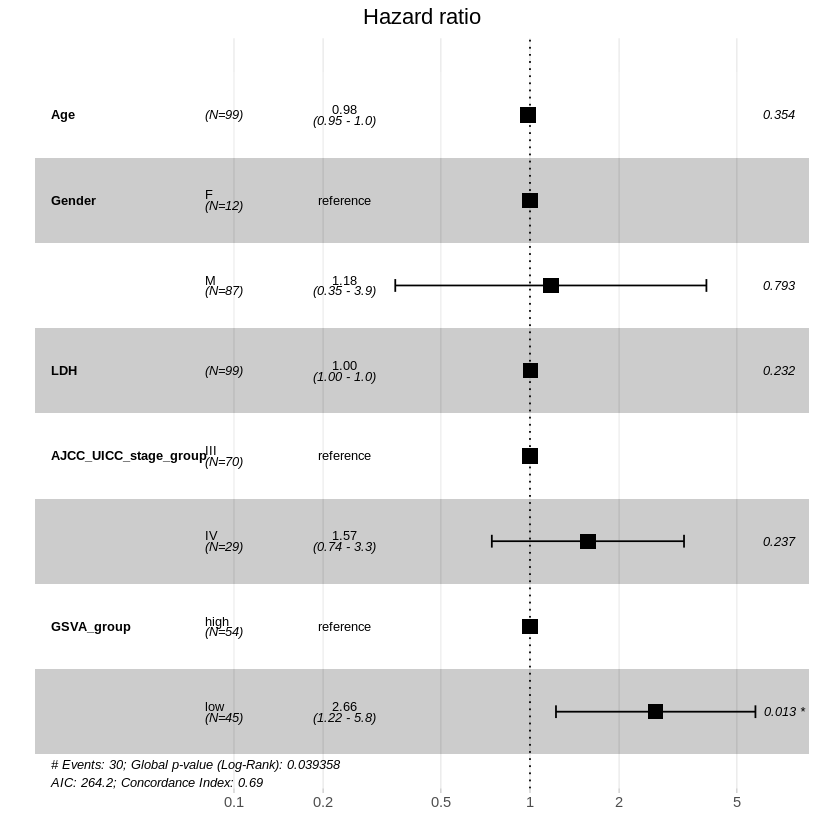

In [28]:
#MVA analysis
library(survival)

#set GSVA group
##get survival info
info<-as.data.frame(read.table("data/NPC0501_batch1_99_anno2.csv",header = TRUE,sep = ",", dec = ".",na.strings = "NA",stringsAsFactors=FALSE,check.names = FALSE))
rownames(info)=info[,1]
colnames(info)
info=info[,-1]

#set GSVA group
info=merge(info,group,by="row.names")
rownames(info)=info[,1]
#head(info)

#head(info)
#info$T_stage=as.factor(info$T_stage)
#info$N_stage=as.factor(info$N_stage)
info$Gender=as.factor(info$Gender)

#univariant Cox HR regression analysis
covariates <- c("Age","Gender","LDH","T_stage","N_stage","WHO_pathological_type","Neutrophil","Neutrophil_Lymphocyte_ratio","AJCC_UICC_stage_group","LDH_per10L")
head(info[,covariates])
univ_formulas <-sapply(covariates,function(x) as.formula(paste('Surv(PFS_T_3Y, PFS_3Y)~', x)))
#univ_formulas
univ_models <- lapply(univ_formulas, function(x){coxph(x, data = info)})
univ_results <- lapply(univ_models,
                       function(x){ 
                          x <- summary(x)
                          p.value<-signif(x$wald["pvalue"], digits=2)
                          wald.test<-signif(x$wald["test"], digits=2)
                          beta<-signif(x$coef[1], digits=2);#coeficient beta
                          HR <-signif(x$coef[2], digits=2);#exp(beta)
                          HR.confint.lower <- signif(x$conf.int[,"lower .95"],2)
                          HR.confint.upper <- signif(x$conf.int[,"upper .95"],2)
                          HR <- paste0(HR, " (", 
                                       HR.confint.lower, "-", HR.confint.upper, ")")
                          res<-c(beta, HR, wald.test, p.value)
                          return(res)
                          #return(exp(cbind(coef(x),confint(x))))
                         })
res <- t(as.data.frame(univ_results, check.names = FALSE)[1:4,])
colnames(res)<-c("beta", "HR (95% CI for HR)","wald.test", "p.value")
as.data.frame(res)
 
#multivariant Cox HR regression analysis
res.cox <- coxph(Surv(PFS_T_3Y, PFS_3Y) ~ Age + Gender + LDH +AJCC_UICC_stage_group + GSVA_group, data =  info)
res.cox
                       
survminer::ggforest(res.cox, data = info)
#pdf(file="output/NPC0501_GSVA_MVA.pdf")
#survminer::ggforest(res.cox, data = info)
#dev.off()
                    

### SPP1 with PD-L1 therapy

,SUBJID,Cohort,Arm,MAF_Tumor_ID,MAF_Normal_ID,CNV_ID,RNA_ID,CD8_IF_ID,Sex,Age,⋯,PFS_CNSR,OS,OS_CNSR,irORR,irPFS,irPFS_CNSR,Purity,Ploidy,ImmunoPhenotype,SPP1
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<int>,<dbl>,<int>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<dbl>
G109543_RCCBMS-00147-T_v1_RNA_OnPrem,RCC10-147,CM-010,NIVOLUMAB,RP-1458_RCCBMS-00147-T_v1_Exome_OnPrem,RP-1458_RCCBMS-00147-N_v1_Exome_OnPrem,RCCBMS-00147-T.called.seg,G109543_RCCBMS-00147-T_v1_RNA_OnPrem,0026 00147,Male,57,⋯,1,1.972603,1,irPD,1.9726027,1,0.40,1.79,Infiltrated,34.75193
G138701_RCCBMS-00008-T_v1_RNA_OnPrem,RCC10-8,CM-010,NIVOLUMAB,NA,NA,NA,G138701_RCCBMS-00008-T_v1_RNA_OnPrem,0023 00008,Female,63,⋯,1,1.183562,1,irPD,0.9534247,1,NA,NA,Infiltrated,35.04232
G138701_RCCBMS-00092-T_v1_RNA_OnPrem,RCC10-92,CM-010,NIVOLUMAB,RP-1458_RCCBMS-00092-T_v2_Exome_OnPrem,RP-1458_RCCBMS-00092-N_v1_Exome_OnPrem,RCCBMS-00092-T.called.seg,G138701_RCCBMS-00092-T_v1_RNA_OnPrem,0037 00092,Male,50,⋯,1,25.315068,1,irPD,1.4136986,1,0.36,1.97,Infiltrated,35.06628
G138701_RCCBMS-00165-T_v1_RNA_OnPrem,RCC10-165,CM-010,NIVOLUMAB,NA,NA,NA,G138701_RCCBMS-00165-T_v1_RNA_OnPrem,0037 00165,Male,63,⋯,1,50.367123,1,irPD,1.4136986,1,NA,NA,Infiltrated,35.44190
G138701_RCCBMS-00154-T_v1_RNA_OnPrem,RCC10-154,CM-010,NIVOLUMAB,RP-1458_RCCBMS-00154-T_v4_Exome_OnPrem,RP-1458_RCCBMS-00154-N_v1_Exome_OnPrem,RCCBMS-00154-T.called.seg,G138701_RCCBMS-00154-T_v1_RNA_OnPrem,0003 00154,Male,66,⋯,1,46.257534,1,irPR,46.2575342,1,0.25,3.35,Infiltrated,35.46529
G138701_RCCBMS-00028-T_v1_RNA_OnPrem,RCC10-28,CM-010,NIVOLUMAB,RP-1458_RCCBMS-00028-T_v4_Exome_OnPrem,RP-1458_RCCBMS-00028-N_v1_Exome_OnPrem,RCCBMS-00028-T.called.seg,G138701_RCCBMS-00028-T_v1_RNA_OnPrem,0003 00028,Female,51,⋯,1,18.575342,1,irCR,10.8164384,0,0.63,3.03,Infiltrated,35.54511


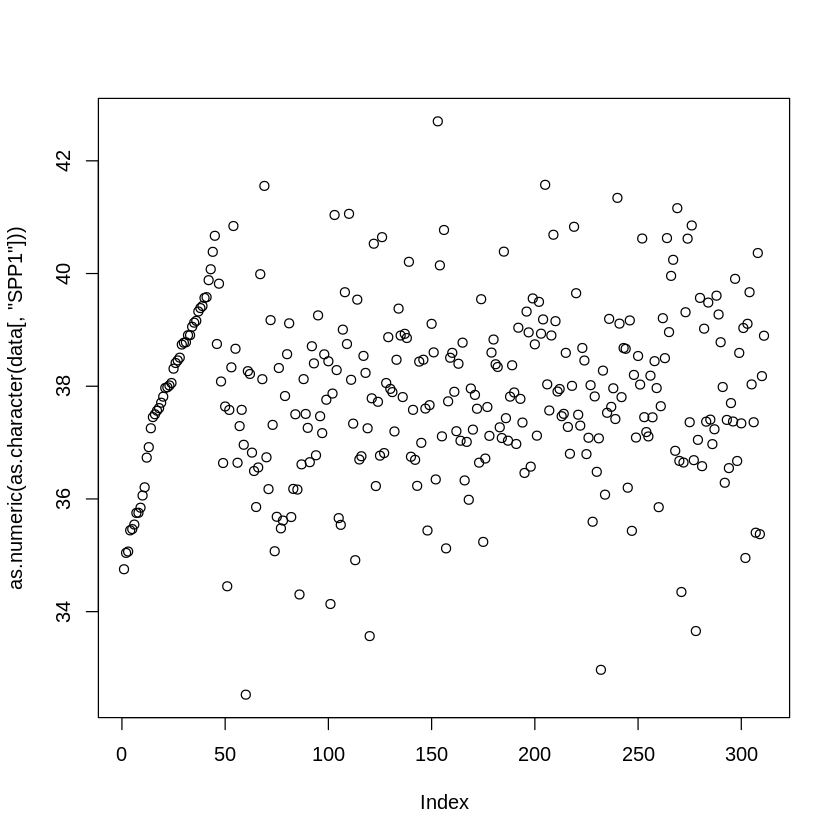

In [7]:
data<-as.data.frame(read.table("data/41591_2020_839_MOESM2_ESM.csv",header = TRUE,sep = ",", dec = ".",na.strings = "NA",stringsAsFactors=FALSE,check.names = FALSE))
rownames(data)=data[,"RNA_ID"]
#info=info[,-1]
head(data)
plot(as.numeric(as.character(data[,"SPP1"])))

,SUBJID,Cohort,Arm,MAF_Tumor_ID,MAF_Normal_ID,CNV_ID,RNA_ID,CD8_IF_ID,Sex,Age,⋯,OS,OS_CNSR,irORR,irPFS,irPFS_CNSR,Purity,Ploidy,ImmunoPhenotype,SPP1,group
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<dbl>,<int>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
G109543_RCCBMS-00145-T_v1_RNA_OnPrem,RCC10-145,CM-010,NIVOLUMAB,NA,NA,NA,G109543_RCCBMS-00145-T_v1_RNA_OnPrem,0045 00145,Male,54,⋯,25.249315,1,irPD,1.413699,1,NA,NA,Infiltrated,37.96960,Top SPP1
G138701_RCCBMS-00097-T_v1_RNA_OnPrem,RCC10-97,CM-010,NIVOLUMAB,RP-1458_RCCBMS-00097-T_v4_Exome_OnPrem,RP-1458_RCCBMS-00097-N_v1_Exome_OnPrem,RCCBMS-00097-T.called.seg,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,0001 00097,Female,67,⋯,36.526027,1,irPR,5.490411,0,0.49,1.99,Infiltrated,37.98180,Top SPP1
G138701_RCCBMS-00178-T_v1_RNA_OnPrem,RCC10-178,CM-010,NIVOLUMAB,RP-1458_RCCBMS-00178-T_v2_Exome_OnPrem,RP-1458_RCCBMS-00178-N_v1_Exome_OnPrem,RCCBMS-00178-T.called.seg,G138701_RCCBMS-00178-T_v1_RNA_OnPrem,0030 00178,Male,55,⋯,8.219178,1,irSD,5.523288,1,0.32,3.31,Infiltrated,38.01359,Top SPP1
G138701_RCCBMS-00093-T_v1_RNA_OnPrem,RCC10-93,CM-010,NIVOLUMAB,RP-1458_RCCBMS-00093-T_v2_Exome_OnPrem,RP-1458_RCCBMS-00093-N_v1_Exome_OnPrem,RCCBMS-00093-T.called.seg,G138701_RCCBMS-00093-T_v1_RNA_OnPrem,NA,Male,46,⋯,5.128767,1,irPD,1.315068,1,0.50,2.00,No_IF,38.05741,Top SPP1
G109543_RCCBMS-00196-T_v1_RNA_OnPrem,RCC10-196,CM-010,NIVOLUMAB,NA,NA,NA,G109543_RCCBMS-00196-T_v1_RNA_OnPrem,0047 00196,Female,55,⋯,50.663014,1,irPD,1.347945,1,NA,NA,Infiltrated,38.31174,Top SPP1
G138701_RCCBMS-00194-T_v1_RNA_OnPrem,RCC10-194,CM-010,NIVOLUMAB,NA,NA,NA,G138701_RCCBMS-00194-T_v1_RNA_OnPrem,NA,Male,50,⋯,7.989041,1,irPD,1.315068,1,NA,NA,No_IF,38.41239,Top SPP1


,0,1,Sum
Top SPP1,39,116,155
buttom SPP1,41,115,156
Sum,80,231,311


Call:
coxph(formula = Surv(OS, OS_CNSR) ~ group, data = groupedclin)

                     coef exp(coef) se(coef)      z     p
groupbuttom SPP1 -0.09864   0.90607  0.13177 -0.749 0.454

Likelihood ratio test=0.56  on 1 df, p=0.4542
n= 311, number of events= 231 

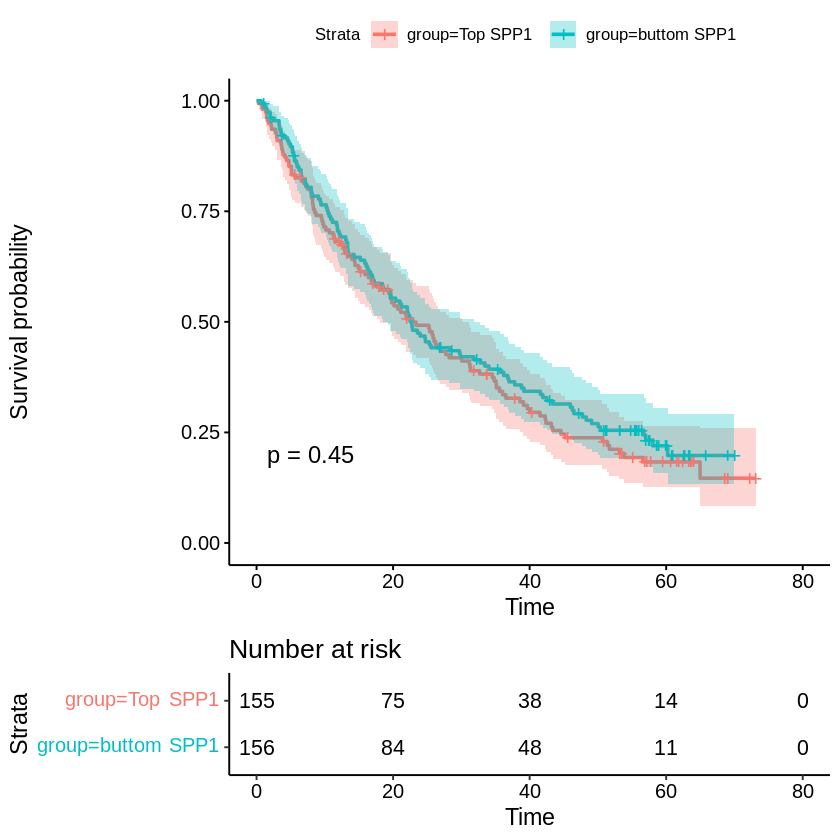

In [13]:

library(dplyr)
library(survival)
library(survminer)
#data=data[data[,"Cohort"]=="CM-010",] #cohort 2

#quantile(data[,"SPP1"])
#Q2=quantile(data[,"SPP1"])[[2]]
#Q4=quantile(data[,"SPP1"])[[4]]
#Q2
#Q4
#a=data[data[,"SPP1"]>=Q4,]
#b=data[data[,"SPP1"]<=Q2,]

cutoff=median(data[,"SPP1"])
#cutoff
a=data[data[,"SPP1"]>cutoff,]
b=data[data[,"SPP1"]<=cutoff,]
a$group="Top SPP1"
b$group="buttom SPP1"
groupedclin=rbind(a,b)
head(groupedclin)

##irPFS
xtabs(~group+OS_CNSR, data=groupedclin) %>% addmargins()
coxph(Surv(OS, OS_CNSR)~group, data=groupedclin)
sfit <- survfit(Surv(OS, OS_CNSR)~group, data=groupedclin)
ggsurvplot(sfit, conf.int=TRUE,risk.table = TRUE,pval=TRUE)


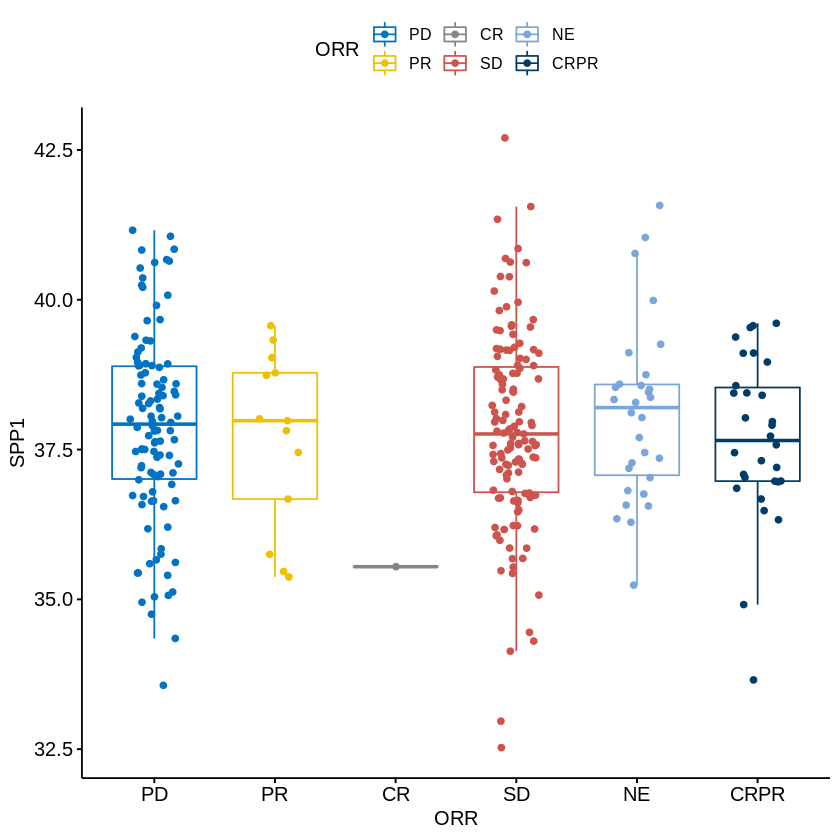

In [158]:
library(ggplot2)
library(ggpubr)


#compare_means(Benefit~SPP1, data, method="wilcox.test", paired=FALSE)
p <- ggboxplot(data, x="ORR",
               y = "SPP1", color = "ORR",
               palette = "jco", add = "jitter")
# add p-value
#p + stat_compare_means()
p
